In [1]:
#source('functions.R')
source('utils_preprocess.R')




MYLIBRARIES<-c("outliers",
               "corrplot",
               "MASS",
               "formattable",
               "stats",
               "caret",
               "PerformanceAnalytics",
               "smotefamily",
               #"ElemStatLearn",
               "naivebayes"
              )
install.packages('lattice')
install.packages('caret')
install.packages('e1071')
library(dplyr) # for transforming to tibble object
library(caret)
library(e1071)

# ************************************************
# This is where R starts execution

# Automatically release memory
gc()

# Tries to clear plots and other graphics in RStudio output
if(!is.null(dev.list())) dev.off()
graphics.off()

# This clears all warning messages
#assign("last.warning", NULL, envir = baseenv())

# clears the RStudio console area
cat("\014")

# If library not already on your computer this will download and
# install the library. Each library is activated.
library(pacman)
pacman::p_load(char=MYLIBRARIES,install=TRUE,character.only=TRUE)

Warning message in install.packages("lattice"):
“installation of package ‘lattice’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message in install.packages("caret"):
“installation of package ‘caret’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message in install.packages("e1071"):
“installation of package ‘e1071’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: lattice



used    (Mb)  gc trigger (Mb)  max used (Mb) 
Ncells 2307616 123.3 4303540    229.9 4303540  229.9
Vcells 3947068  30.2 8388608     64.0 7443274   56.8

null device 
          1

# Data  Understanding

## Load a passenger satisfaction dataset 

### Load 2 version of a Airline passenger satisfaction dataset

In this project we will be using 2 version of datset to analyse the passenger satisfaction to the airline.
Starting from combinding both version together.

 

In [2]:
dataset1<-NreadDataset('./dataset/satisfaction.csv')
dataset2<-NreadDataset('./dataset/satisfaction_2015.csv')

[1] "CSV dataset ./dataset/satisfaction.csv has been read. Records= 129880"
[1] "CSV dataset ./dataset/satisfaction_2015.csv has been read. Records= 129880"




### Check the similar field in both dataset 

Before merging both datasets together, It is necessary for both dataset to have same number of columns with the same name and attribute.


In [3]:
# remove ID field which index is at 1 (-1 will remove index at position 1 )
dataset1 = dataset1[, -which(names(dataset1) %in% c('id'))]
dataset2 = dataset2[, -which(names(dataset2) %in% c('id'))]

print(paste("Names of Similar fields : ",names(dataset1[,(names(dataset1) %in% names(dataset2))])))

 [1] "Names of Similar fields :  satisfactionv2"                
 [2] "Names of Similar fields :  Gender"                        
 [3] "Names of Similar fields :  CustomerType"                  
 [4] "Names of Similar fields :  Age"                           
 [5] "Names of Similar fields :  TypeofTravel"                  
 [6] "Names of Similar fields :  Class"                         
 [7] "Names of Similar fields :  FlightDistance"                
 [8] "Names of Similar fields :  Seatcomfort"                   
 [9] "Names of Similar fields :  DepartureArrivaltimeconvenient"
[10] "Names of Similar fields :  Foodanddrink"                  
[11] "Names of Similar fields :  Gatelocation"                  
[12] "Names of Similar fields :  Inflightwifiservice"           
[13] "Names of Similar fields :  Inflightentertainment"         
[14] "Names of Similar fields :  EaseofOnlinebooking"           
[15] "Names of Similar fields :  Onboardservice"                
[16] "Names of Similar fi

### Check different in both Dataframe



In [4]:
# Field that dataset 1 have but dataset 2 doesnt have
diff1<-names(dataset1)[-which(names(dataset1) %in% names(dataset2))]

# Field that dataset 2 have but dataset 1 doesnt have 
diff2<-names(dataset2)[-which(names(dataset2) %in% names(dataset1))]
differ <-c(diff1,diff2)
print(paste("Name of different fields : ",differ))

[1] "Name of different fields :  Onlinesupport"  
[2] "Name of different fields :  Inflightservice"


We can see that both of version of dataset contains 1 different fields each that are ***('Onlinesupport')*** and ***('Inflightservice')*** and other remaining 22 fields are simlar to each others with the same name and attributes.


### Field a different with NA and combine both dataset

Since both dataset different columns, we decide to fill a NA values to a columns in a does not exist in each dataset. So that both dataset have same number of columns and be able to merge.

In [5]:
dataset1[setdiff(names(dataset2), names(dataset1))] <- NA
dataset2[setdiff(names(dataset1), names(dataset2))] <- NA
# combine both tables
combined<-rbind(dataset1, dataset2)
# Visualize combined dataset
print(paste("Number of columns after combined: ", ncol(combined)))
print(paste("Number of rows after combined: ",nrow(combined)))
head(combined)

[1] "Number of columns after combined:  24"
[1] "Number of rows after combined:  259760"


satisfactionv2 Gender CustomerType   Age TypeofTravel    Class   
1 satisfied      Female Loyal Customer 65  Personal Travel Eco     
2 satisfied      Male   Loyal Customer 47  Personal Travel Business
3 satisfied      Female Loyal Customer 15  Personal Travel Eco     
4 satisfied      Female Loyal Customer 60  Personal Travel Eco     
5 satisfied      Female Loyal Customer 70  Personal Travel Eco     
6 satisfied      Male   Loyal Customer 30  Personal Travel Eco     
  FlightDistance Seatcomfort DepartureArrivaltimeconvenient Foodanddrink ⋯
1  265           0           0                              0            ⋯
2 2464           0           0                              0            ⋯
3 2138           0           0                              0            ⋯
4  623           0           0                              0            ⋯
5  354           0           0                              0            ⋯
6 1894           0           0                              0            ⋯
  EaseofOnlinebooking Onboardservice Legroomservice Baggagehandling
1 3                   3              0              3              
2 3                   4              4              4              
3 2                   3              3              4              
4 1                   1              0              1              
5 2                   2              0              2              
6 2                   5              4              5              
  Checkinservice Cleanliness Onlineboarding DepartureDelayinMinutes
1 5              3           2                0                    
2 2              3           2              310                    
3 4              4           2                0                    
4 4              1           3                0                    
5 4              2           5                0                    
6 5              4           2                0                    
  ArrivalDelayinMinutes Inflightservice
1   0                   NA             
2 305                   NA             
3   0                   NA             
4   0                   NA             
5   0                   NA             
6   0                   NA

After the dataset merged together, its contains 24 columns and 259760 rows.

# Data cleaning

Next step, we first visualize a summary of combined dataset to see the its details and statistic 

In [6]:
summary(combined)

 satisfactionv2        Gender          CustomerType            Age       
 Length:259760      Length:259760      Length:259760      Min.   : 7.00  
 Class :character   Class :character   Class :character   1st Qu.:27.00  
 Mode  :character   Mode  :character   Mode  :character   Median :40.00  
                                                          Mean   :39.43  
                                                          3rd Qu.:51.00  
                                                          Max.   :85.00  
                                                                         
 TypeofTravel          Class           FlightDistance  Seatcomfort  
 Length:259760      Length:259760      Min.   :  31   Min.   :0.00  
 Class :character   Class :character   1st Qu.: 606   1st Qu.:2.00  
 Mode  :character   Mode  :character   Median :1510   Median :3.00  
                                       Mean   :1586   Mean   :3.14  
                                       3rd Qu.:2297   3rd Qu.:4

After look in through a details of dataset we can see that three columns have a missing values, that are ***('ArrivalDelayinMinutes'), ('Onlinesupport') and ('Inflight')***. The missing values in ***('Onlinesupport')*** and ***('Inflightservice')*** are value that was filled because these two fields were a field that each dataset uniquely has. The amount of missing value in both of these field are 129880 rows which is 50 % of totak number of rows. We decide not filling a missing value by imputation process nor taking mean or meadian of each columns and remove both of these field. Since the number of missing value is 50 % of dataset the value fill might be inaccurate. But for field ***('ArrivalDelayMinutes')***, the missing value were filling by using median value in that field


In [7]:
#remove colums which field which have more that 50 % is NA value. Inflightservice and Onlinesupport

rm_combined<-combined[, -which(names(combined) %in% c('Inflightservice','Onlinesupport'))]

# Filling a Null value with median value of that field which is 0
# the reseason of choosing median over mean of the field to prevent a chance of creating new outlier
rm_combined$ArrivalDelayinMinutes[is.na(rm_combined$ArrivalDelayinMinutes)] <- 0 

In [8]:
summary(rm_combined)

 satisfactionv2        Gender          CustomerType            Age       
 Length:259760      Length:259760      Length:259760      Min.   : 7.00  
 Class :character   Class :character   Class :character   1st Qu.:27.00  
 Mode  :character   Mode  :character   Mode  :character   Median :40.00  
                                                          Mean   :39.43  
                                                          3rd Qu.:51.00  
                                                          Max.   :85.00  
 TypeofTravel          Class           FlightDistance  Seatcomfort  
 Length:259760      Length:259760      Min.   :  31   Min.   :0.00  
 Class :character   Class :character   1st Qu.: 606   1st Qu.:2.00  
 Mode  :character   Mode  :character   Median :1510   Median :3.00  
                                       Mean   :1586   Mean   :3.14  
                                       3rd Qu.:2297   3rd Qu.:4.00  
                                       Max.   :6951   Max.   :5.00  

In [9]:
dataset<-rm_combined

### Display Summary of dataset
Checking a type of each fields (numeric or symbolic) and also checking for missing value

In [10]:
# displat summary of dataset 
summary(dataset)

 satisfactionv2        Gender          CustomerType            Age       
 Length:259760      Length:259760      Length:259760      Min.   : 7.00  
 Class :character   Class :character   Class :character   1st Qu.:27.00  
 Mode  :character   Mode  :character   Mode  :character   Median :40.00  
                                                          Mean   :39.43  
                                                          3rd Qu.:51.00  
                                                          Max.   :85.00  
 TypeofTravel          Class           FlightDistance  Seatcomfort  
 Length:259760      Length:259760      Min.   :  31   Min.   :0.00  
 Class :character   Class :character   1st Qu.: 606   1st Qu.:2.00  
 Mode  :character   Mode  :character   Median :1510   Median :3.00  
                                       Mean   :1586   Mean   :3.14  
                                       3rd Qu.:2297   3rd Qu.:4.00  
                                       Max.   :6951   Max.   :5.00  

In [11]:
# Visualize a summary with different function
prettydataset<-NPREPROCESSING_prettyDataset(dataset)
prettydataset

HTML widgets cannot be represented in plain text (need html)

In [12]:
# assigning a field type to each fields in Dataset

TYPE_DISCRETE     <- "DISCRETE"           # field is discrete (numeric)
TYPE_ORDINAL      <- "ORDINAL"            # field is continuous numeric
TYPE_SYMBOLIC     <- "SYMBOLIC"           # field is a string
TYPE_NUMERIC      <- "NUMERIC"            # field is initially a numeric
TYPE_IGNORE       <- "IGNORE"             # field is not encoded

# This function will differentiate between Numeric and Symbolic
field_types<-NPREPROCESSING_initialFieldType(dataset)

In [13]:
# Total number of fields
print(paste('Total columns ',ncol(dataset)))
# index of numeric fields
numeric_index<-field_types=="NUMERIC"
# index of symbolic fields
symbolic_index<-field_types=="SYMBOLIC"
# names of colums that are numeric
numeric_fields<-names(dataset[,numeric_index])
# names of colums that are symbolic 
symbolic_fields<-names(dataset[,symbolic_index])
print("**************************************************")
print(paste("Numeric Fields : ", length(numeric_fields)))
print(numeric_fields)
print("**************************************************")
print(paste("Symbolic Fields :", length(symbolic_fields)))
print(symbolic_fields)
print("**************************************************")

###############################################################################################################

print(paste("Type of attribute in Numeric Fields"))

# Statisfaction Scale Fields
sat_cols<- c("Inflightwifiservice" ,"DepartureArrivaltimeconvenient",
            "EaseofOnlinebooking","Gatelocation","Foodanddrink",
            "Onlineboarding","Seatcomfort","Inflightentertainment",
            "Onboardservice","Legroomservice","Baggagehandling",
            "Checkinservice","Cleanliness")
print(paste("Satisfy scale Fields : ",length(sat_cols)))

print(sat_cols)
print("**************************************************")
# Other numeric fields that is not satisfaction scale fields
pure_numerical_val<-c('Age', 'FlightDistance', 'DepartureDelayinMinutes','ArrivalDelayinMinutes')
time_field<-c('DepartureDelayinMinutes','ArrivalDelayinMinutes')
distance_field<-c('FlightDistance')
print(paste("others numercial Fields : ",length(pure_numerical_val)))

print(pure_numerical_val)

[1] "Total columns  22"
[1] "**************************************************"
[1] "Numeric Fields :  17"
 [1] "Age"                            "FlightDistance"                
 [3] "Seatcomfort"                    "DepartureArrivaltimeconvenient"
 [5] "Foodanddrink"                   "Gatelocation"                  
 [7] "Inflightwifiservice"            "Inflightentertainment"         
 [9] "EaseofOnlinebooking"            "Onboardservice"                
[11] "Legroomservice"                 "Baggagehandling"               
[13] "Checkinservice"                 "Cleanliness"                   
[15] "Onlineboarding"                 "DepartureDelayinMinutes"       
[17] "ArrivalDelayinMinutes"         
[1] "**************************************************"
[1] "Symbolic Fields : 5"
[1] "satisfactionv2" "Gender"         "CustomerType"   "TypeofTravel"  
[5] "Class"         
[1] "**************************************************"
[1] "Type of attribute in Numeric Fields"
[1] "Satisf

### This summary show that 5 fields in a dataset are symbolic and remaining are numeric

### Symbolic fields are :-

 ***Satifactionv2 , Gender, Customer , TypeofTravel and Class***

### Numeric fields are :-

***Age, FlightDistance, Seatcomfort, DepartureArrivaltimeconvenient, Foodanddrink, Gatelocation, Inflightwifiservice, Inflightentertainment, EaseofOnlinebooking, Onboardservice, Legroomservice, Baggagehandling, Checkinservice, Cleanliness, Onlineboarding, DepartureDelayinMinutes,  and ArrivalDelayinMinutes***

Where 13 numeric fields are the columns containing satifaction level provided from a customer from a scaling 0 to 5  and other 4 numeric field are age of customer , travel distance of a flight and last two fields are time delay in minute



# Data Analysis 


## Visualizing Numeric fields

### Visualizing a correlation of numeric fields

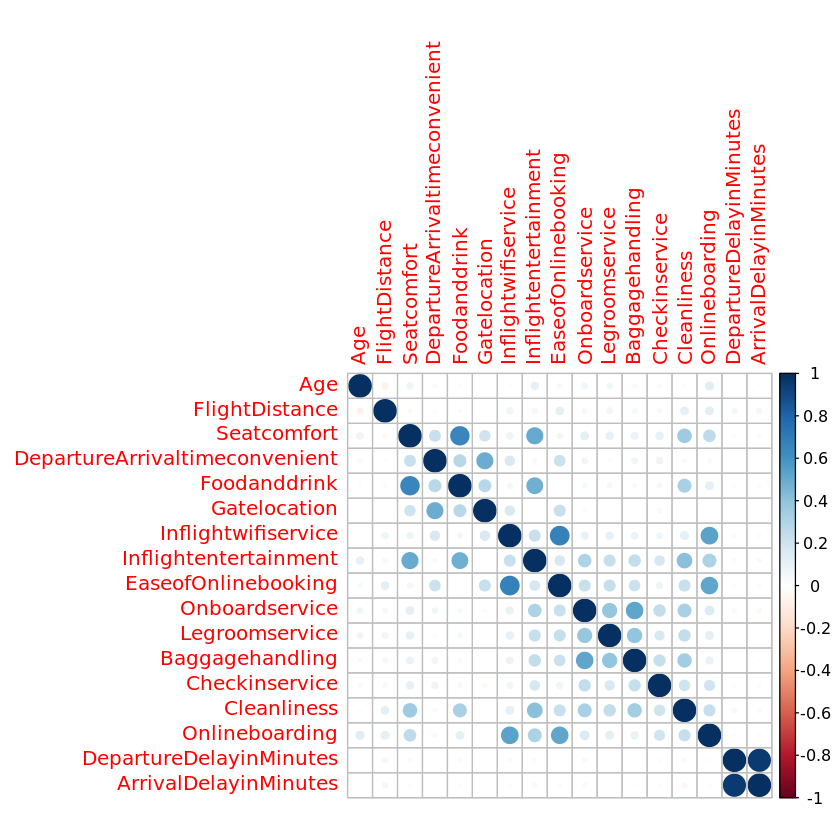

In [14]:
# Visualizing a correlation of numeric fields
library(corrplot)
correlations <- cor(dataset[,numeric_fields])
corrplot(cor(dataset[,numeric_fields]), method="circle")

### Visualzing a Box Plot of a fields containing statisfaction level

We can see that most of the fields containing statisfaction level have a good balance normal distribution but some still have a some outliers and also positive and negative skewing such in ***("Onboard service"), ("Baggehandling"), ("Checkinservice") and ("Cleanliness")***

Also, The satisfaction scale is rating between 0-5 but in Baggagehandling the range of value dataset contains in that field is 1-5

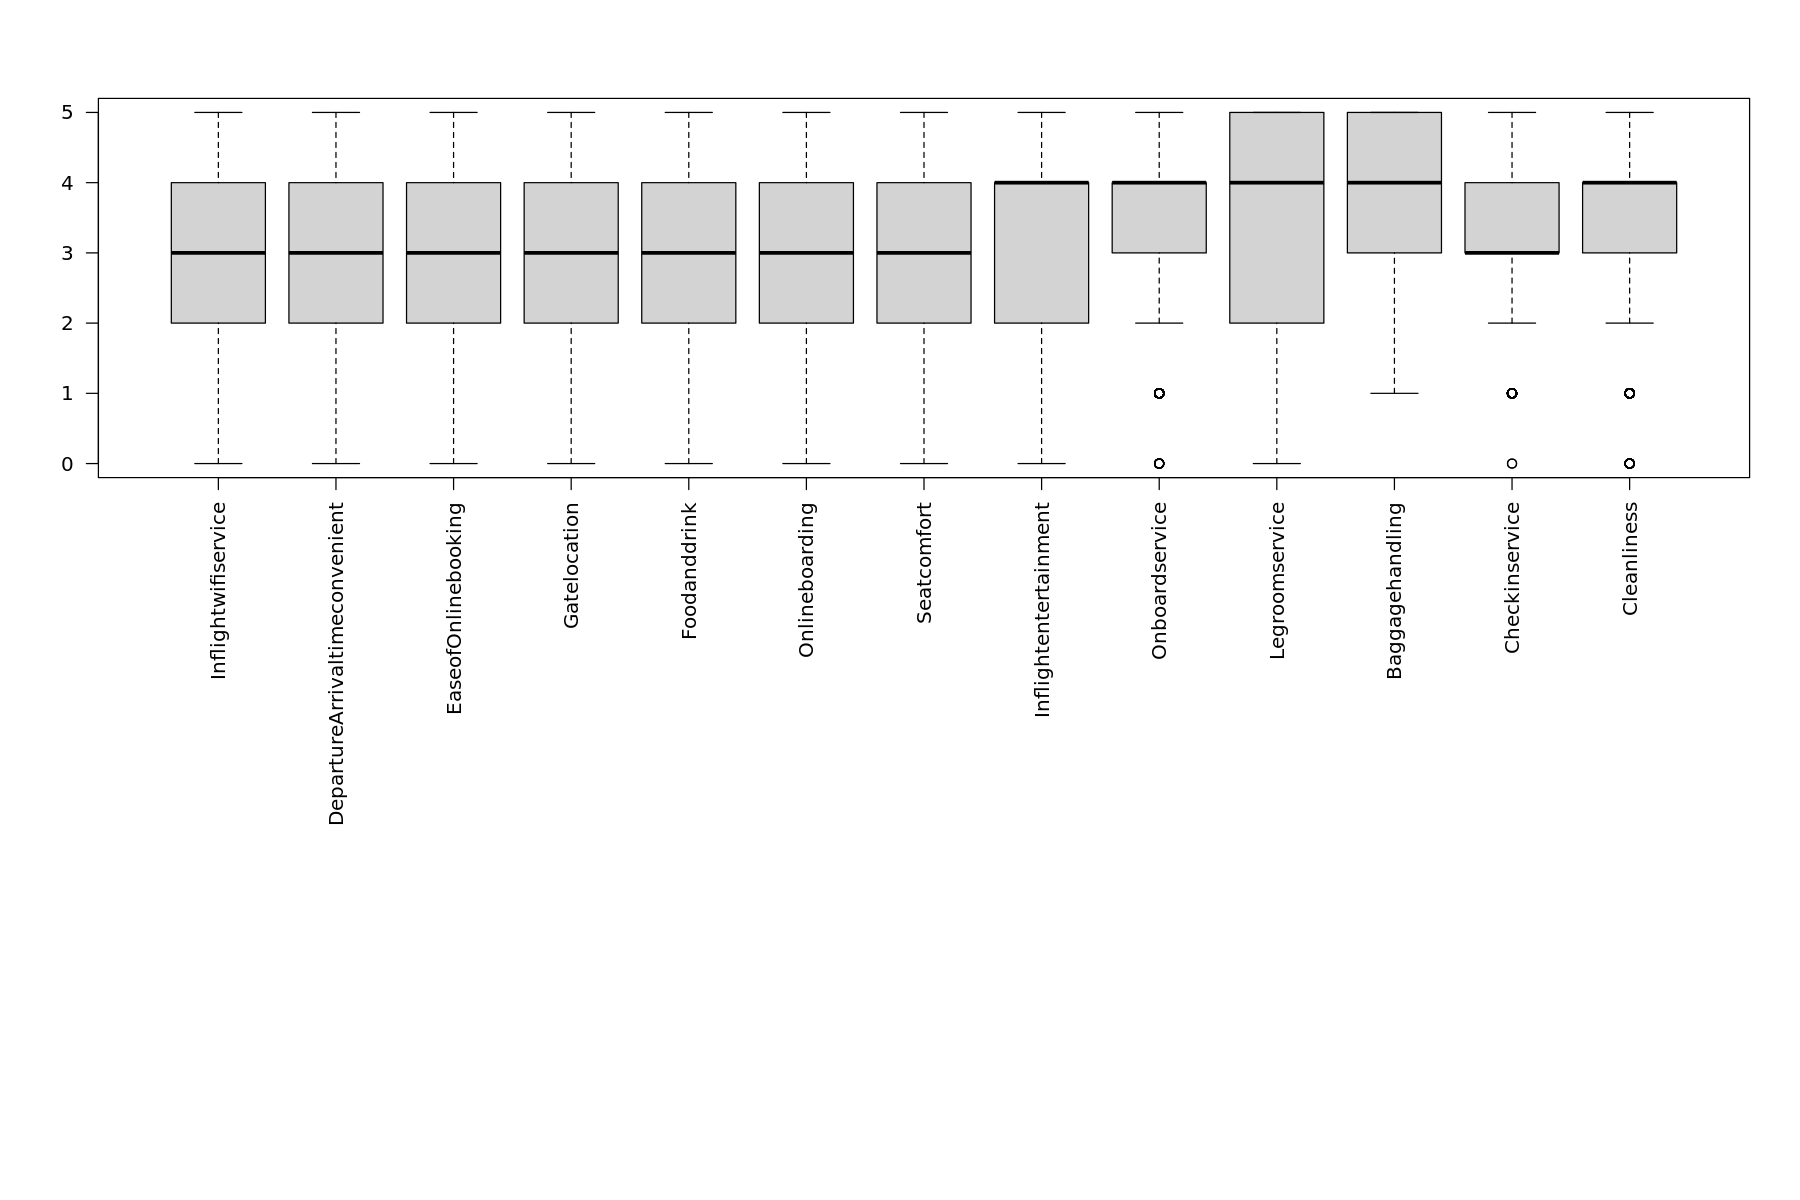

In [15]:
# Box plot
par(mfrow=c(2,1))
options(repr.plot.width = 15, repr.plot.height = 10)
# satisfaction data

satis_data<-dataset[,sat_cols]

boxplot(satis_data, las = 2)


### Visualizing a Historgram in in other numeric fields'

For visualizing other numeric fields, using Histogram are suitable for visualizing a distribution of data in those field.

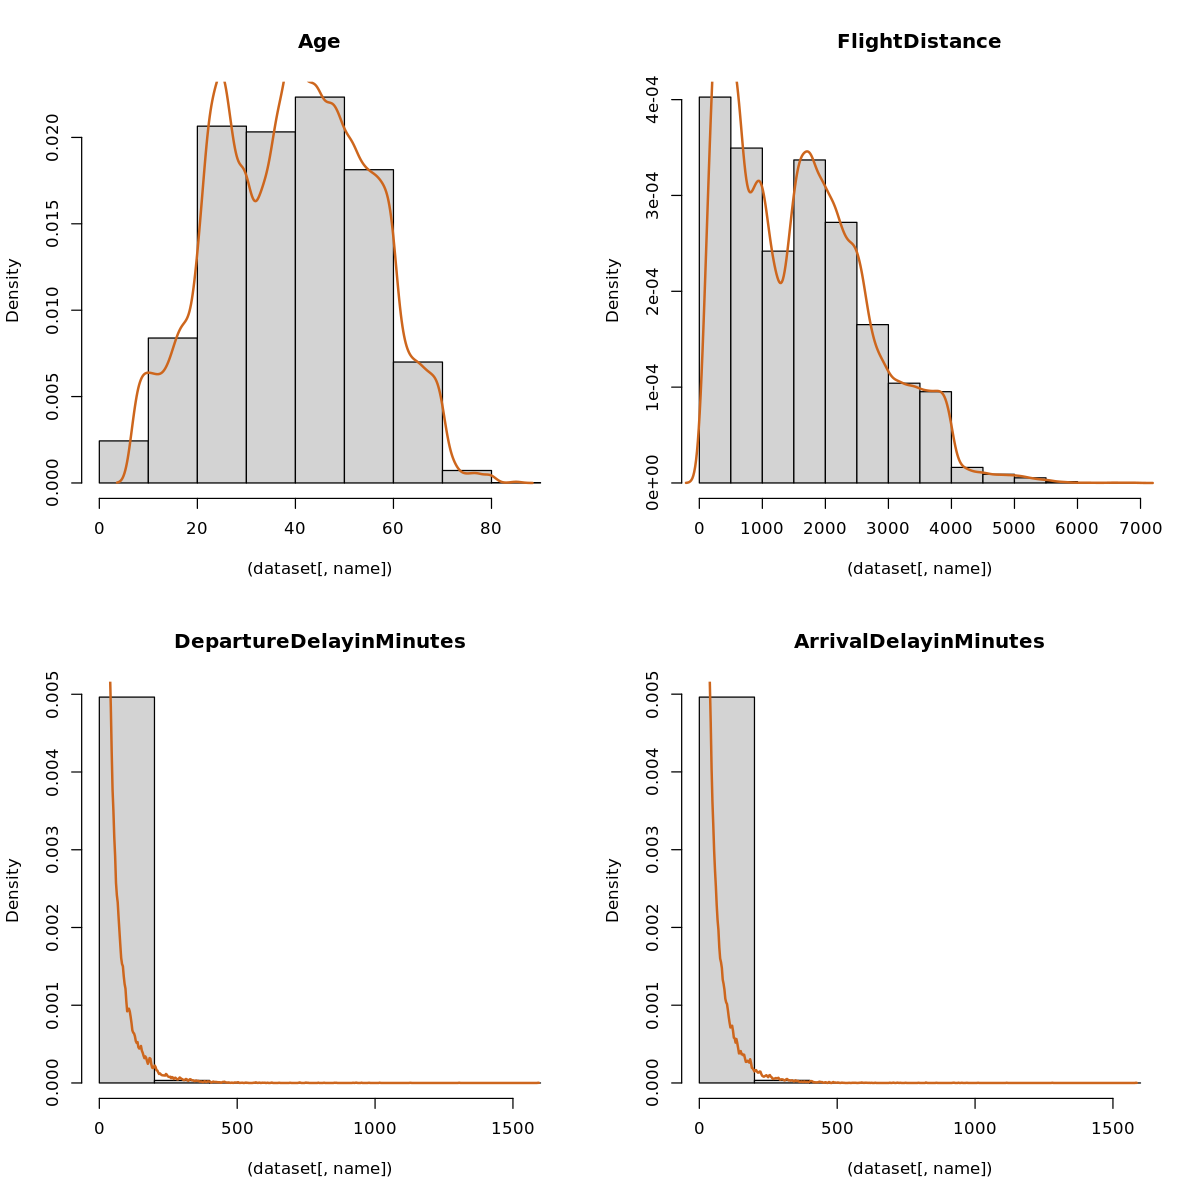

In [16]:
# Box plot
# satisfaction data

other_num<-dataset[,pure_numerical_val]

par(mfrow=c(2,2))
options(repr.plot.width = 10, repr.plot.height = 10)
for (name in pure_numerical_val){
    
    hist((dataset[,name]), main=name,breaks=10,prob=TRUE)
    lines(density(dataset[,name]),
      lwd = 2,
      col = "chocolate3")
}


Histrogram show that in columns ***('Age')*** has a perfect normal distribution where in ***('Flightdistance')*** the distribution of a data is skew to the left and have small number which means the frequency of a data  passenger short flight distance is more than longer flight distance. After looking through distibution of these columns, ***("Age")*** can be treat as ordinal value and use Linear normalization to normalize a value in a range of 0.0 to 1.0 in the processing part. 

For others 2 columns, the DepatureDelayinMinutes and ArrivalDelayinMinutes are clearly have distribution skew to the left and large value of outlier in a columns. Both of these need to be treat as a Discrete value and will be preprocess using one hot encoding.



## Visualize Symbolic Fields

### Use BarChart to display a distribution of each categories in each fields

Barchar is suitable for visualizing distribution of a symbolic fields. For example we can cleary visualize the number of a satisfy passenger and unsatisfy

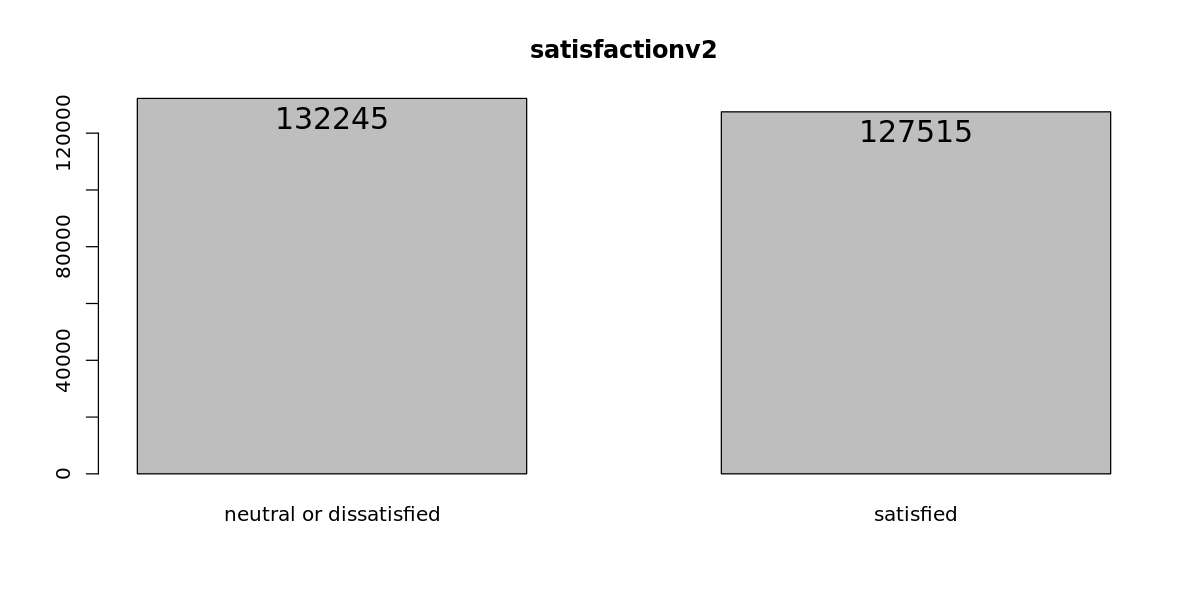

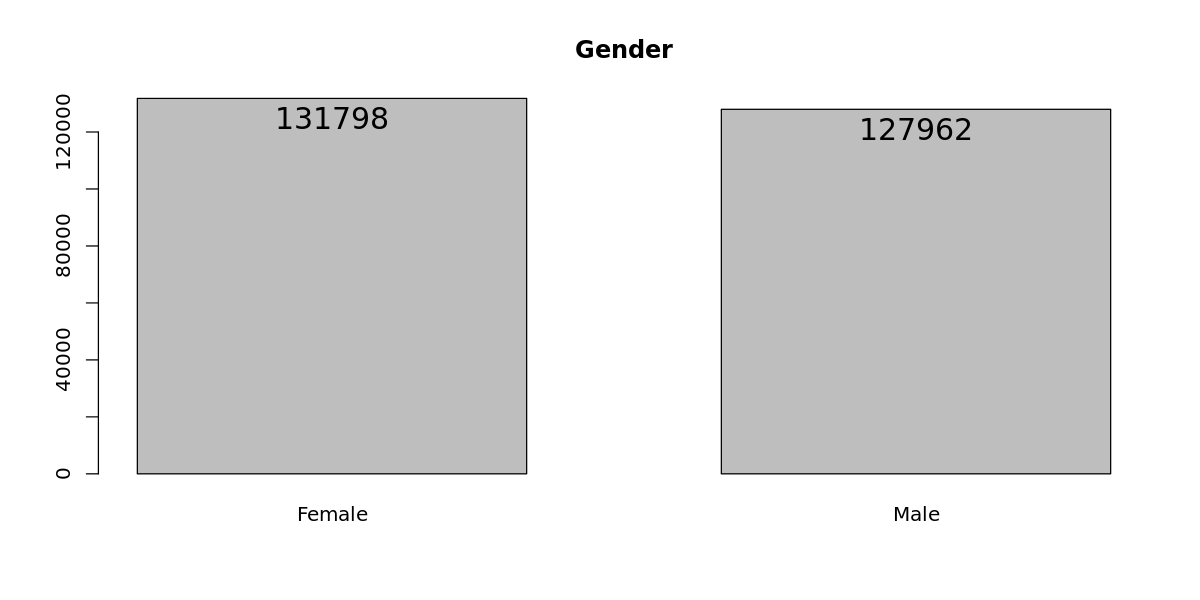

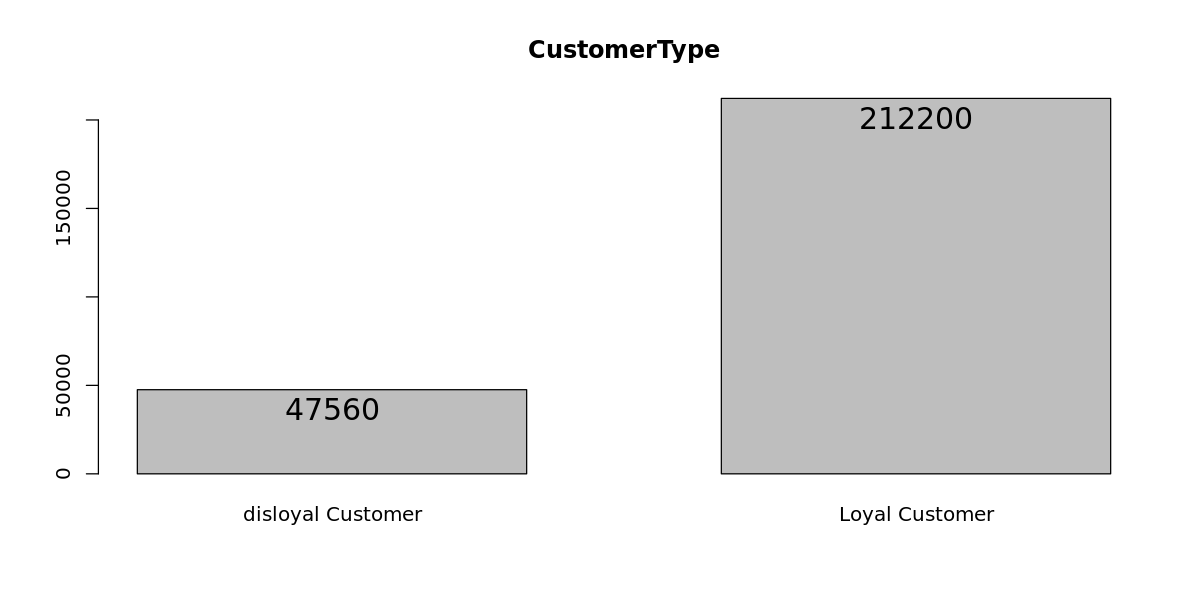

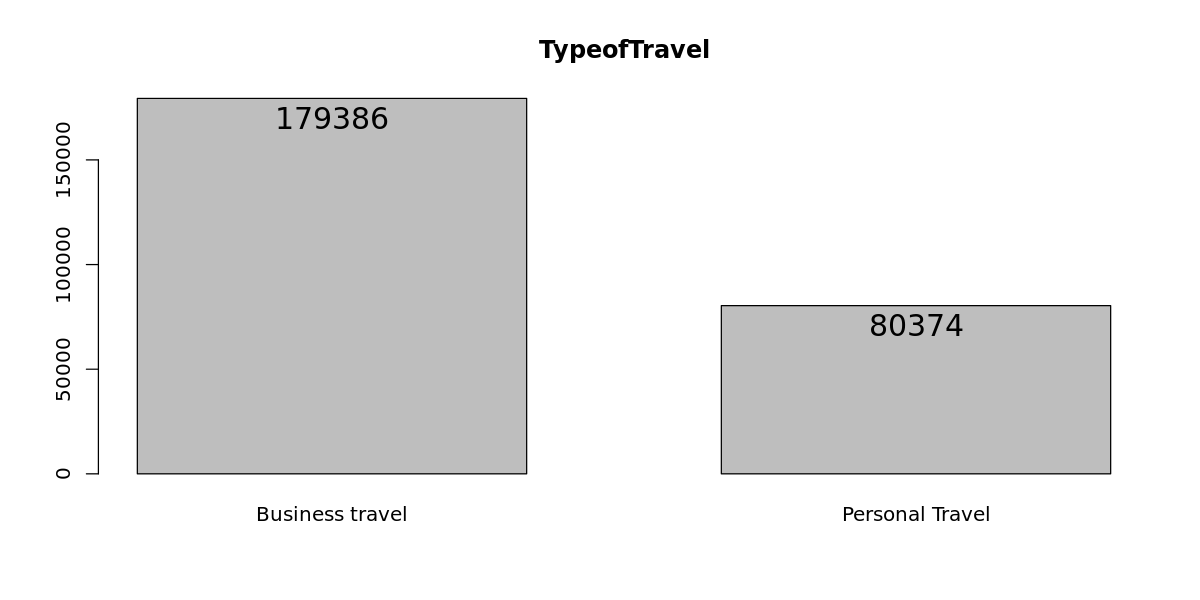

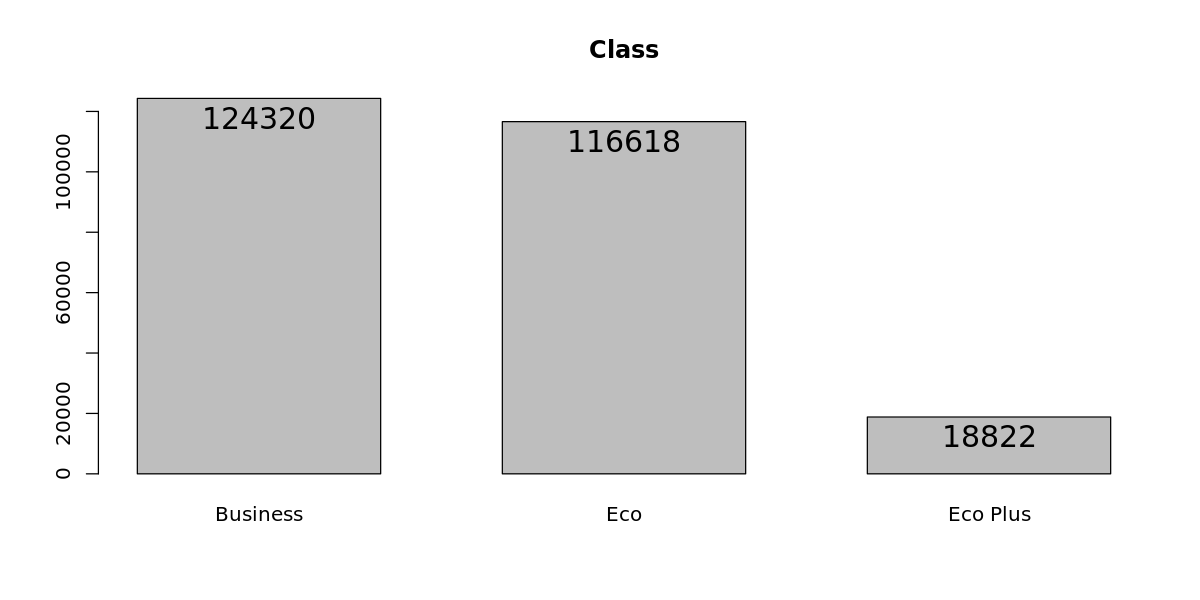

In [17]:
par(mfrow=c(1,1),pty = "m")
options(repr.plot.width = 10, repr.plot.height = 5)
for (name in symbolic_fields){
    counts <- table(dataset[,name])
    xx<-barplot(counts, main=name,space=0.5) 
    text(x = xx, y = counts, label = counts , pos = 1, cex = 1.5, col = "black")     
}



### Visualizing Relationship between a symbolic fields

Here we are using a barchart to visualize a relationship of satiscation fields on other symbolic fields.

                         Class
satisfactionv2            Business   Eco Eco Plus
  neutral or dissatisfied    37059 82702    12484
  satisfied                  87261 33916     6338

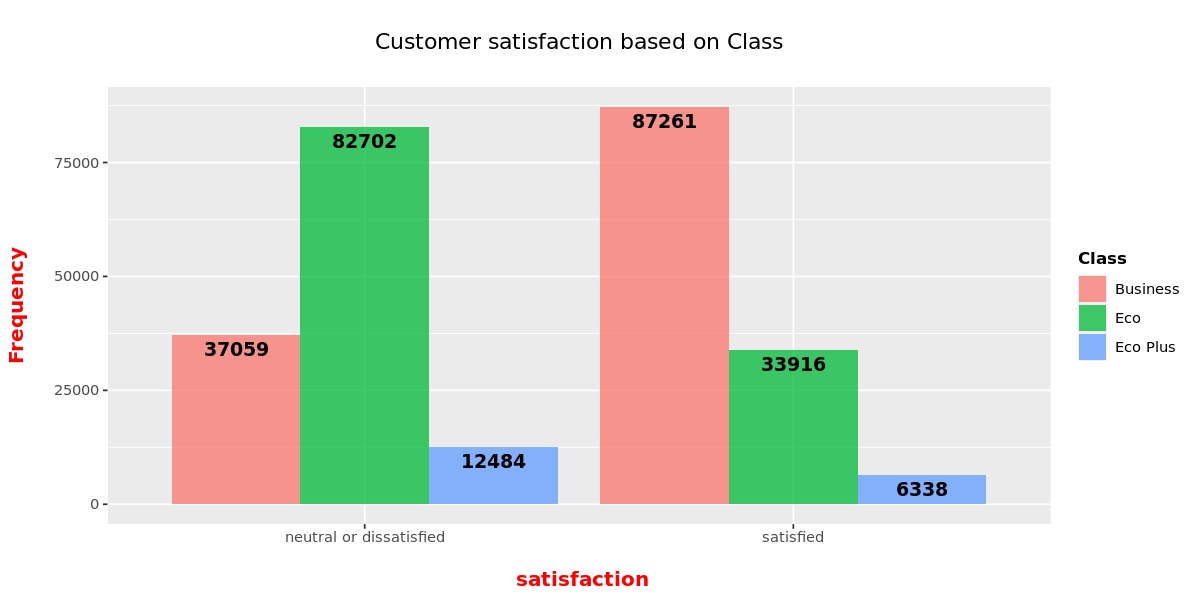

In [18]:
library("ggplot2")
sat_class = dataset[,c('satisfactionv2','Class')]
table(sat_class)
results <- data.frame(table(sat_class))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Class)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Class \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

                         Gender
satisfactionv2            Female  Male
  neutral or dissatisfied  60601 71644
  satisfied                71197 56318

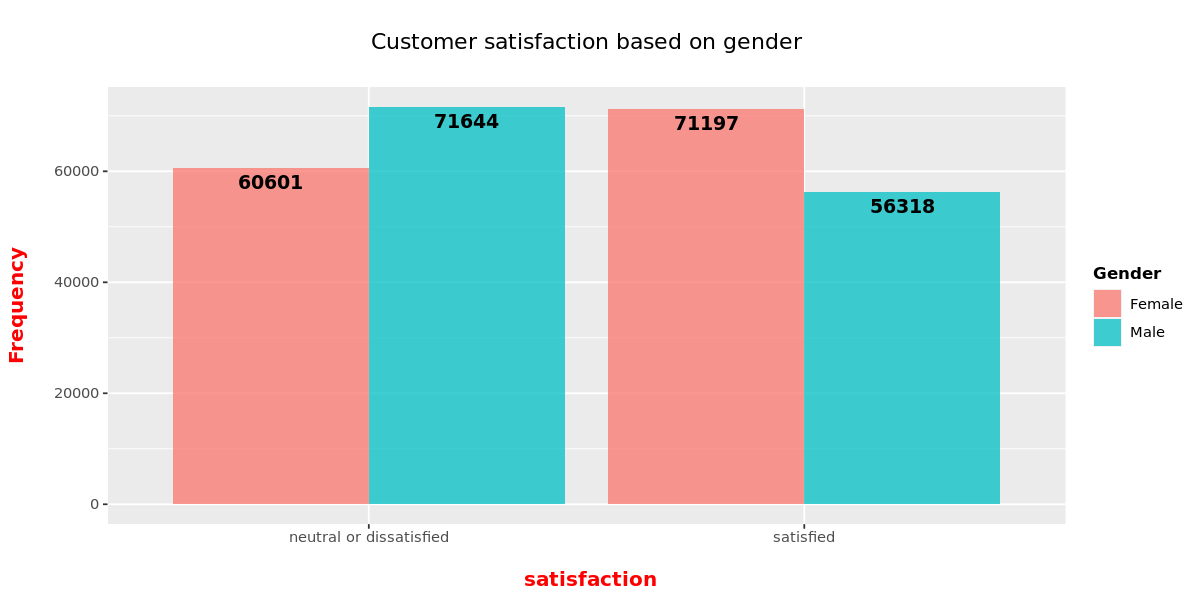

In [19]:
library("ggplot2")
sat_gender = dataset[,c('satisfactionv2','Gender')]
table(sat_gender)
results <- data.frame(table(sat_gender))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Gender)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on gender \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

                         CustomerType
satisfactionv2            disloyal Customer Loyal Customer
  neutral or dissatisfied             36160          96085
  satisfied                           11400         116115

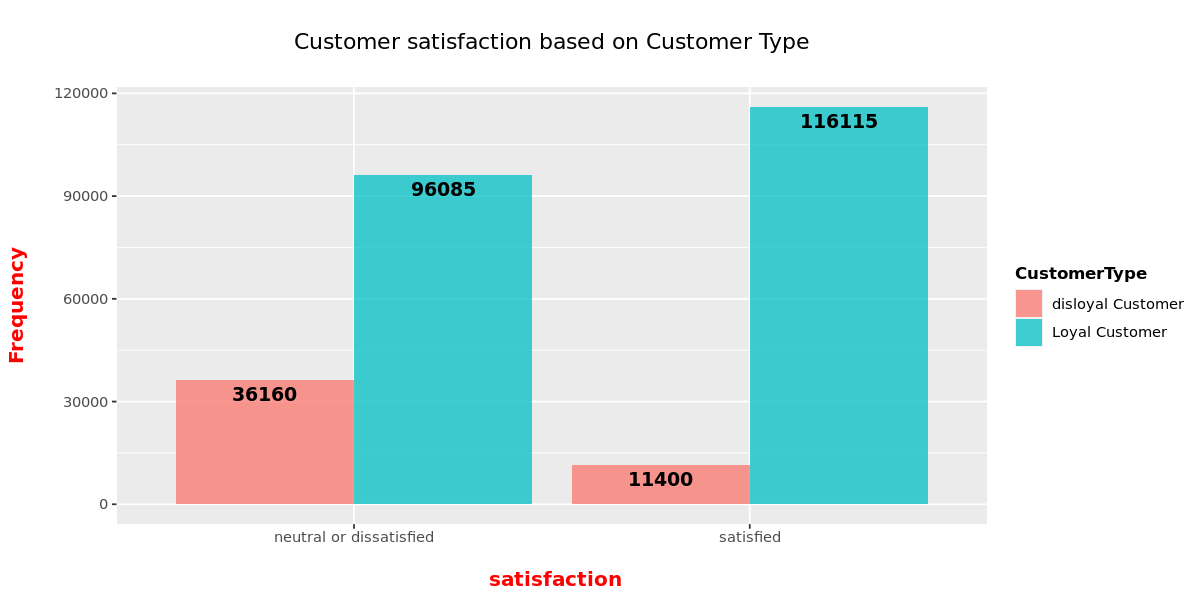

In [20]:

sat_type = dataset[,c('satisfactionv2','CustomerType')]
table(sat_type)
results <- data.frame(table(sat_type))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = CustomerType)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Customer Type \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

                         TypeofTravel
satisfactionv2            Business travel Personal Travel
  neutral or dissatisfied           74674           57571
  satisfied                        104712           22803

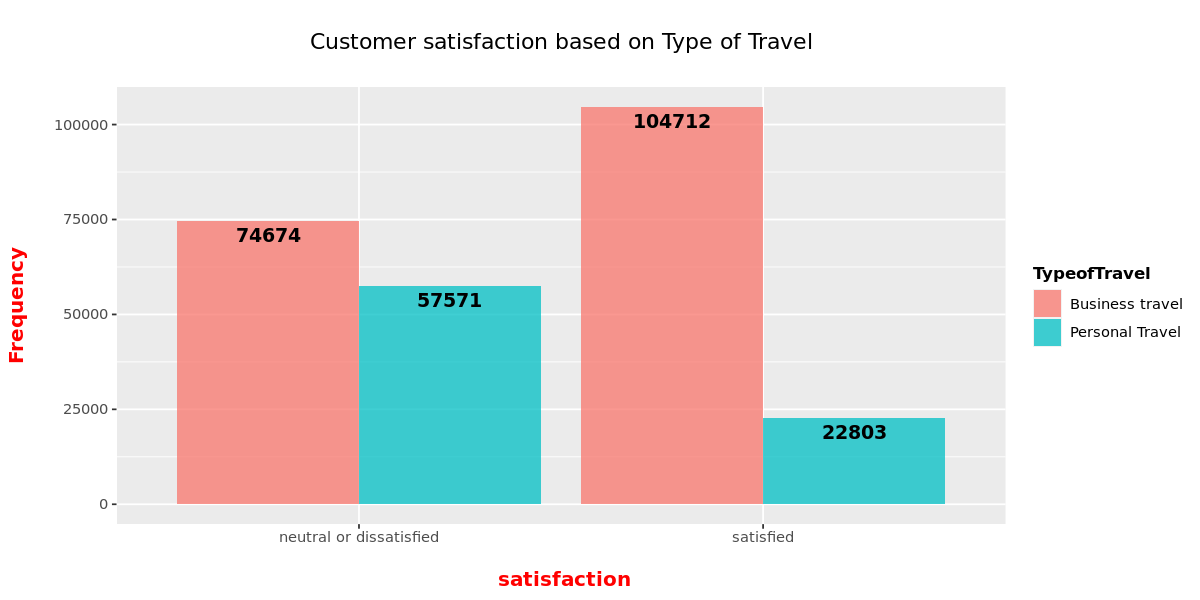

In [21]:
sat_type = dataset[,c('satisfactionv2','TypeofTravel')]
table(sat_type)
results <- data.frame(table(sat_type))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill =TypeofTravel)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Type of Travel \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

### Visualizing Relationship between a Cusomter Satisfaction fields with fields containing Satisfaction scale


Here again, we are using a barchart to visualize a relationship of satiscation fields with all a fields containing a rating of customer satisfaction in each categories.

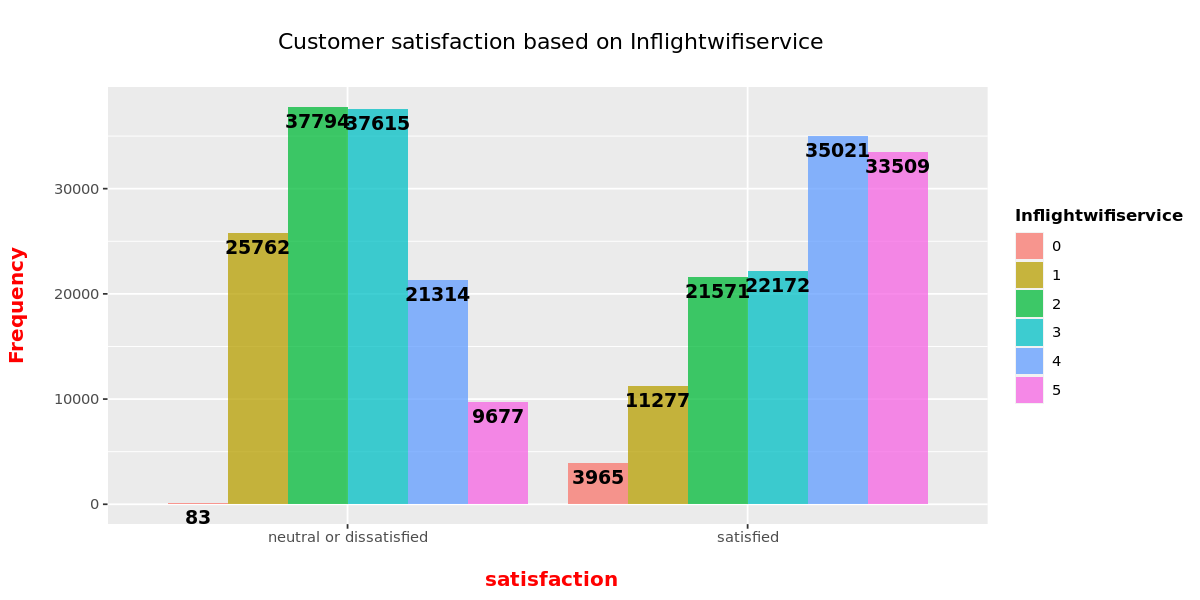

In [22]:

par(mfrow=c(2,4),pty = "m")
options(repr.plot.width = 10,epr.plot.height = 5)

temp_df<-cbind(dataset[,c('satisfactionv2','Inflightwifiservice')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill =Inflightwifiservice)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Inflightwifiservice\n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

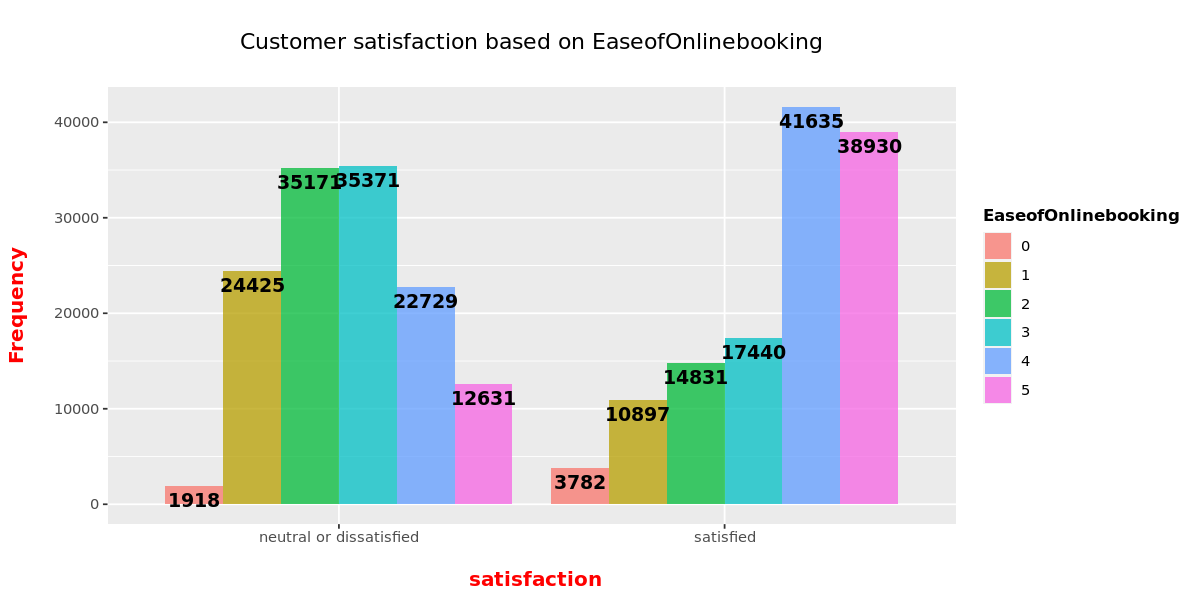

In [23]:
temp_df<-cbind(dataset[,c('satisfactionv2','EaseofOnlinebooking')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill =EaseofOnlinebooking)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on EaseofOnlinebooking \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

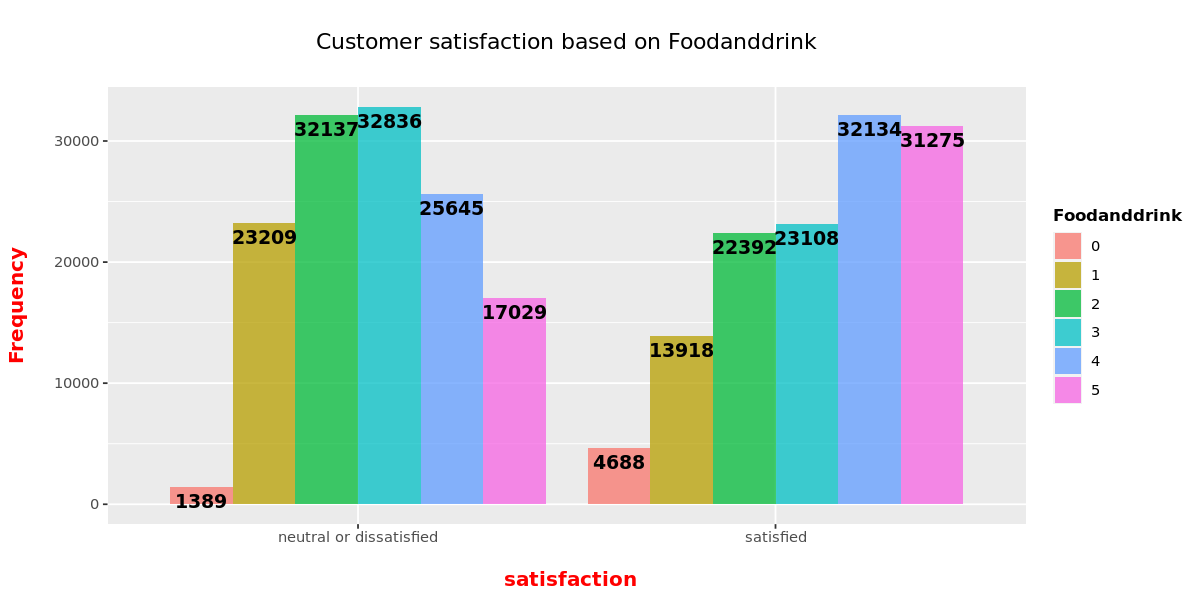

In [24]:
temp_df<-cbind(dataset[,c('satisfactionv2','Foodanddrink')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Foodanddrink)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Foodanddrink \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

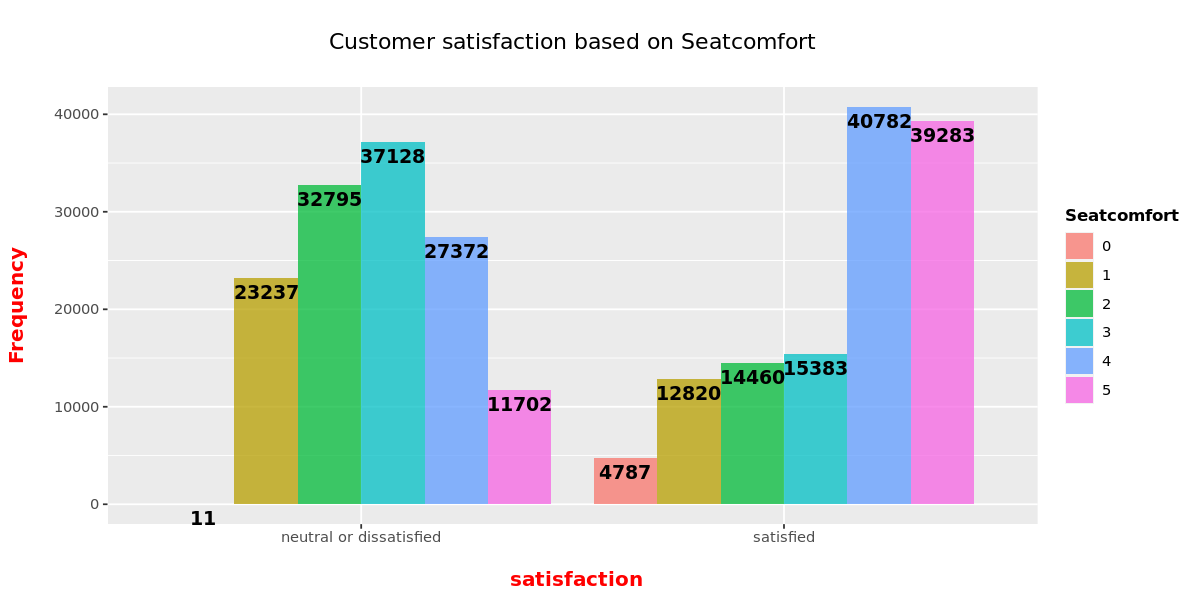

In [25]:
temp_df<-cbind(dataset[,c('satisfactionv2','Seatcomfort')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Seatcomfort)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Seatcomfort \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

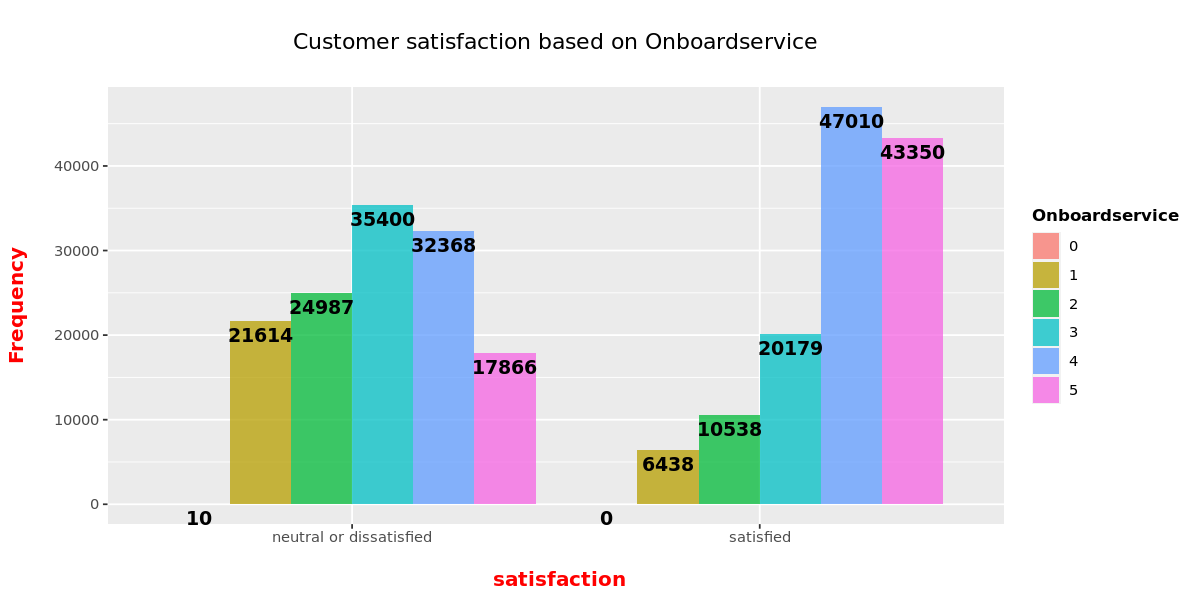

In [26]:
temp_df<-cbind(dataset[,c('satisfactionv2','Onboardservice')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Onboardservice)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Onboardservice \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

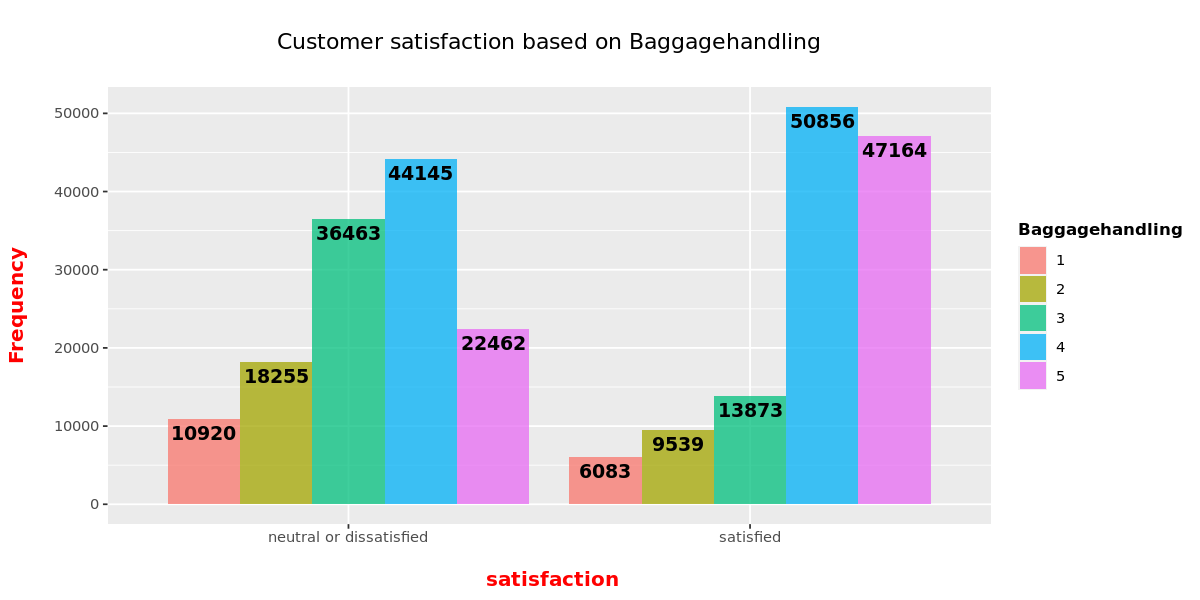

In [27]:
temp_df<-cbind(dataset[,c('satisfactionv2','Baggagehandling')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Baggagehandling)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Baggagehandling \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

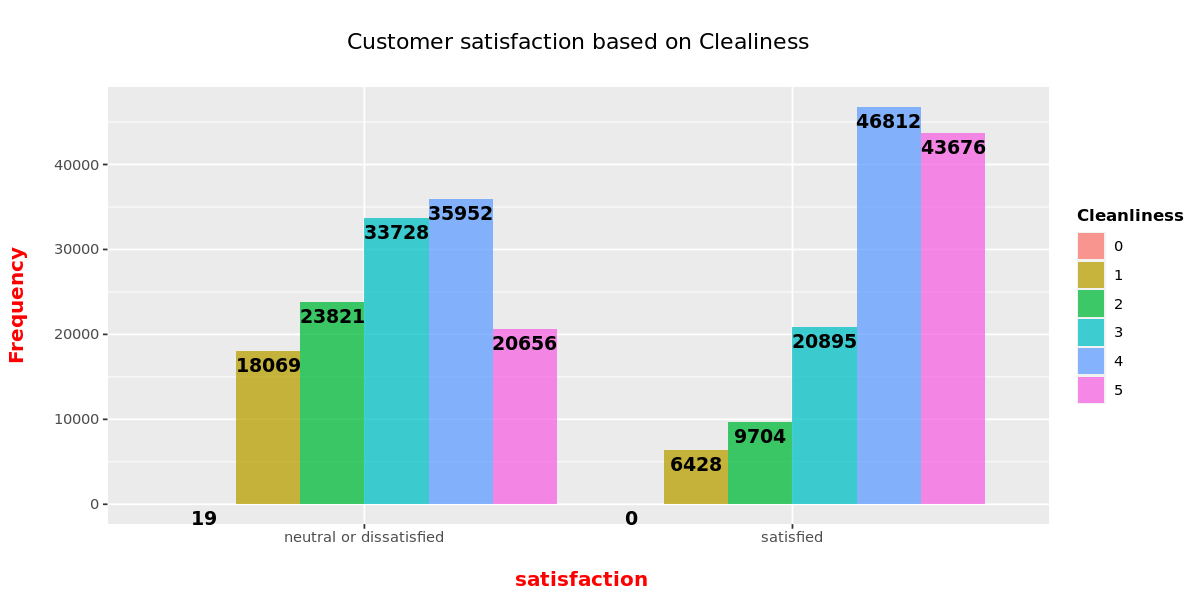

In [28]:
temp_df<-cbind(dataset[,c('satisfactionv2','Cleanliness')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Cleanliness)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Clealiness \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

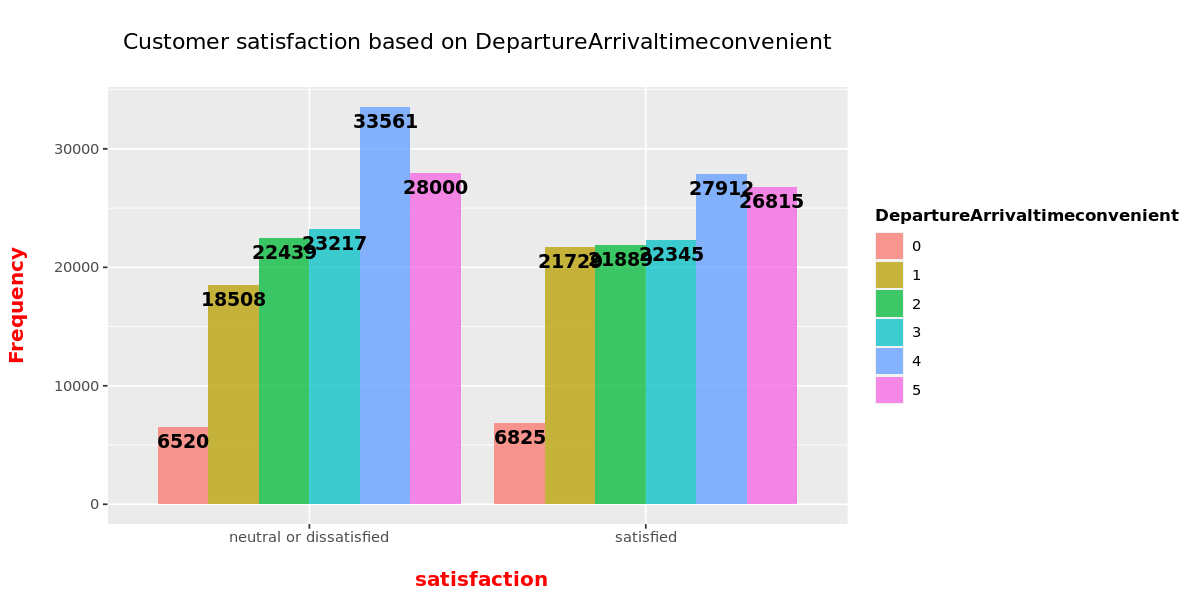

In [29]:
temp_df<-cbind(dataset[,c('satisfactionv2','DepartureArrivaltimeconvenient')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = DepartureArrivaltimeconvenient)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on DepartureArrivaltimeconvenient \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

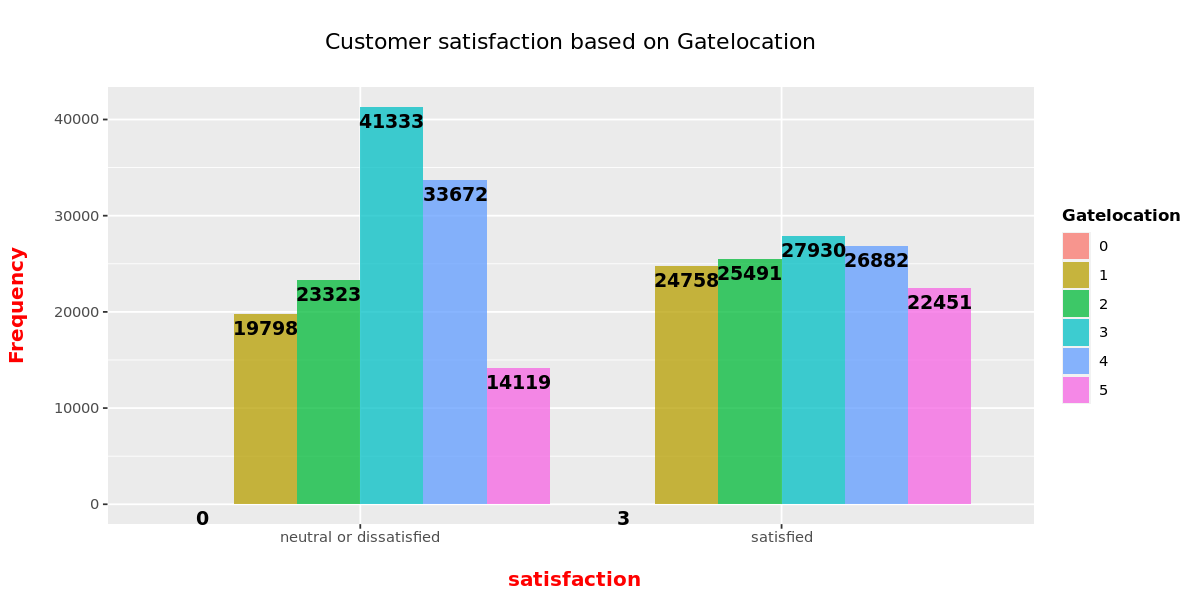

In [30]:
temp_df<-cbind(dataset[,c('satisfactionv2','Gatelocation')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Gatelocation)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Gatelocation \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

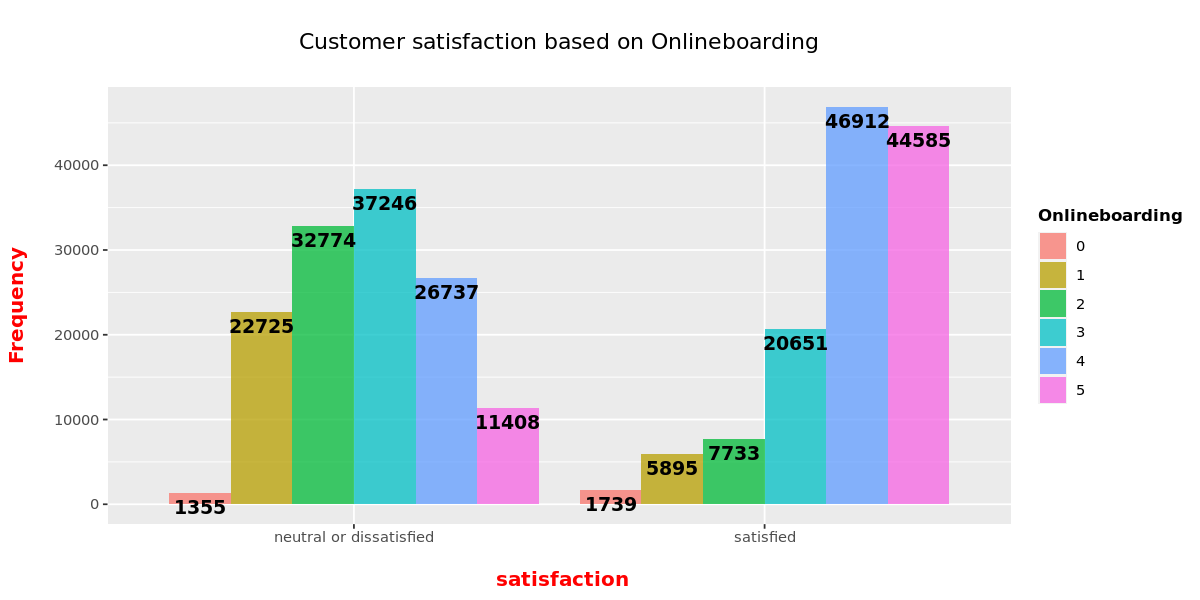

In [31]:
temp_df<-cbind(dataset[,c('satisfactionv2','Onlineboarding')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Onlineboarding)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Onlineboarding \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

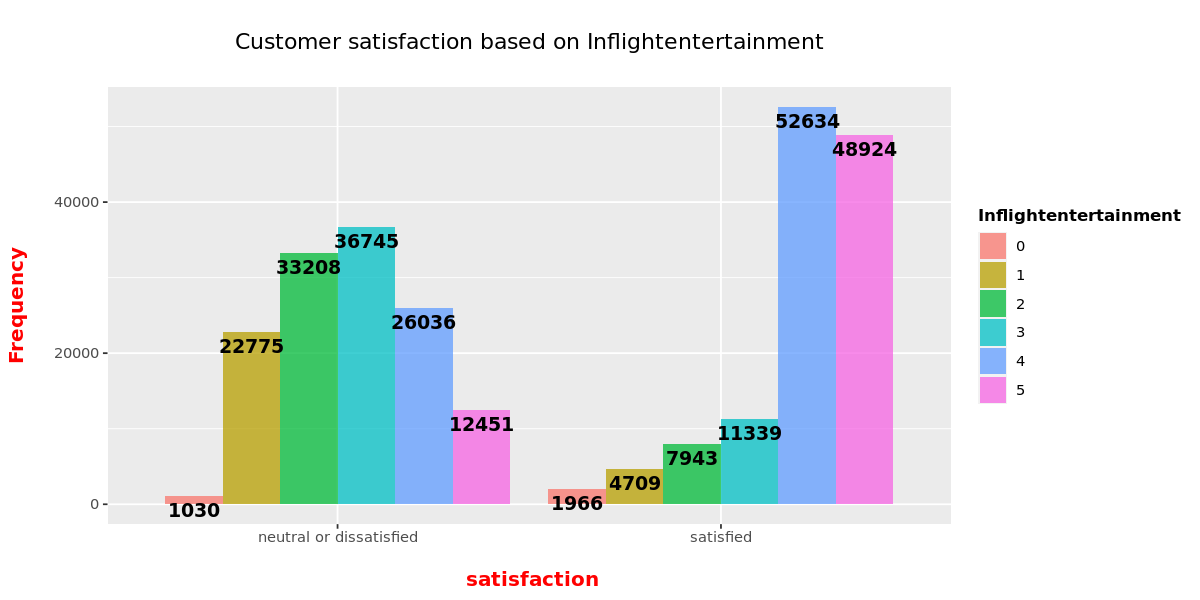

In [32]:
temp_df<-cbind(dataset[,c('satisfactionv2','Inflightentertainment')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill =Inflightentertainment)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Inflightentertainment \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

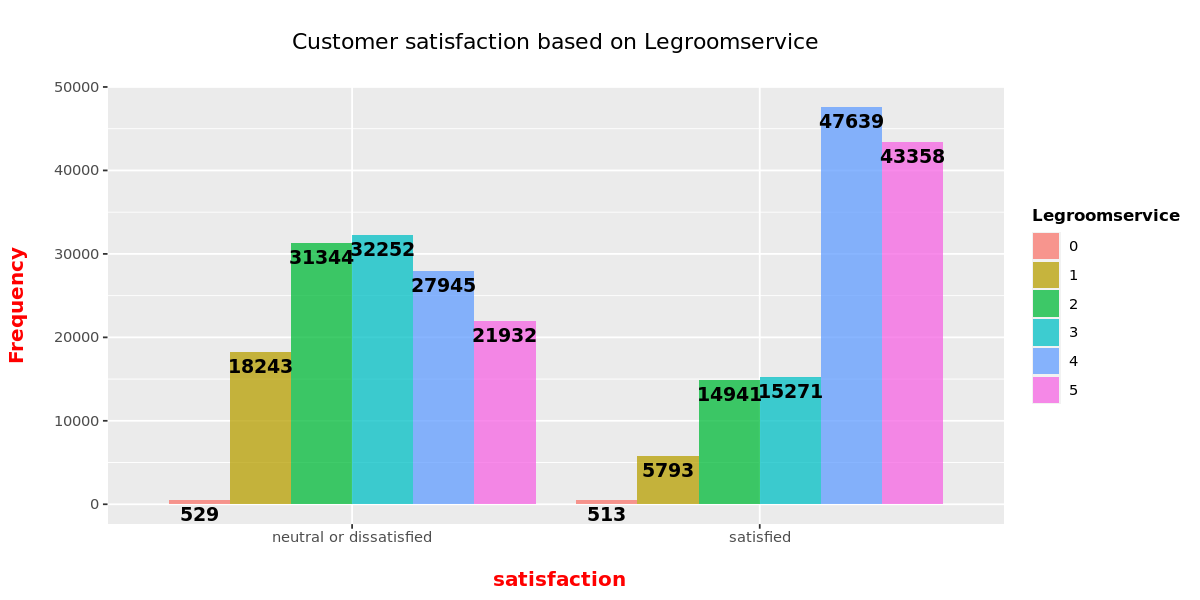

In [33]:
temp_df<-cbind(dataset[,c('satisfactionv2','Legroomservice')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Legroomservice)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Legroomservice \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

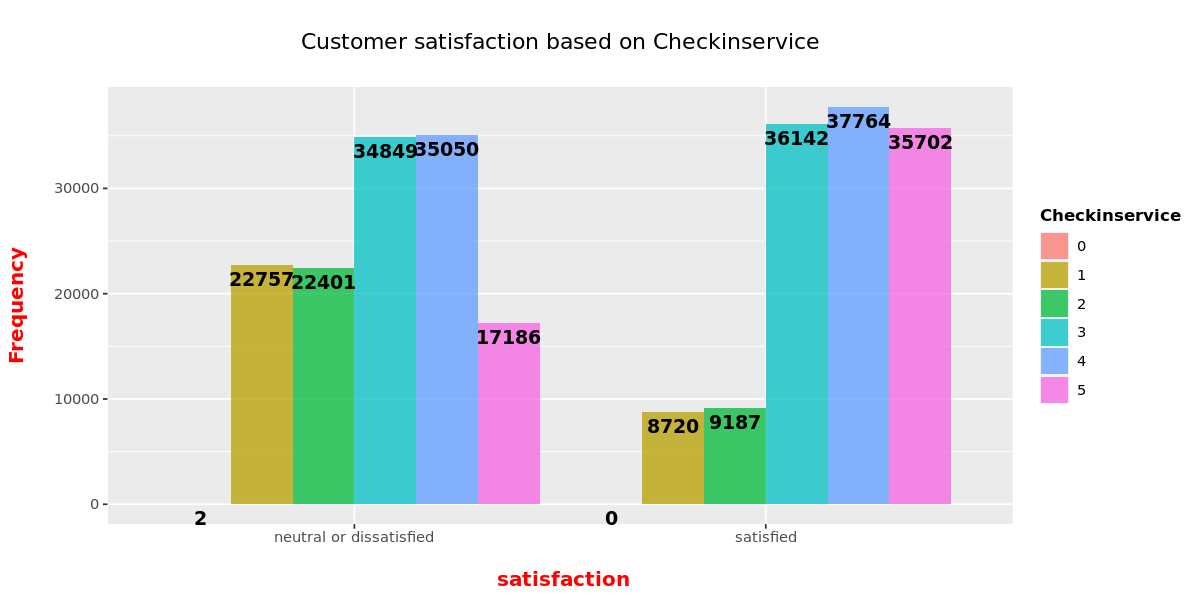

In [34]:
temp_df<-cbind(dataset[,c('satisfactionv2','Checkinservice')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Checkinservice)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Checkinservice \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

### Visualizing Relationship between a Cusomter Satisfaction fields with maximum occurance of a rating from all satisfation scale for each passenger

Looking at the a plot of relationship individually might be too difficult to understand the relationship and satisfaction rating in each categories to passenger satisfation. Instead, we count the occurance of customers' rating and take the maximum rating occur for each customer and use barchart to visualize a relationship with final satisfaction

In [35]:
sat_data=dataset[,sat_cols]

# Calculate a maximum occurance from all satisfation scale for each customer  
max_occurance<-apply(sat_data,1,function(x) names(which.max(table(x))))

In [36]:
# create dataframe of max occurance scale
max_occur<-data.frame( max_occur = max_occurance)

sat=dataset[,c("satisfactionv2")]
# combine dataframe of max occurance and final statisfaction
max_sat<-cbind(max_occur,sat)


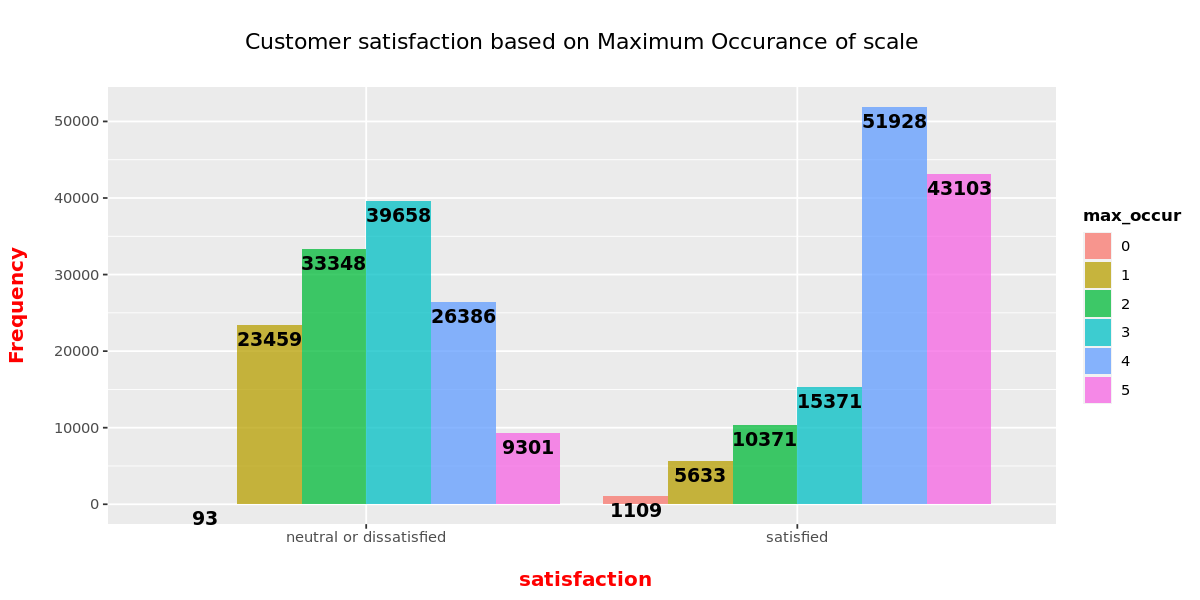

In [37]:
results <- data.frame(table(max_sat))
ggplot(data = results, aes(x = sat, y = Freq, fill =max_occur)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Maximum Occurance of scale \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

From this visualization we can see that statiscally passengers that have neutral or disstasified to a service of an airlines mostly have a maximum occurance of rating from 1 to 3. While on the other hand for a passenger with who satisfied a service has maximum occurance from 4 to 5.

# Data preparation or Data preprocessing

Data preprocessing is a crucial process before feeding a data into a models

In [38]:
dataset

satisfactionv2 Gender CustomerType   Age TypeofTravel    Class   
1      satisfied      Female Loyal Customer 65  Personal Travel Eco     
2      satisfied      Male   Loyal Customer 47  Personal Travel Business
3      satisfied      Female Loyal Customer 15  Personal Travel Eco     
4      satisfied      Female Loyal Customer 60  Personal Travel Eco     
5      satisfied      Female Loyal Customer 70  Personal Travel Eco     
6      satisfied      Male   Loyal Customer 30  Personal Travel Eco     
7      satisfied      Female Loyal Customer 66  Personal Travel Eco     
8      satisfied      Male   Loyal Customer 10  Personal Travel Eco     
9      satisfied      Female Loyal Customer 56  Personal Travel Business
10     satisfied      Male   Loyal Customer 22  Personal Travel Eco     
11     satisfied      Female Loyal Customer 58  Personal Travel Eco     
12     satisfied      Female Loyal Customer 34  Personal Travel Eco     
13     satisfied      Male   Loyal Customer 62  Personal Travel Eco     
14     satisfied      Male   Loyal Customer 35  Personal Travel Eco     
15     satisfied      Female Loyal Customer 47  Personal Travel Eco     
16     satisfied      Male   Loyal Customer 60  Personal Travel Eco     
17     satisfied      Female Loyal Customer 13  Personal Travel Eco     
18     satisfied      Female Loyal Customer 52  Personal Travel Business
19     satisfied      Female Loyal Customer 55  Personal Travel Eco     
20     satisfied      Female Loyal Customer 28  Personal Travel Eco     
21     satisfied      Female Loyal Customer  9  Personal Travel Eco     
22     satisfied      Female Loyal Customer 10  Personal Travel Eco     
23     satisfied      Female Loyal Customer 25  Personal Travel Eco     
24     satisfied      Male   Loyal Customer 53  Personal Travel Business
25     satisfied      Female Loyal Customer 16  Personal Travel Eco Plus
26     satisfied      Male   Loyal Customer 30  Personal Travel Eco     
27     satisfied      Male   Loyal Customer 64  Personal Travel Eco     
28     satisfied      Female Loyal Customer 42  Personal Travel Eco     
29     satisfied      Male   Loyal Customer  9  Personal Travel Eco     
30     satisfied      Female Loyal Customer 35  Personal Travel Eco     
⋮      ⋮              ⋮      ⋮              ⋮   ⋮               ⋮       
259731 satisfied      Male   Loyal Customer 42  Business travel Business
259732 satisfied      Female Loyal Customer 46  Business travel Business
259733 satisfied      Male   Loyal Customer 20  Business travel Eco Plus
259734 satisfied      Female Loyal Customer 50  Business travel Business
259735 satisfied      Female Loyal Customer 43  Business travel Business
259736 satisfied      Male   Loyal Customer 35  Business travel Business
259737 satisfied      Male   Loyal Customer 53  Business travel Business
259738 satisfied      Female Loyal Customer 45  Business travel Business
259739 satisfied      Male   Loyal Customer 53  Business travel Business
259740 satisfied      Male   Loyal Customer 47  Business travel Business
259741 satisfied      Male   Loyal Customer 43  Business travel Business
259742 satisfied      Male   Loyal Customer 18  Business travel Eco     
259743 satisfied      Female Loyal Customer 31  Business travel Business
259744 satisfied      Female Loyal Customer 52  Business travel Business
259745 satisfied      Male   Loyal Customer 50  Business travel Business
259746 satisfied      Male   Loyal Customer 47  Business travel Business
259747 satisfied      Male   Loyal Customer 39  Business travel Business
259748 satisfied      Male   Loyal Customer 16  Business travel Eco     
259749 satisfied      Female Loyal Customer 48  Business travel Business
259750 satisfied      Male   Loyal Customer 64  Business travel Business
259751 satisfied      Female Loyal Customer 56  Business travel Business
259752 satisfied      Male   Loyal Customer 30  Business travel Business
259753 satisfied      Male   Loyal Customer 39  Business travel B

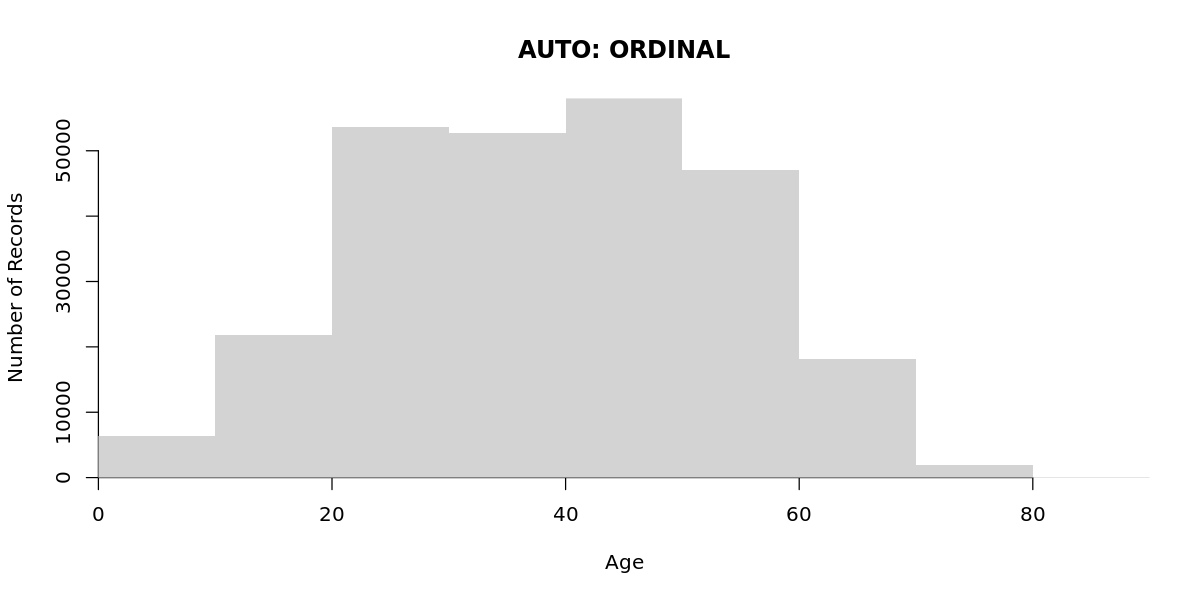

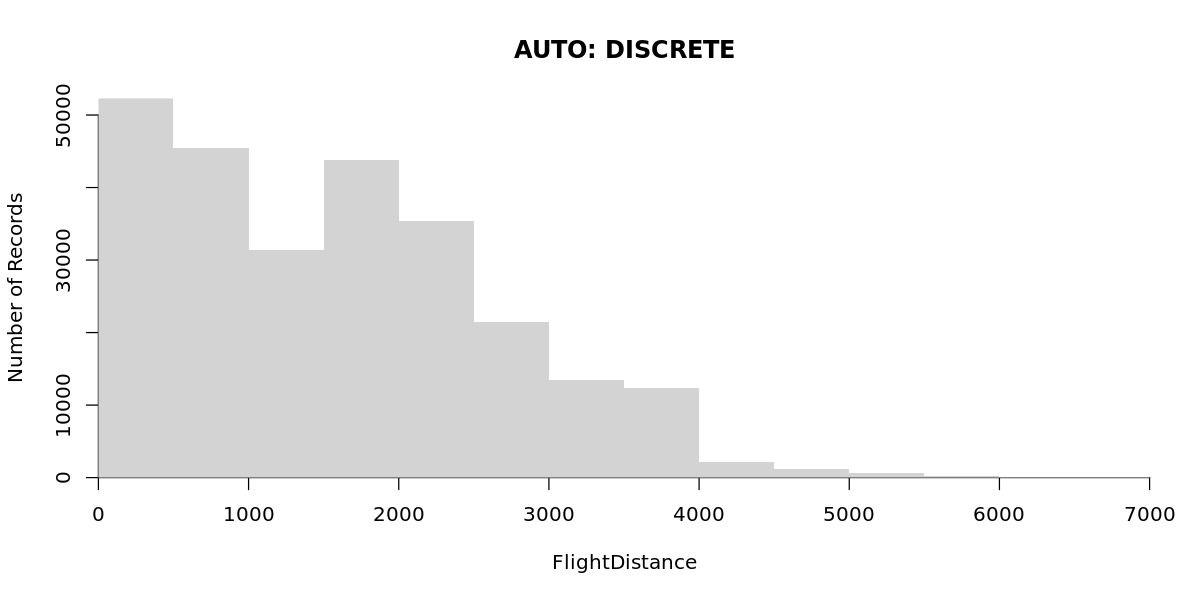

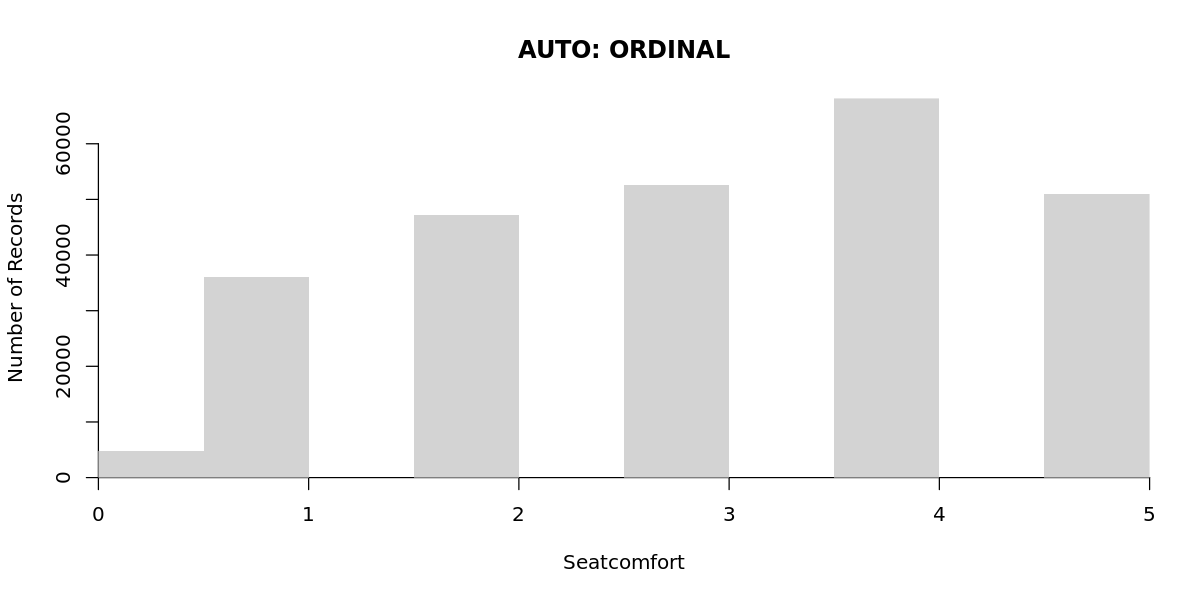

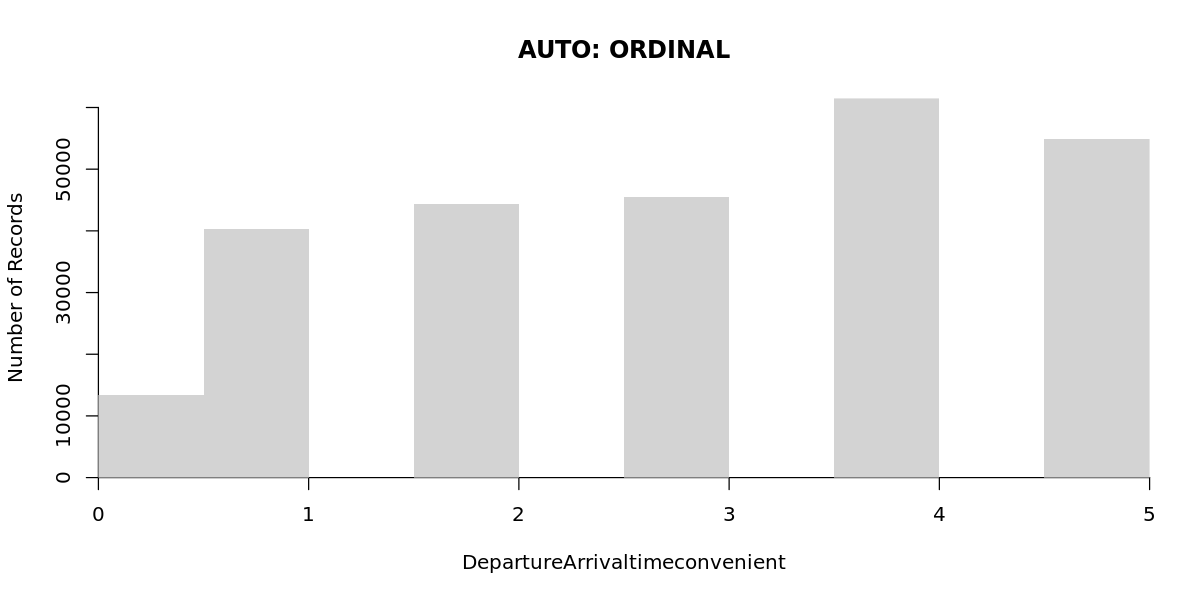

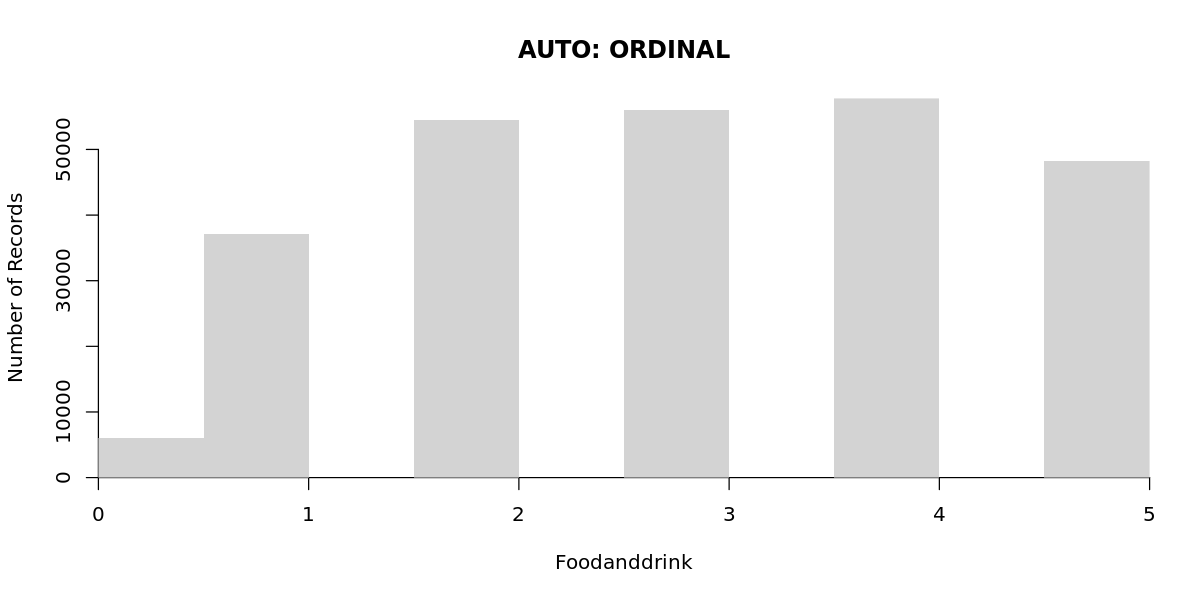

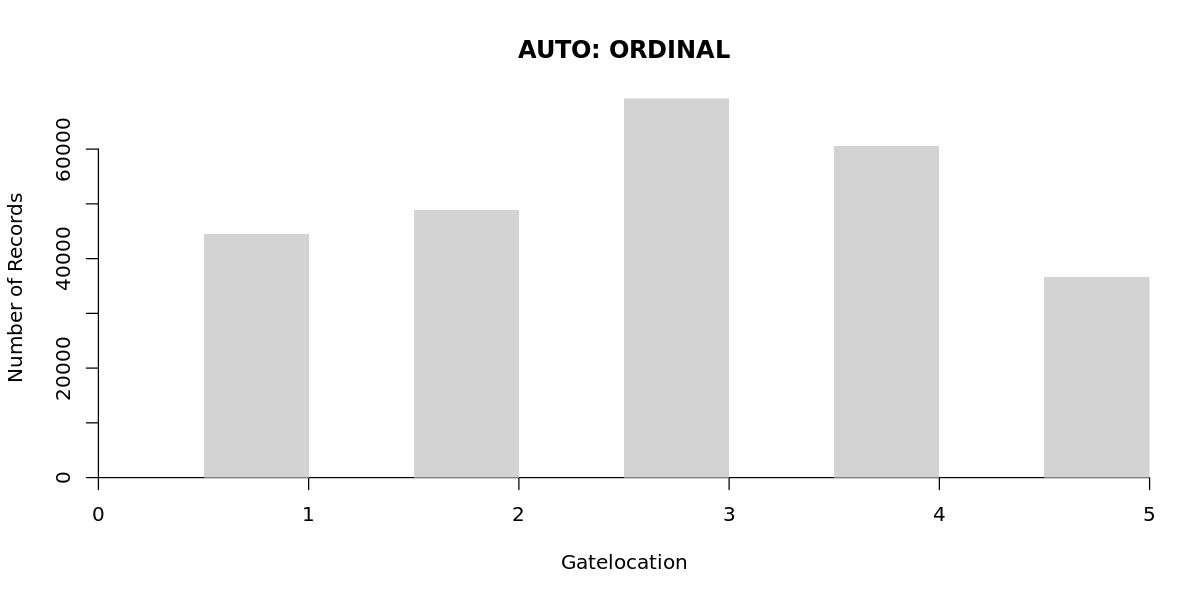

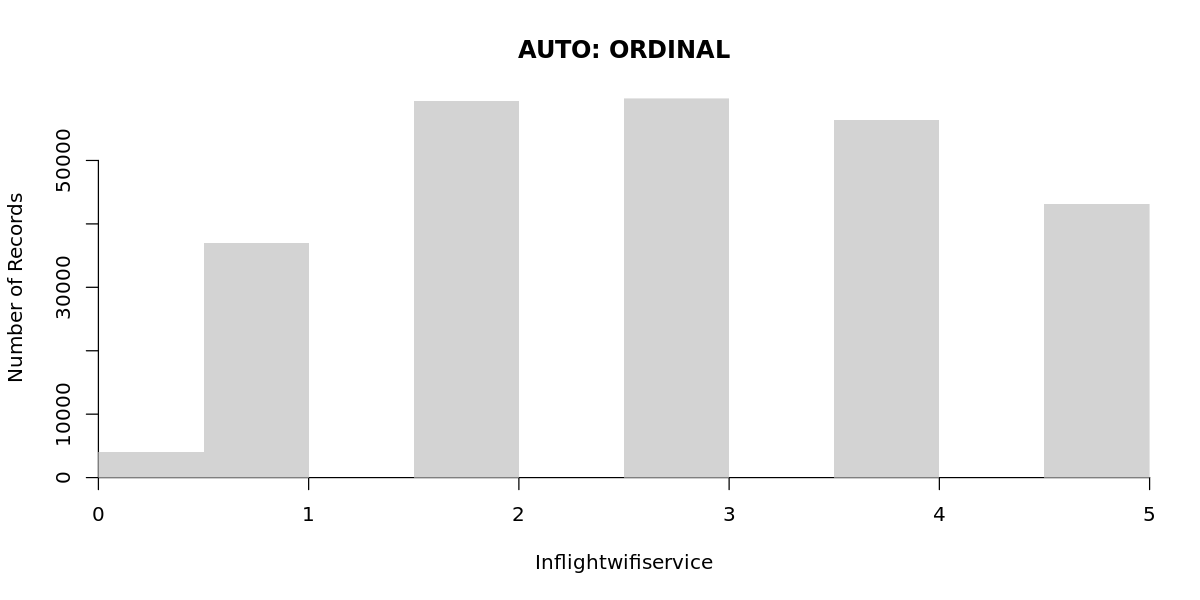

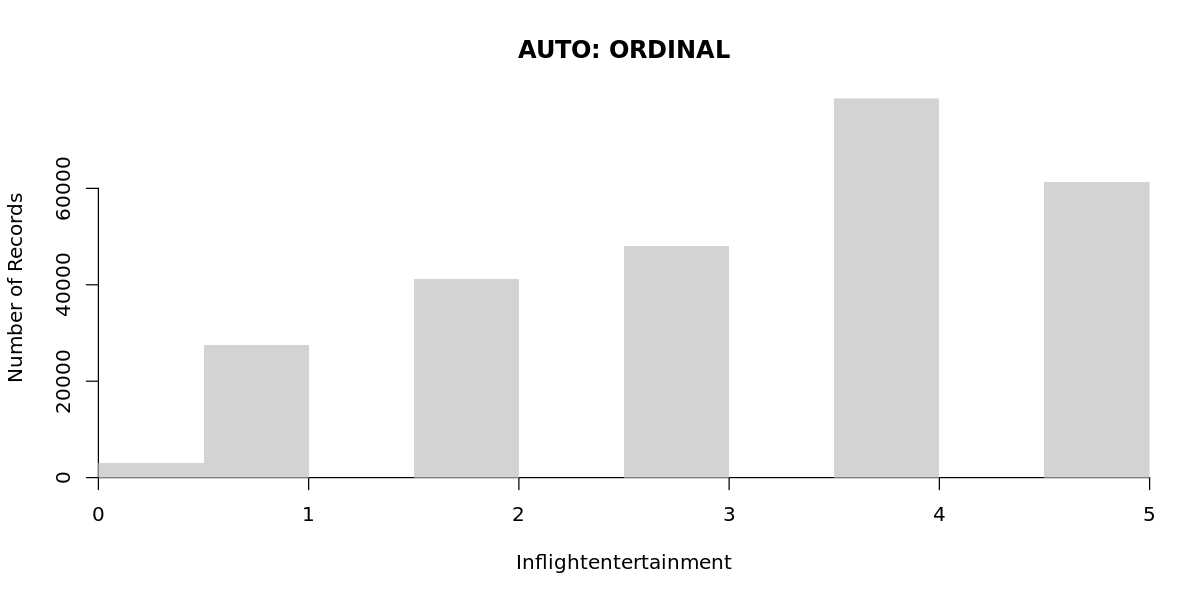

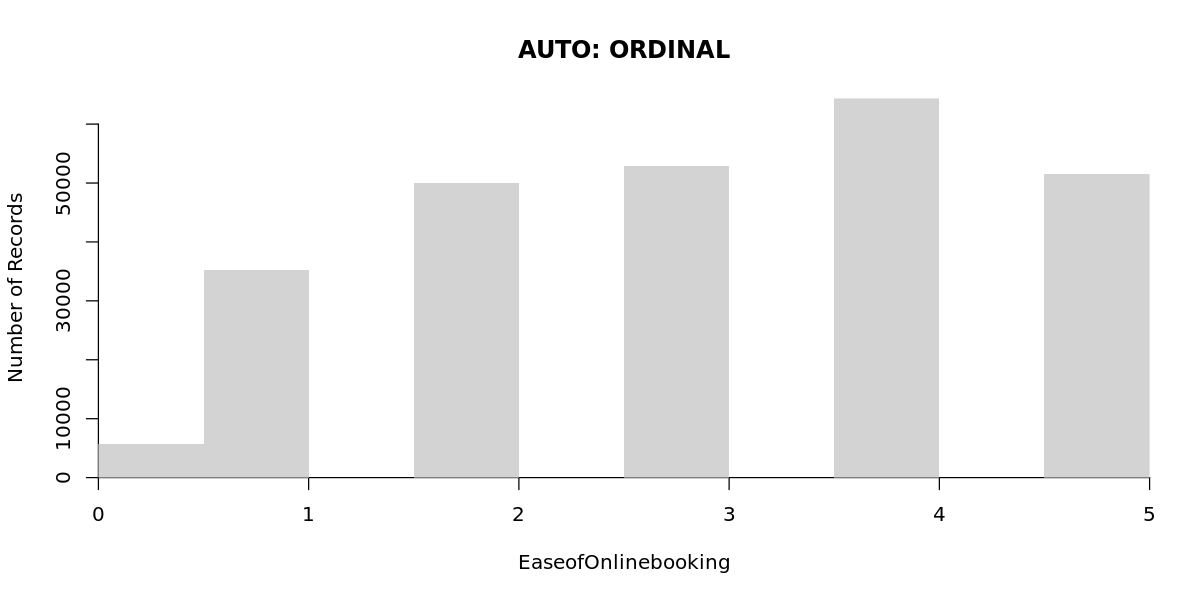

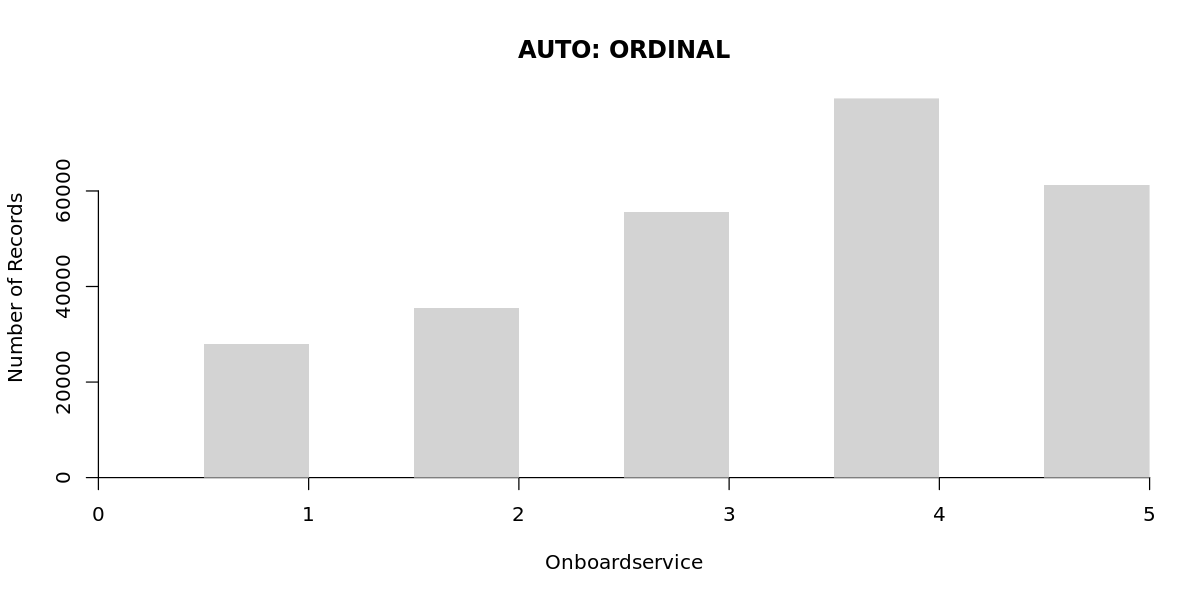

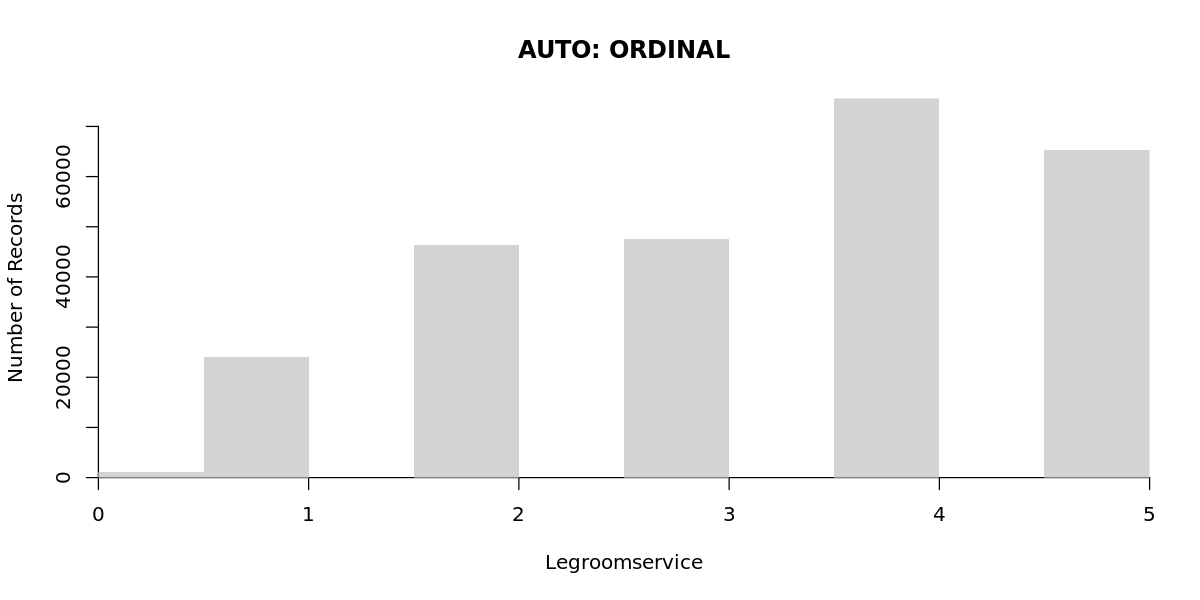

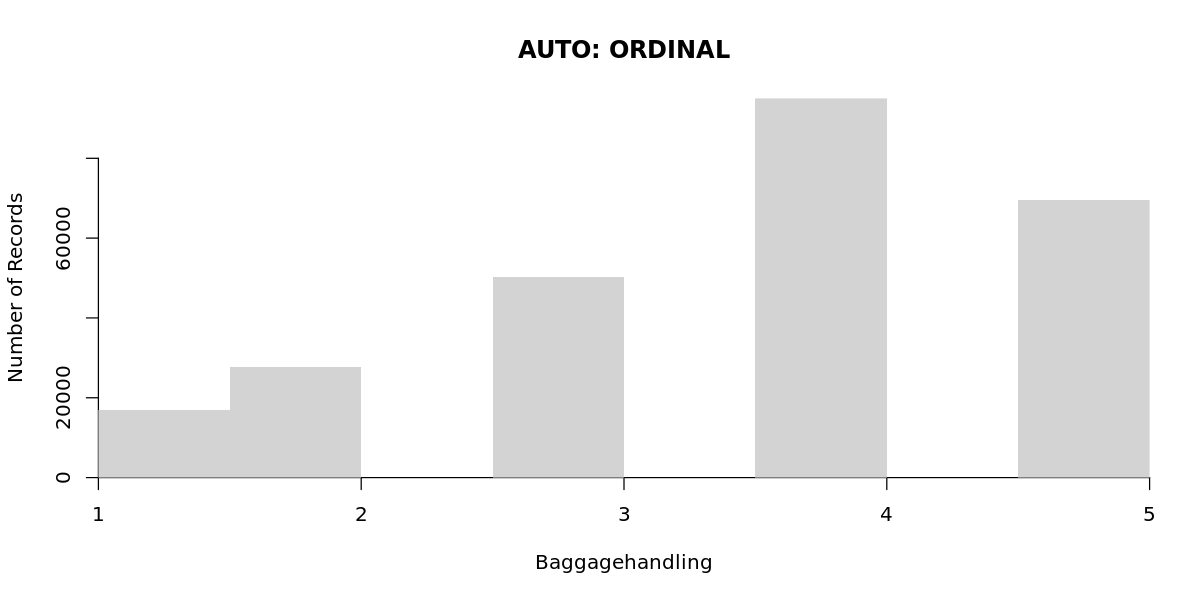

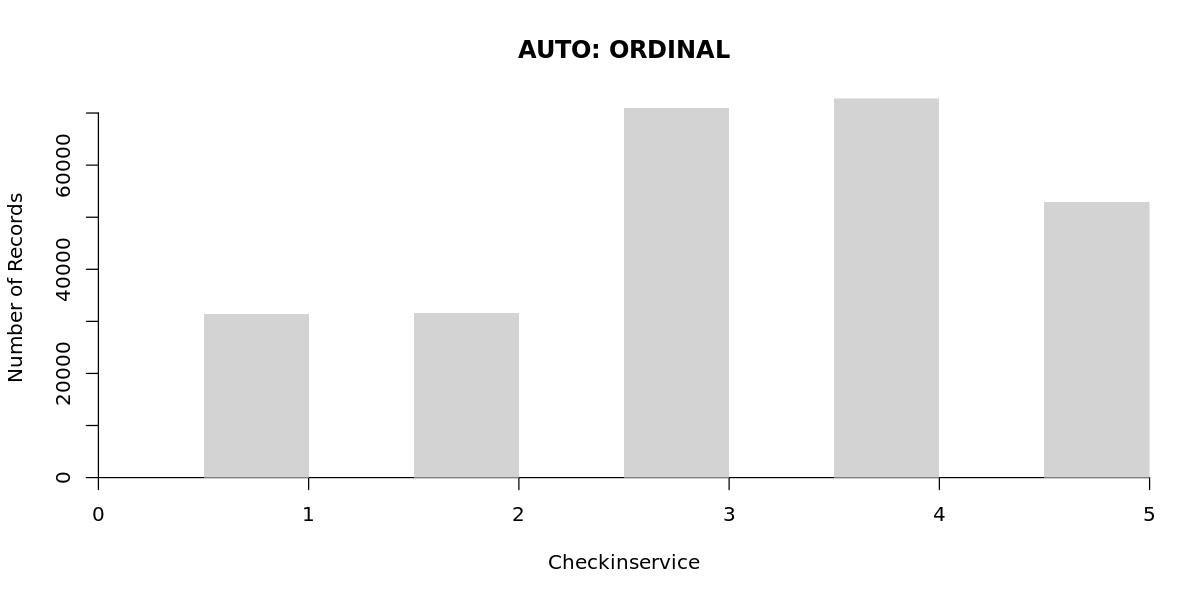

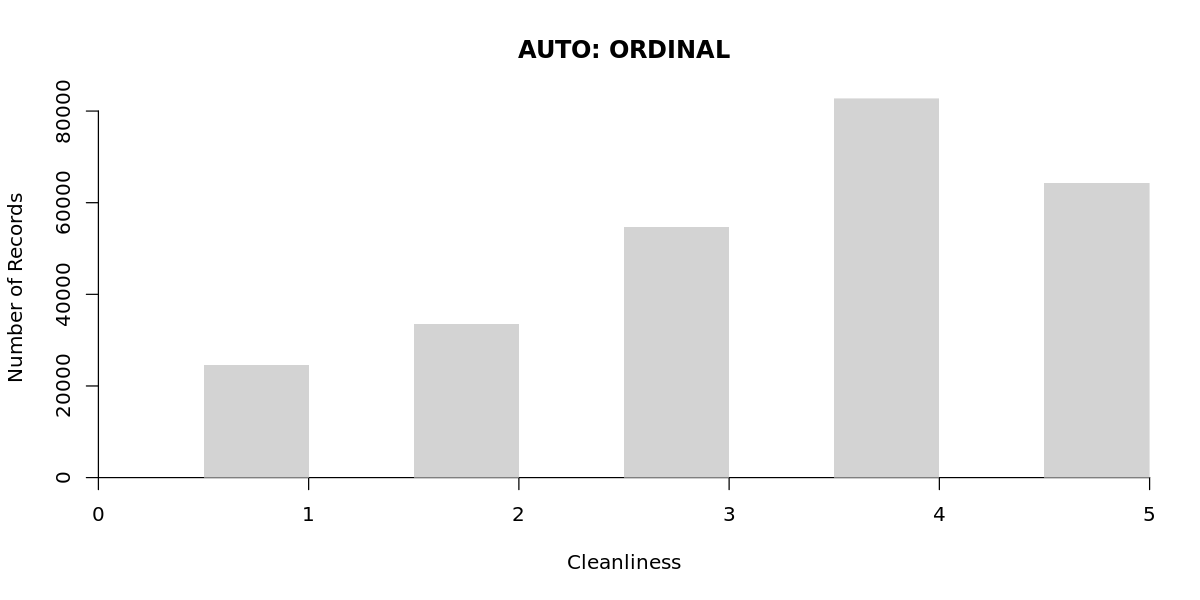

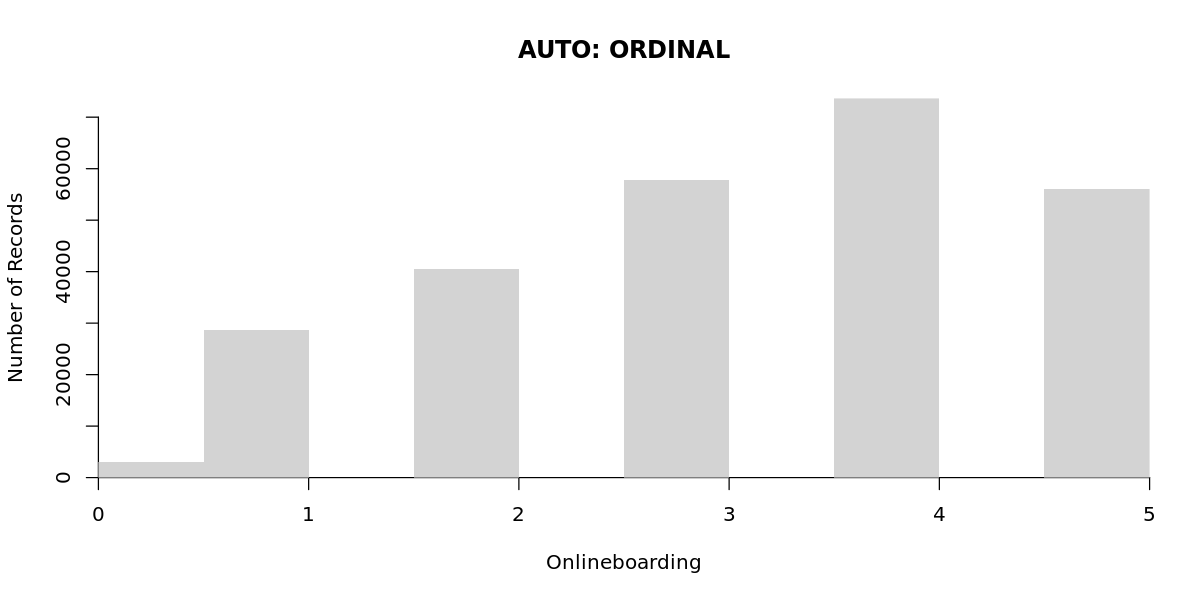

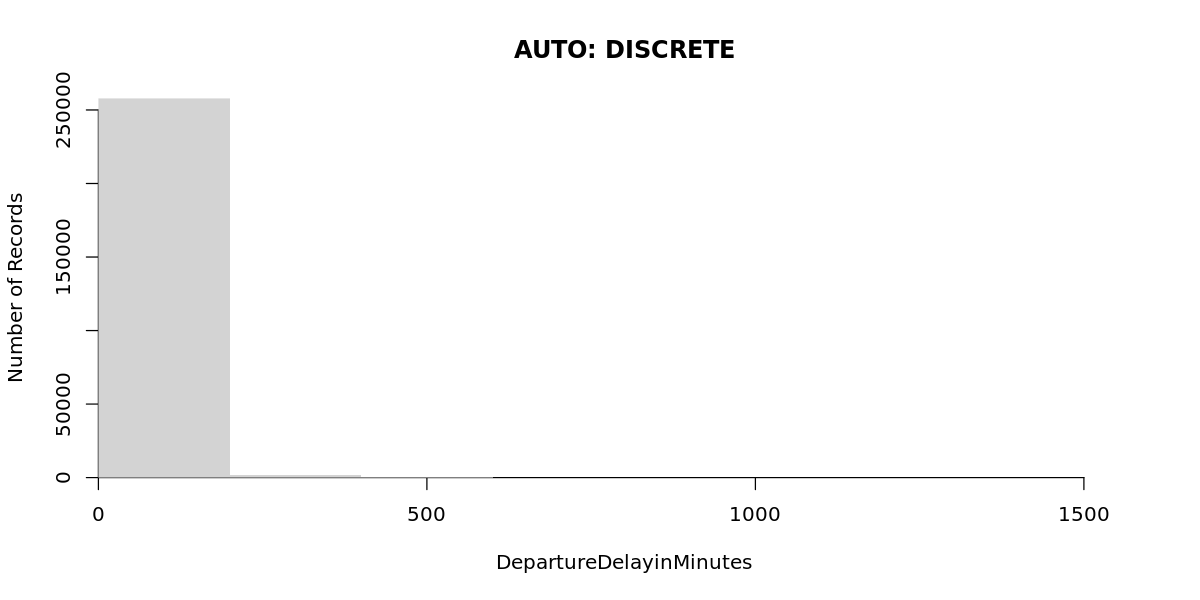

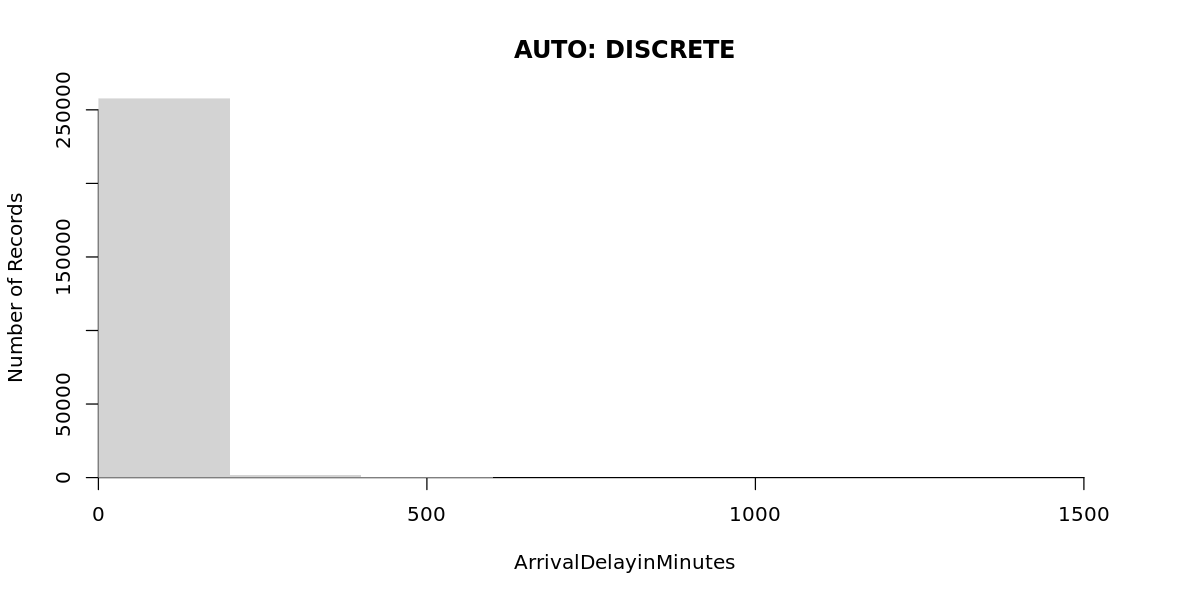

In [39]:
# Number of empty bins to determine discrete
DISCRETE_BINS = 5
field_types_ord_dis<-NPREPROCESSING_discreteNumeric(dataset=dataset,field_types=field_types, cutoff=DISCRETE_BINS)

In [40]:
is_sat<-  ifelse(names(dataset)%in%sat_cols , "SAT", "NOTSAT")
is_time <- ifelse(names(dataset)%in%time_field,"TIME", "NOTTIME")
is_dis <- ifelse(names(dataset)%in%distance_field,'DIS','NOTDIS')
types_table<-data.frame(field=names(dataset),
                        initial=field_types,
                        types=field_types_ord_dis, 
                        is_sat=is_sat,
                        is_time=is_time,
                        is_dis = is_dis)
print(formattable::formattable(types_table))

types_table

field                          initial  types    is_sat is_time is_dis
1  satisfactionv2                 SYMBOLIC SYMBOLIC NOTSAT NOTTIME NOTDIS
2  Gender                         SYMBOLIC SYMBOLIC NOTSAT NOTTIME NOTDIS
3  CustomerType                   SYMBOLIC SYMBOLIC NOTSAT NOTTIME NOTDIS
4  Age                            NUMERIC  ORDINAL  NOTSAT NOTTIME NOTDIS
5  TypeofTravel                   SYMBOLIC SYMBOLIC NOTSAT NOTTIME NOTDIS
6  Class                          SYMBOLIC SYMBOLIC NOTSAT NOTTIME NOTDIS
7  FlightDistance                 NUMERIC  DISCRETE NOTSAT NOTTIME DIS   
8  Seatcomfort                    NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
9  DepartureArrivaltimeconvenient NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
10 Foodanddrink                   NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
11 Gatelocation                   NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
12 Inflightwifiservice            NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
13 Inflightentertainment          NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
14 EaseofOnlinebooking            NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
15 Onboardservice                 NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
16 Legroomservice                 NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
17 Baggagehandling                NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
18 Checkinservice                 NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
19 Cleanliness                    NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
20 Onlineboarding                 NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
21 DepartureDelayinMinutes        NUMERIC  DISCRETE NOTSAT TIME    NOTDIS
22 ArrivalDelayinMinutes          NUMERIC  DISCRETE NOTSAT TIME    NOTDIS

## Remove outlier in ordinals fields

The next step before starting a preprocessing a dataset is removing an outlier from  ordinals fields and replace it with mean of each fields

[1] "Outlier field= Age Records= 12 Replaced with MEAN"


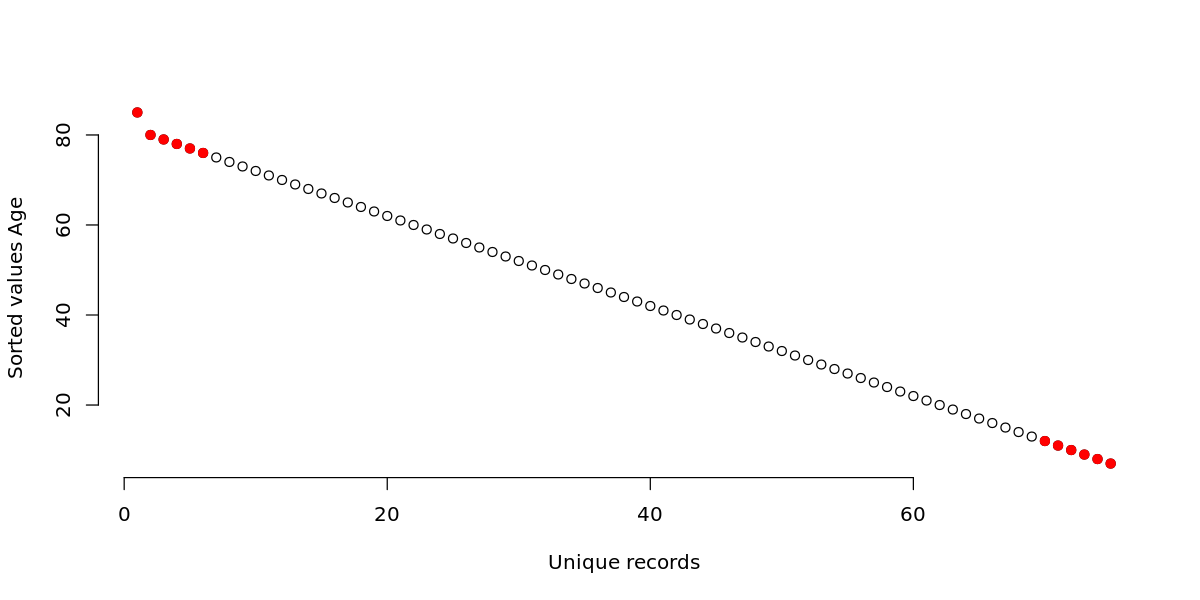

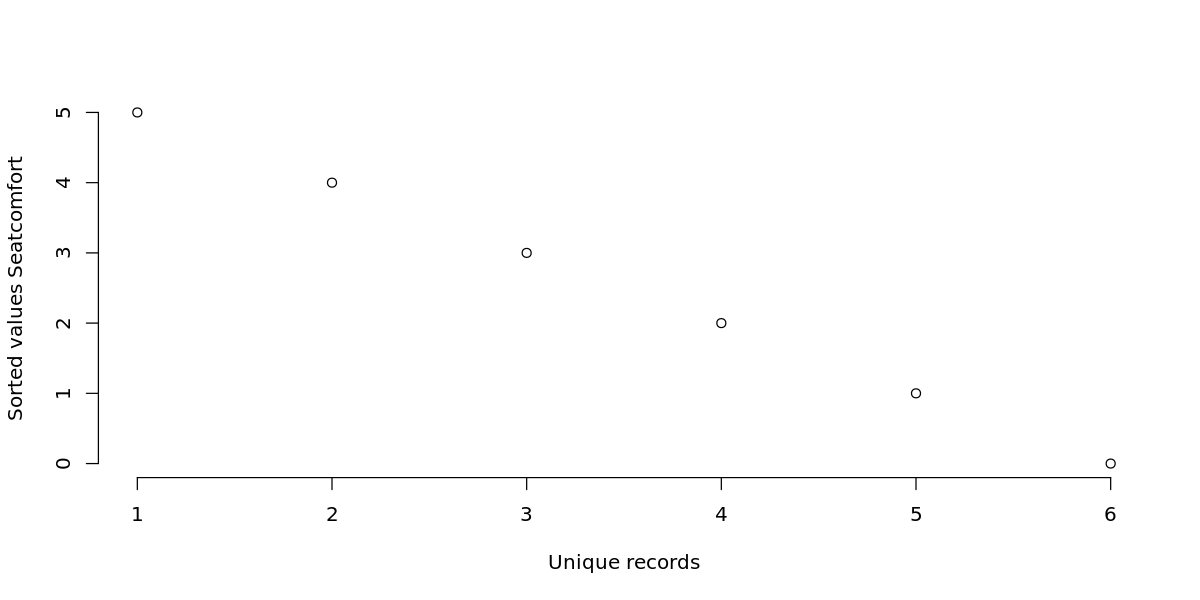

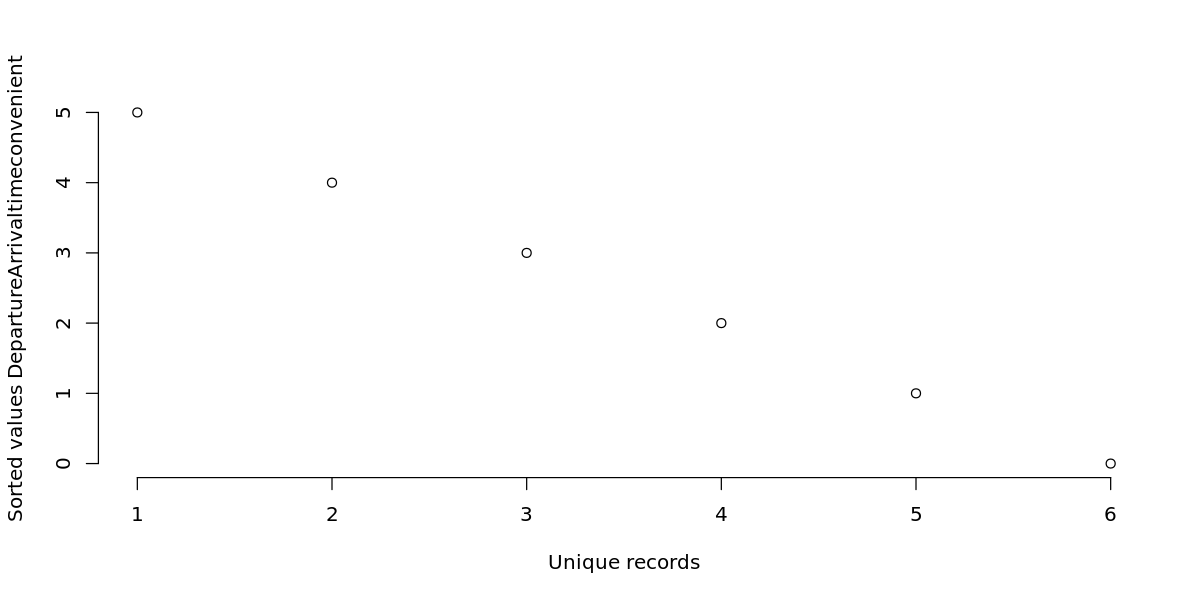

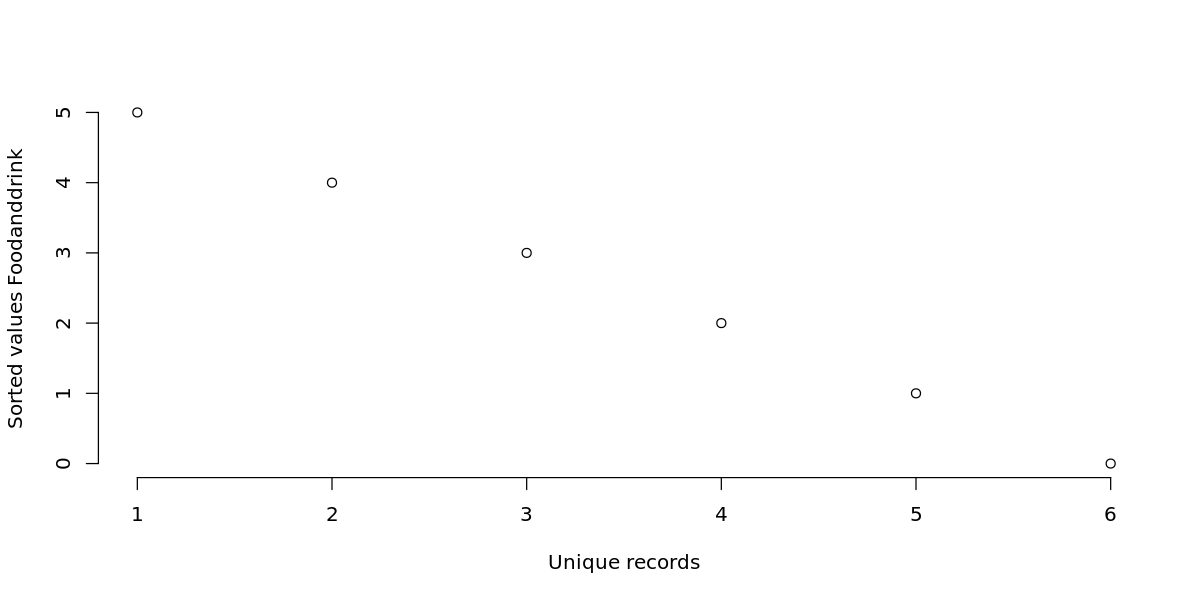

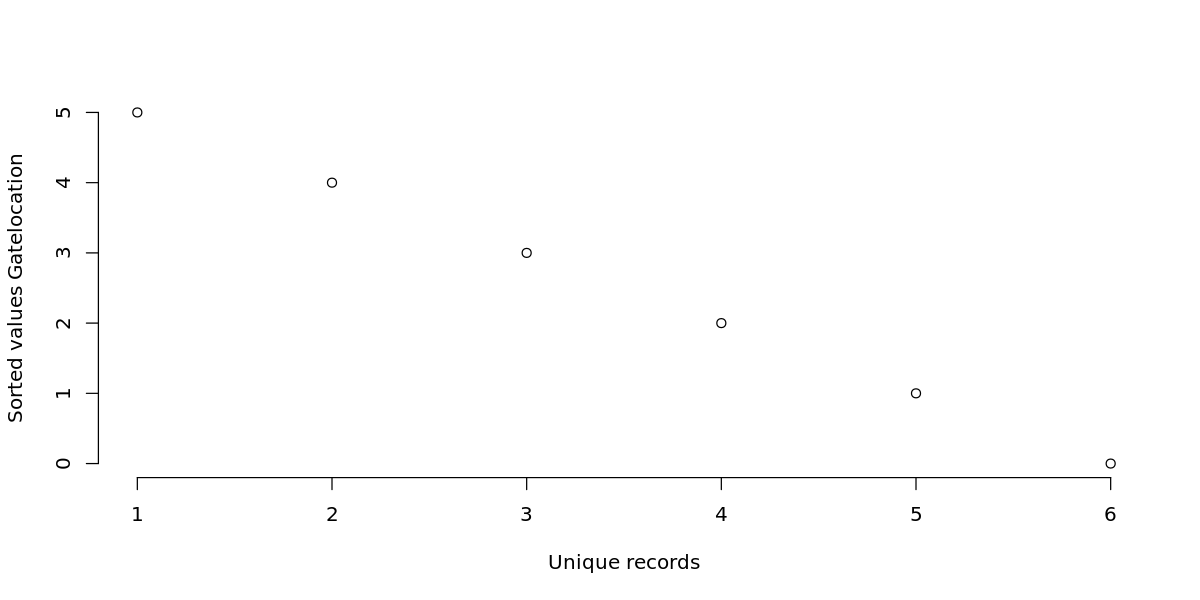

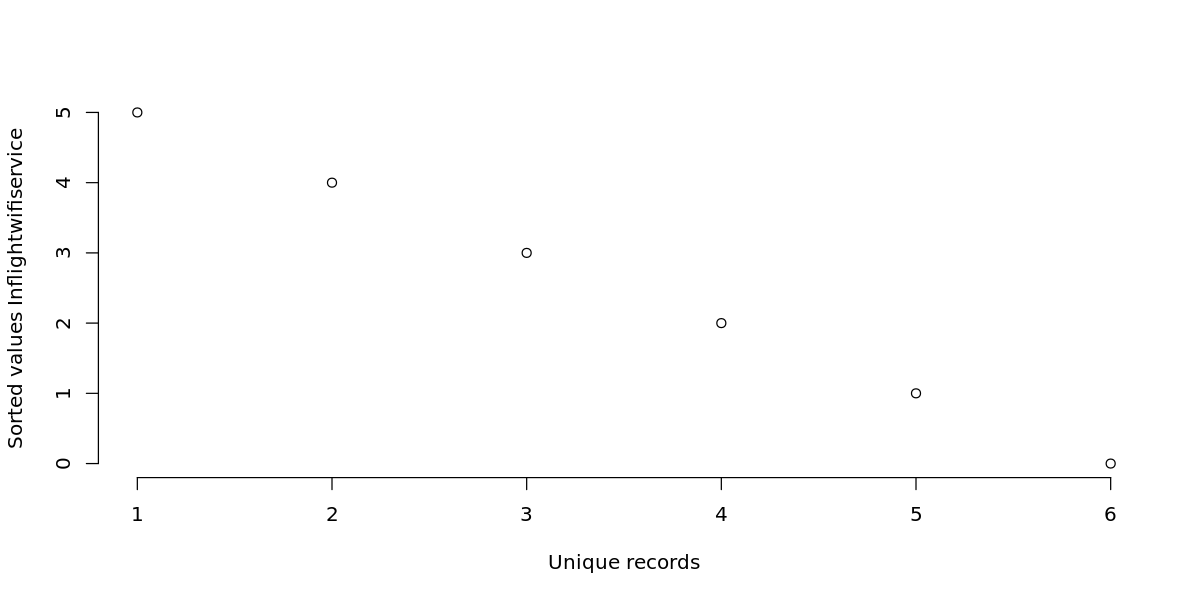

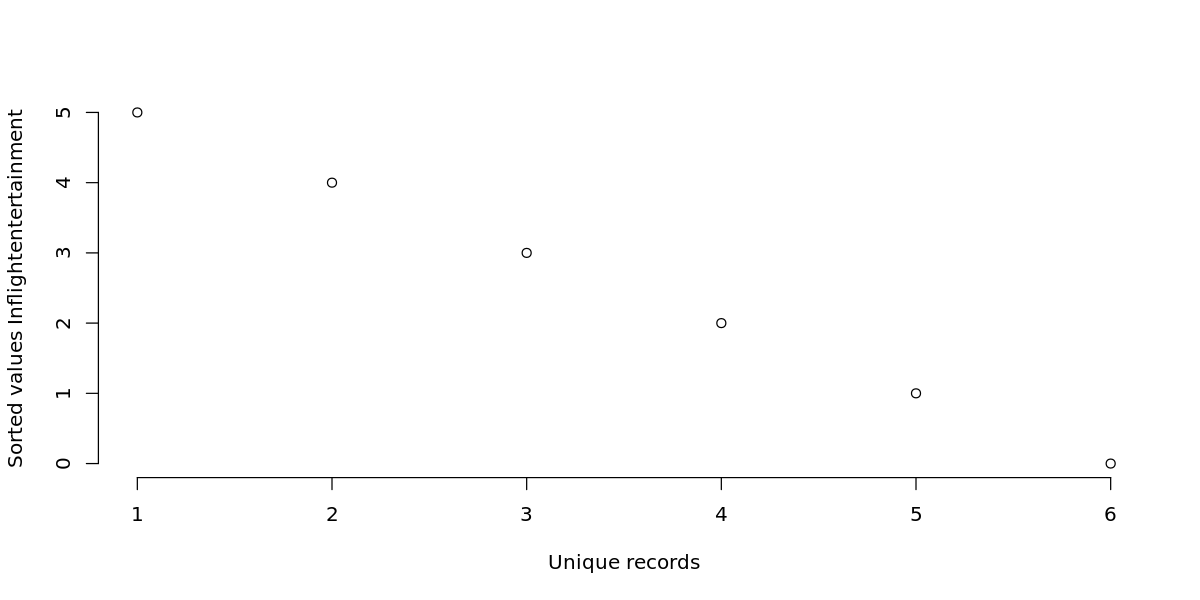

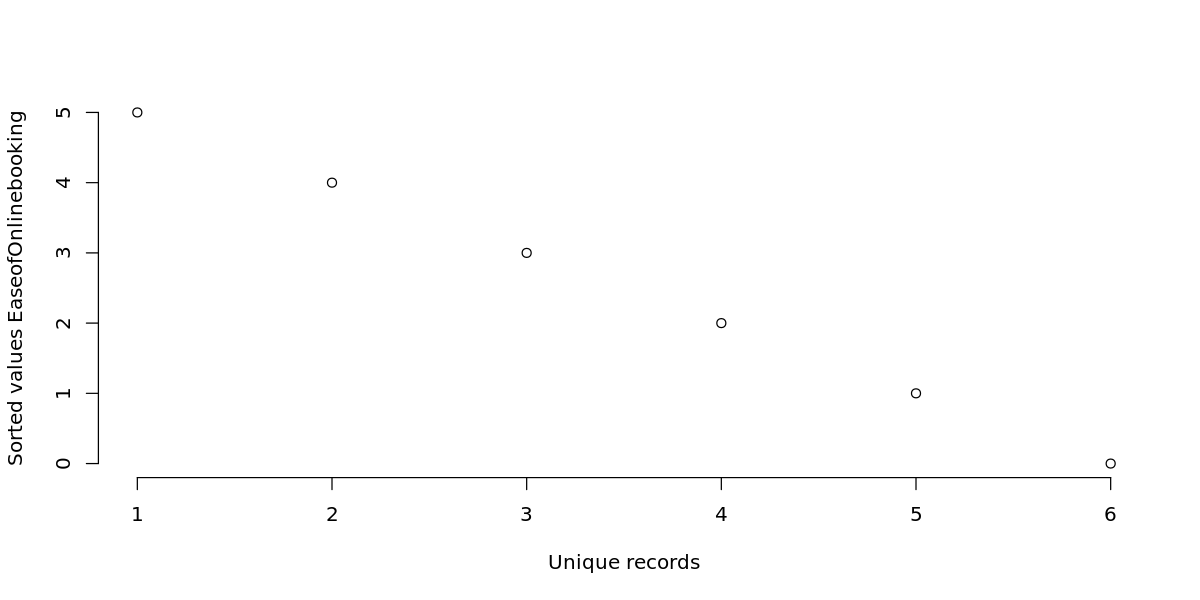

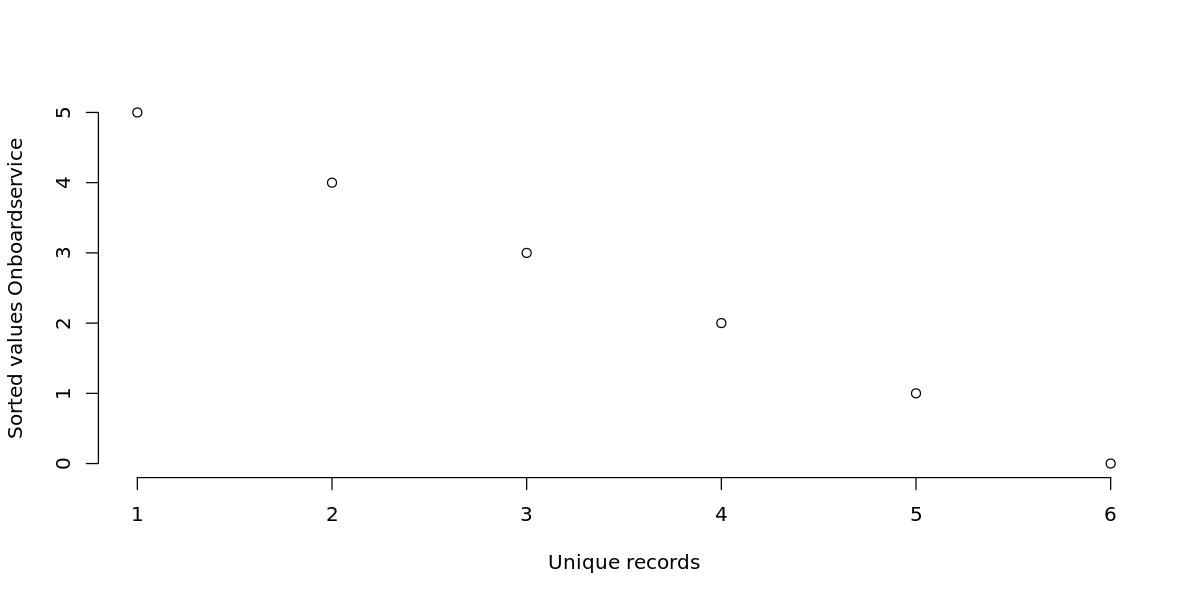

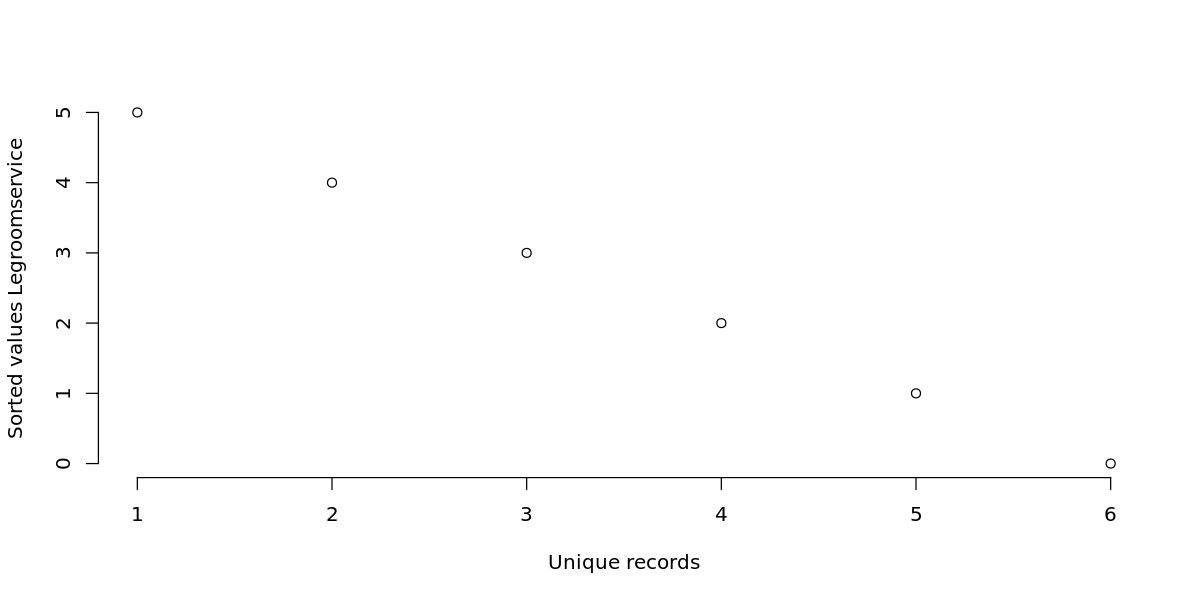

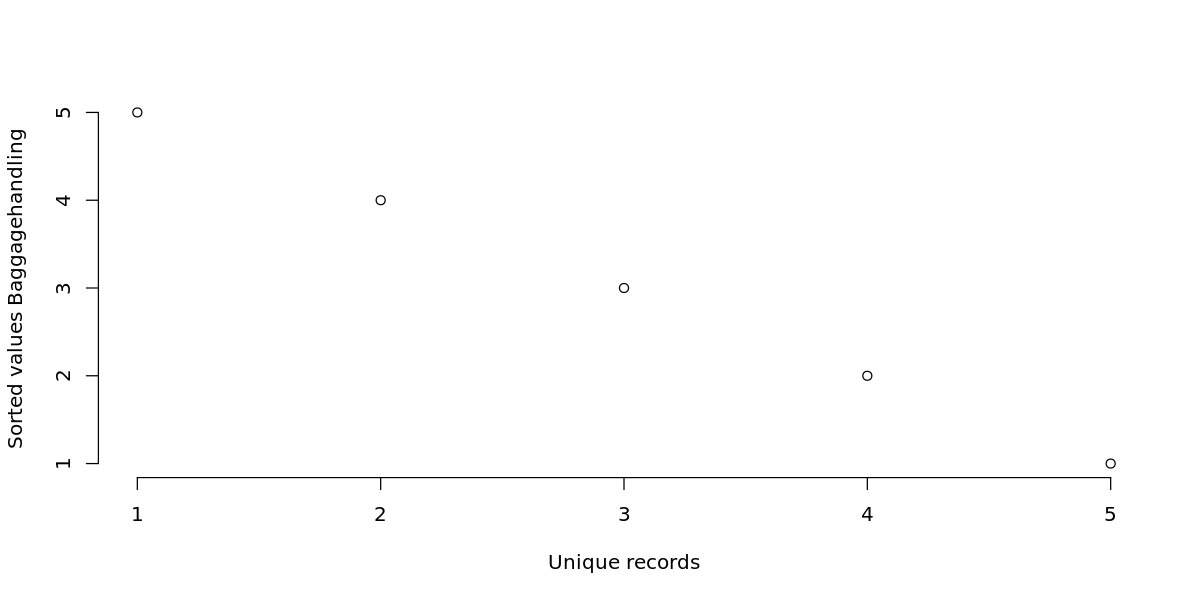

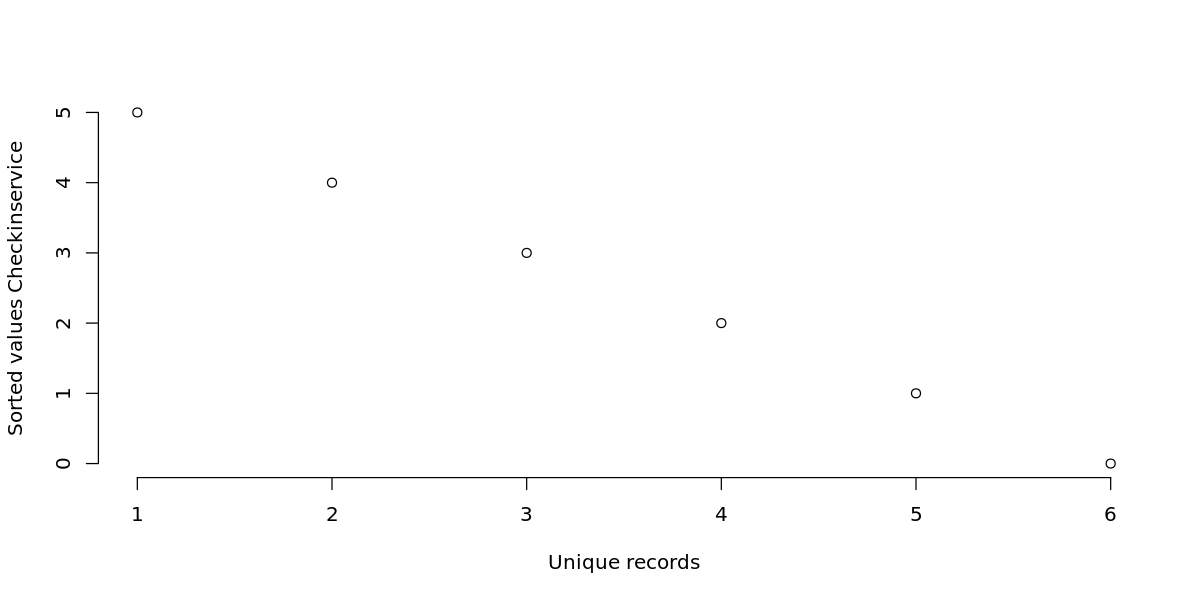

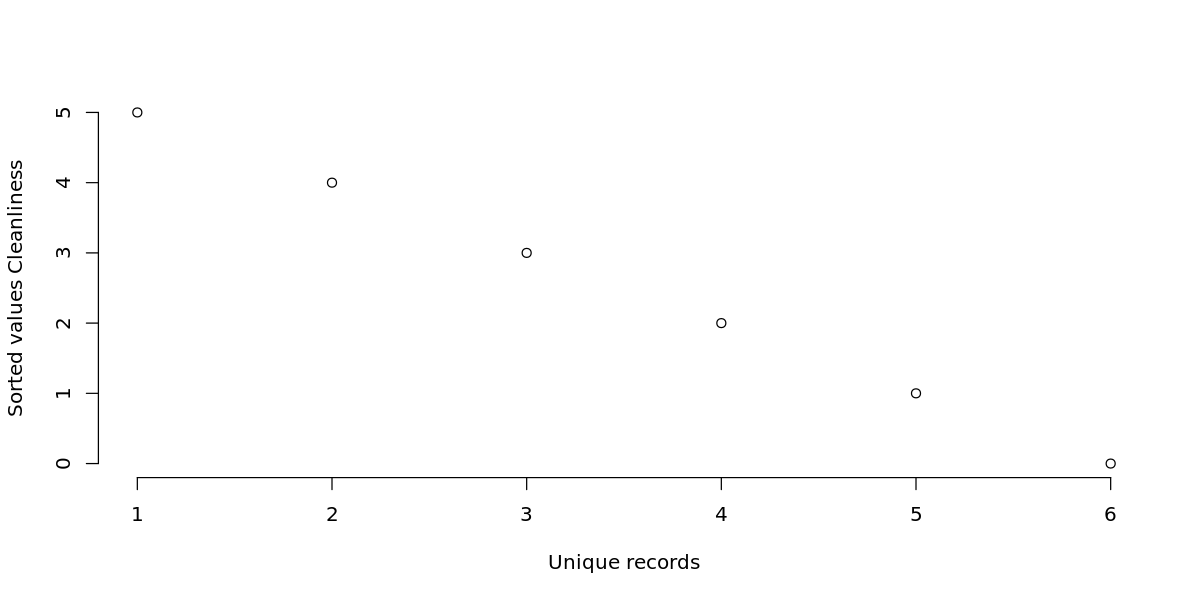

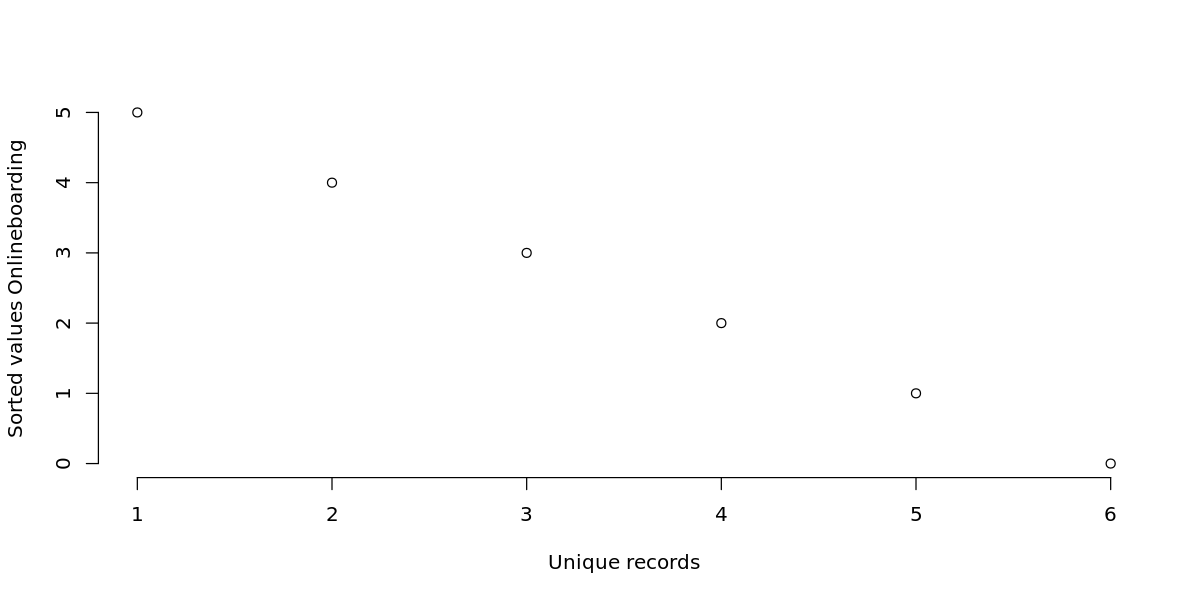

In [41]:
OUTLIER_CONF = 0.85
# get a dataframe contains only ordinals fields
ordinals<-dataset[,which(field_types_ord_dis=='ORDINAL')]
# remove outlier and replace it with means value
ordinals<-NPREPROCESSING_outlier(ordinals=ordinals,confidence=OUTLIER_CONF)

In [42]:
# replace an old ordinal field with new ordinal value after remove outlier
dataset[,names(ordinals)]<-ordinals

In [43]:
# function 

## Preprocess ordinals values


### Satisfaction fields


##### Normalization (satisfaction fields) : $ Xnormalize = \frac{X}{5}$

For ordinal fields which contains a rating of a passenger satisfaction, these field will be normalize by value of 5 which is the different between maximum rating (5) and minimum rating(0). Instead of normalize by a maximum and minimum value in each colums since some fill its does not contains a minimum rating but we want to normalize in a same scale for all the field containing rating information. The range of the value after normalize will be in a range of 0.0 to 1.0. 

### Others Ordinal fields

##### Normalization (satisfaction fields) :  $ Xnormalize = \frac{X-X\min}{X\max -X\min} $

For others ordinal fields, each colums will be normalize by substract the value with the minimum vaue and divide by the different between maximum and minimum values. The range of the value after normalize will be in a range of 0.0 to 1.0. 

In [44]:
# call function Preprocess ordinal which will normalize a value according to type of its fields
processed_ordinal<-Preprocess_ordinal(dataset,types_table)
head(processed_ordinal)

Age       Seatcomfort DepartureArrivaltimeconvenient Foodanddrink
[1,] 0.7945205 0           0                              0           
[2,] 0.5479452 0           0                              0           
[3,] 0.1095890 0           0                              0           
[4,] 0.7260274 0           0                              0           
[5,] 0.8630137 0           0                              0           
[6,] 0.3150685 0           0                              0           
     Gatelocation Inflightwifiservice Inflightentertainment EaseofOnlinebooking
[1,] 0.4          0.4                 0.8                   0.6                
[2,] 0.6          0.0                 0.4                   0.6                
[3,] 0.6          0.4                 0.0                   0.4                
[4,] 0.6          0.6                 0.8                   0.2                
[5,] 0.6          0.8                 0.6                   0.4                
[6,] 0.6          0.4                 0.0                   0.4                
     Onboardservice Legroomservice Baggagehandling Checkinservice Cleanliness
[1,] 0.6            0.0            0.6             1.0            0.6        
[2,] 0.8            0.8            0.8             0.4            0.6        
[3,] 0.6            0.6            0.8             0.8            0.8        
[4,] 0.2            0.0            0.2             0.8            0.2        
[5,] 0.4            0.0            0.4             0.8            0.4        
[6,] 1.0            0.8            1.0             1.0            0.8        
     Onlineboarding
[1,] 0.4           
[2,] 0.4           
[3,] 0.4           
[4,] 0.6           
[5,] 1.0           
[6,] 0.4

## Preprocess Categorical (Symbolic and Discrete values)

For preprocessing a Symbolic and Discrete values, symbolic values will be transform from symbolic value to on hot encoding directly. And for discrete values, it will be convert to a symbolic values first then transform those value to a form of on hot encoding. 

### Convert Discrete values to symbolic 

The fields ***('DepatureDelayinMinutes'), ('ArrivalDelayinMinutes') and ('FlightDistance')*** are discrete fields that need to be convert to symbolic value before tranforming it to one hot encoding.


For ***('DepatureDelayinMinutes') and  ('ArrivalDelayinMinutes')*** fields, we convert a delay to 4 symbolic values

- Value 0 for a delay time equal to 0 minutes or no delay
- Value 1 for a delay time from 1 to 29 minutes
- Value 2 for a delay time from 30 to 59 minutes
- Value 3 for a delay time from 60 minutes above

For ***('Flightdistance')*** fiedls, according to information from commercial flight duration. The distance of a flight are classified into three categories.




In [45]:
# get symbolic and discrete data 
categor_data<-dataset[,symbolic_index]
time_data<-dataset[,time_field]
distance_data<-dataset[,distance_field]

# convert a discrete value to symbolic values
time_data<-Process_timeDelay(time_data)


# combine symbolic data with converted discrete data
categor_data<-cbind(categor_data,time_data)
#categor_data<-cbind(categor_data,distance_data)
head(categor_data)

satisfactionv2 Gender CustomerType   TypeofTravel    Class   
1 satisfied      Female Loyal Customer Personal Travel Eco     
2 satisfied      Male   Loyal Customer Personal Travel Business
3 satisfied      Female Loyal Customer Personal Travel Eco     
4 satisfied      Female Loyal Customer Personal Travel Eco     
5 satisfied      Female Loyal Customer Personal Travel Eco     
6 satisfied      Male   Loyal Customer Personal Travel Eco     
  DepartureDelayinMinutes ArrivalDelayinMinutes
1 0                       0                    
2 3                       3                    
3 0                       0                    
4 0                       0                    
5 0                       0                    
6 0                       0

After converted a discrete value to symbolic value then combine the data together in a same dataframe.

### Transform both symbolic and discrete data to one hot encoding

Then we transform a dataframe containing both symbolic and discrete into a form of one hot encoding.

In [46]:

processed_catdata<-Preprocess_categorical(categor_data)
head(processed_catdata)

satisfactionv2 Gender CustomerType TypeofTravel ClassBusiness ClassEco
1 0              1      0            0            0             1       
2 0              0      0            0            1             0       
3 0              1      0            0            0             1       
4 0              1      0            0            0             1       
5 0              1      0            0            0             1       
6 0              0      0            0            0             1       
  ClassEco.Plus DepartureDelayinMinutes0 DepartureDelayinMinutes1
1 0             1                        0                       
2 0             0                        0                       
3 0             1                        0                       
4 0             1                        0                       
5 0             1                        0                       
6 0             1                        0                       
  DepartureDelayinMinutes2 DepartureDelayinMinutes3 ArrivalDelayinMinutes0
1 0                        0                        1                     
2 0                        1                        0                     
3 0                        0                        1                     
4 0                        0                        1                     
5 0                        0                        1                     
6 0                        0                        1                     
  ArrivalDelayinMinutes1 ArrivalDelayinMinutes2 ArrivalDelayinMinutes3
1 0                      0                      0                     
2 0                      0                      1                     
3 0                      0                      0                     
4 0                      0                      0                     
5 0                      0                      0                     
6 0                      0                      0

In [47]:
a <-dataset[, grepl(distance_field, names(dataset)), drop = FALSE]

In [48]:
s<-summary(a)

### Combine processed Ordinal data and Categorical

After finsinih preprocess all the fields in dataset, all the processed dataset is ready for merging into one dataframe

In [49]:
processed_data<-cbind(processed_catdata, processed_ordinal)
#processed_data<-cbind(processed_data,time_data)

In [50]:
# Convert label 0 to 1 and vice versa for satisfation label to represent 1 for statisfy  and 0 for not 
processed_data$satisfactionv2 <- ifelse(as.numeric(processed_data$satisfactionv2)==0,1,0)
head(processed_data)

satisfactionv2 Gender CustomerType TypeofTravel ClassBusiness ClassEco
1 1              1      0            0            0             1       
2 1              0      0            0            1             0       
3 1              1      0            0            0             1       
4 1              1      0            0            0             1       
5 1              1      0            0            0             1       
6 1              0      0            0            0             1       
  ClassEco.Plus DepartureDelayinMinutes0 DepartureDelayinMinutes1
1 0             1                        0                       
2 0             0                        0                       
3 0             1                        0                       
4 0             1                        0                       
5 0             1                        0                       
6 0             1                        0                       
  DepartureDelayinMinutes2 ⋯ Gatelocation Inflightwifiservice
1 0                        ⋯ 0.4          0.4                
2 0                        ⋯ 0.6          0.0                
3 0                        ⋯ 0.6          0.4                
4 0                        ⋯ 0.6          0.6                
5 0                        ⋯ 0.6          0.8                
6 0                        ⋯ 0.6          0.4                
  Inflightentertainment EaseofOnlinebooking Onboardservice Legroomservice
1 0.8                   0.6                 0.6            0.0           
2 0.4                   0.6                 0.8            0.8           
3 0.0                   0.4                 0.6            0.6           
4 0.8                   0.2                 0.2            0.0           
5 0.6                   0.4                 0.4            0.0           
6 0.0                   0.4                 1.0            0.8           
  Baggagehandling Checkinservice Cleanliness Onlineboarding
1 0.6             1.0            0.6         0.4           
2 0.8             0.4            0.6         0.4           
3 0.8             0.8            0.8         0.4           
4 0.2             0.8            0.2         0.6           
5 0.4             0.8            0.4         1.0           
6 1.0             1.0            0.8         0.4

### Removing Reduntant fields

After merging a dataset, we shall check a redundant value in a dataset and remove it. Since 

In [51]:
# # ************************************************
# # Q14: Are any of the fields redundant?
# nrow_before<-paste('Number of rows before removing redundant : ', nrow(processed_data))

# processed_data<-NPREPROCESSING_redundantFields(dataset=processed_data,cutoff=OUTLIER_CONF)
# nrow_after<-paste('Number of rows after removing redundant : ' , nrow(processed_data))


# print(nrow_before)
# print(nrow_after)

In [52]:
head(processed_data)



satisfactionv2 Gender CustomerType TypeofTravel ClassBusiness ClassEco
1 1              1      0            0            0             1       
2 1              0      0            0            1             0       
3 1              1      0            0            0             1       
4 1              1      0            0            0             1       
5 1              1      0            0            0             1       
6 1              0      0            0            0             1       
  ClassEco.Plus DepartureDelayinMinutes0 DepartureDelayinMinutes1
1 0             1                        0                       
2 0             0                        0                       
3 0             1                        0                       
4 0             1                        0                       
5 0             1                        0                       
6 0             1                        0                       
  DepartureDelayinMinutes2 ⋯ Gatelocation Inflightwifiservice
1 0                        ⋯ 0.4          0.4                
2 0                        ⋯ 0.6          0.0                
3 0                        ⋯ 0.6          0.4                
4 0                        ⋯ 0.6          0.6                
5 0                        ⋯ 0.6          0.8                
6 0                        ⋯ 0.6          0.4                
  Inflightentertainment EaseofOnlinebooking Onboardservice Legroomservice
1 0.8                   0.6                 0.6            0.0           
2 0.4                   0.6                 0.8            0.8           
3 0.0                   0.4                 0.6            0.6           
4 0.8                   0.2                 0.2            0.0           
5 0.6                   0.4                 0.4            0.0           
6 0.0                   0.4                 1.0            0.8           
  Baggagehandling Checkinservice Cleanliness Onlineboarding
1 0.6             1.0            0.6         0.4           
2 0.8             0.4            0.6         0.4           
3 0.8             0.8            0.8         0.4           
4 0.2             0.8            0.2         0.6           
5 0.4             0.8            0.4         1.0           
6 1.0             1.0            0.8         0.4

In [53]:
rm(list=setdiff(ls(), c("processed_data","combined")))
ls()

[1] "combined"       "processed_data"

In [54]:

allResults<-data.frame()

# Models and Evaluation

## Models
For a machine learning that we are going to use are 

### Supervised Learning
- ***Binomial Logistic Regression***
- ***Decison Tree***
- ***Random Forest Classifier***
- ***Support Vector Machine ( Radial kernel )*** 
- ***K-nearest neighbour***

### Unsupervised Leanring 

- ***K-means Clustering***

## Data 

The data was spilt in two ways.

- 

## Evaluations Metrics

Since this task are classification problems, we are going these following as our evaluation metrics and graph to the performance of a classification model 

- ***Accuracy***
    - To measure which model can identify the realationship and correlation in each fields in dataset.
- ***Loss*** (Binary Cross Entrophy)
    - The value indicating a the quality of a model prediction.
- ***Precsion and Recall*** (which derived from True Positive,False Positive, True Negative, and False Negative)
    - The number measure the quality of a prediction
- ***F1-score*** 
    - It is a combination of precison and recall into singel values, whihc use for comparing a performance of different classifiers.
- ***Sensitivity (true positive rate)***
    - It also knowns as True positive rate, it is used for measuring the percentage of labels predict to be postive which is correctly identify.
- ***Specificity (true negative rate)*** 
    - It also knowns as True negative rate, it is used fro measuring the percentage of labels predict to be negative which is correctly identify.
- ***ROC Curve (receiver operating characteristic curve)*** 
    - It is a graph showing a classification performance of a model at various threshold to visualize a tradeoff of sensitivity and specificity.
- ***AUC (area under the curve)***
    - It is an entire area under the ROC curve which use to measure a an ability of a model to distinguish between each class
    



### Logistic Regression

For logistic Regression is a linear classifier which is suited our task classify between ***satisfied*** and ***neutral or dissatisfied*** airline passenger. The outputs of logistic regression is a probabilities between 0.0 to 1.0 for predict whether a passenger is satisfy with an airline service or not. After that determined a threshold to turn propability into predicting classes. 

#### Data

The dataset is split into 2 sets which are training set(70%) and testing set(30%)

In [55]:
# Load utilities function for logistic regression

source('utils.R')
options(repr.plot.width = 10, repr.plot.height = 10)

myModelFormula<-function(dataset,fieldNameOutput){
     
  inputs<-paste(names(dataset)[which(names(dataset)!=fieldNameOutput)],collapse = "+")

  output<-paste(fieldNameOutput,"~")

  formular=as.formula(paste(output,inputs))

  return(formular)

} 

LogisticRegressionModel<-function(training_data,testing_data,plot=TRUE,output="satisfactionv2"){

formular<-myModelFormula(training_data,output)
# print("********Formula for Logistic Refression**********")
# print(formular)
# print("*************************************************")

# Logsitic Regression Model
logisticModel<-stats::glm(formular,data=training_data,family=quasibinomial)

    
    
y_train<-training_data[,OUTPUT_FIELD]


# Predict an satisfaction field for testing data (output is probabilites 0-1)
y_pred<- predict(logisticModel,testing_data,type="response")

gt<-testing_data[,OUTPUT_FIELD]

    
title<-'Logistic Regression'

results<-NdetermineThreshold(test_expected=gt,
                                test_predicted=y_pred,
                                plot=plot,
                                title=title)
#results<-eval_model(y_pred,gt,0.60)


    
    
return(list("model" = logisticModel,
       "result" = results)
           )
}

#Selecet Field for Logistic regression

OUTPUT_FIELD = "satisfactionv2"

select_field<-c('satisfactionv2',
               'Gender',
                'CustomerType',
                'TypeofTravel',
                'ClassBusiness',
                'ClassEco',
                'ClassEco.Plus',
                'DepartureDelayinMinutes0',
                'DepartureDelayinMinutes1',
                'DepartureDelayinMinutes2',
                'DepartureDelayinMinutes3',
                'ArrivalDelayinMinutes0',
                'ArrivalDelayinMinutes1',
                'ArrivalDelayinMinutes2',
                'ArrivalDelayinMinutes3',
                'Age',
                'Seatcomfort',
                'DepartureArrivaltimeconvenient',
                'Foodanddrink',
                'Gatelocation',
                'Inflightwifiservice',
                'Inflightentertainment',
               'EaseofOnlinebooking',
                 'Onboardservice',
                 'Legroomservice',
                 'Baggagehandling',
                 'Checkinservice',
                 'Cleanliness',
               'Onlineboarding'
               )

print("Select Fields")
 print((select_field))


selected_data<-processed_data[,select_field]

selected_data<-selected_data[sample(nrow(selected_data)),]
training_records<-round(nrow(selected_data)*(70/100))
training_data <- selected_data[1:training_records,]
testing_data <- selected_data[-(1:training_records),]

print(paste("Number of Training",nrow(training_data)))
print(paste("Number of Testing",nrow(testing_data)))

[1] "Select Fields"
 [1] "satisfactionv2"                 "Gender"                        
 [3] "CustomerType"                   "TypeofTravel"                  
 [5] "ClassBusiness"                  "ClassEco"                      
 [7] "ClassEco.Plus"                  "DepartureDelayinMinutes0"      
 [9] "DepartureDelayinMinutes1"       "DepartureDelayinMinutes2"      
[11] "DepartureDelayinMinutes3"       "ArrivalDelayinMinutes0"        
[13] "ArrivalDelayinMinutes1"         "ArrivalDelayinMinutes2"        
[15] "ArrivalDelayinMinutes3"         "Age"                           
[17] "Seatcomfort"                    "DepartureArrivaltimeconvenient"
[19] "Foodanddrink"                   "Gatelocation"                  
[21] "Inflightwifiservice"            "Inflightentertainment"         
[23] "EaseofOnlinebooking"            "Onboardservice"                
[25] "Legroomservice"                 "Baggagehandling"               
[27] "Checkinservice"                 "Cleanliness"      

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


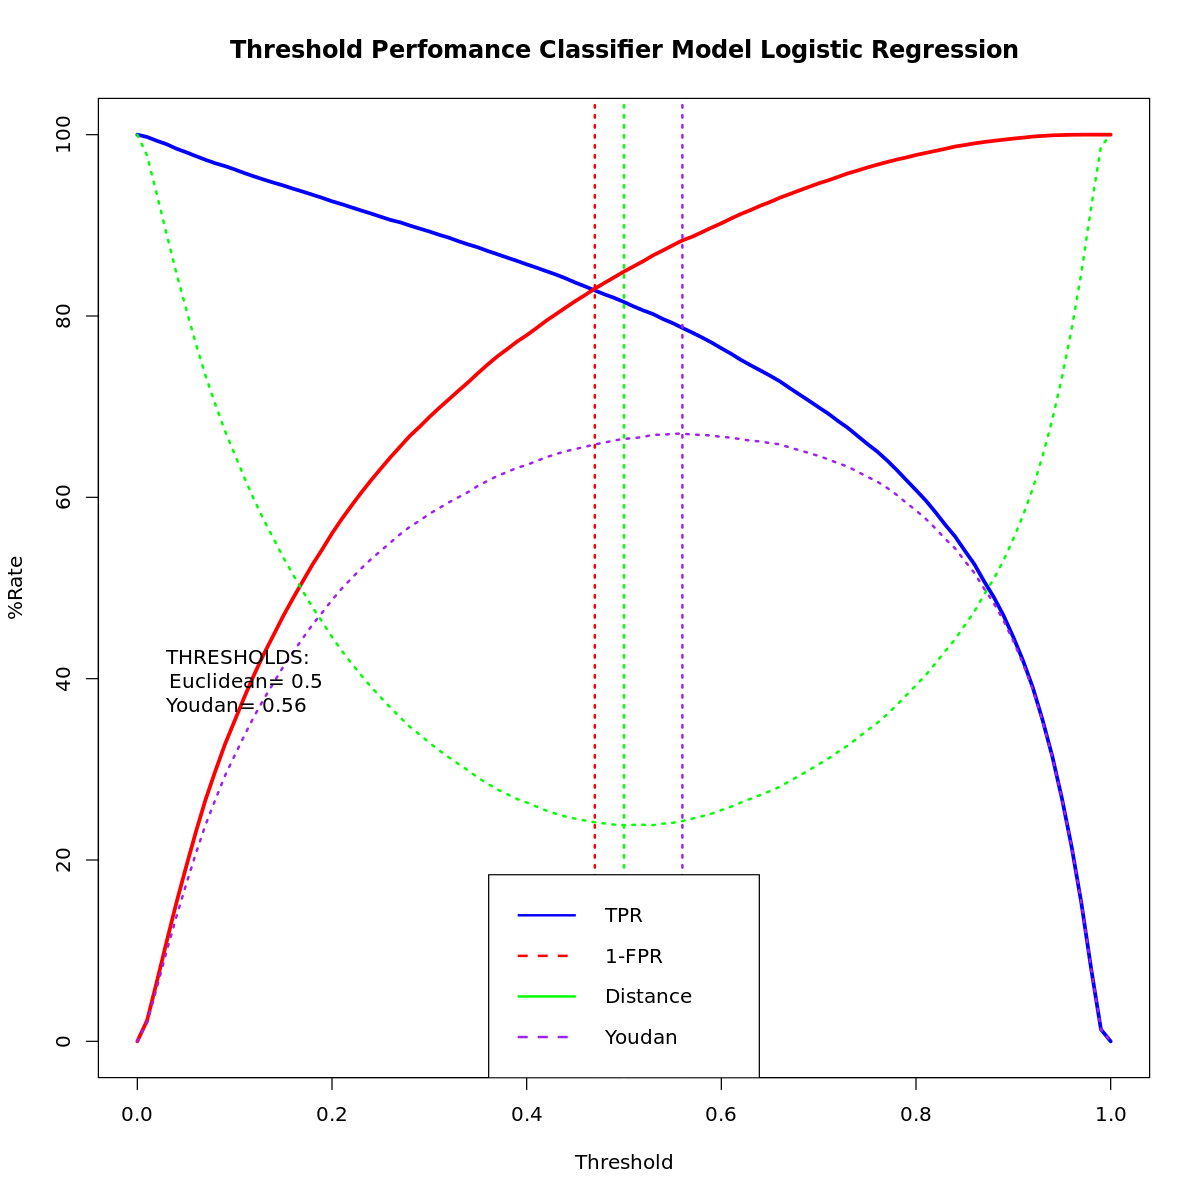

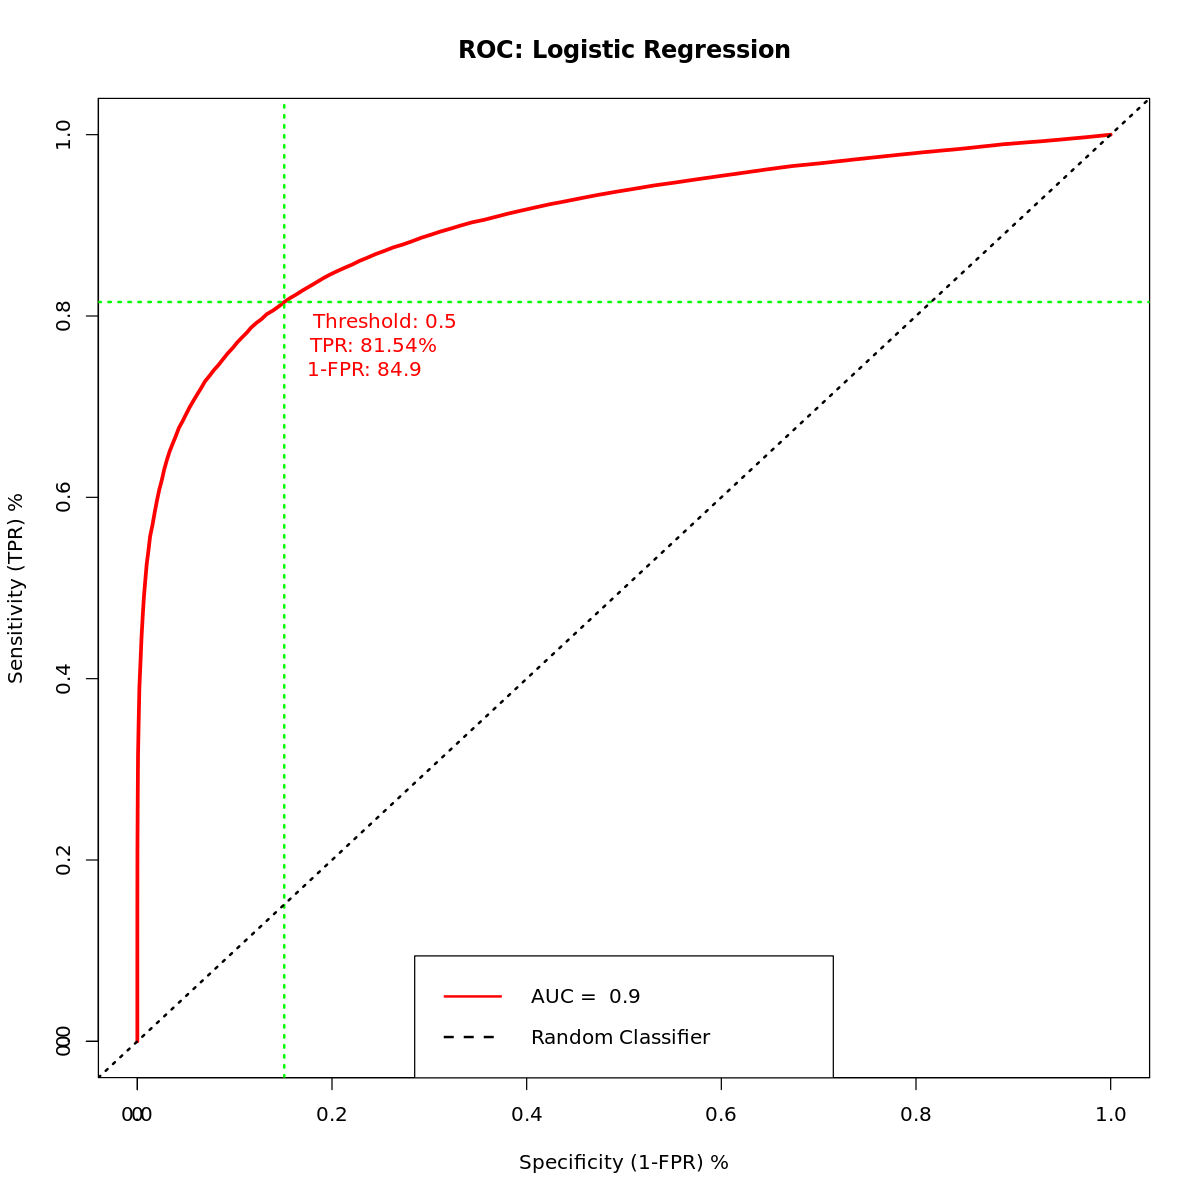

In [56]:
Lgm<-LogisticRegressionModel(training_data,testing_data,plot=TRUE,OUTPUT_FIELD)
result<-Lgm$result

### Visualize Threshold performance plot and ROC curve

#### Threshold performance plot 
The best threshold for a model is detemined from a performance plot to get the maximum of correct prediction after converting a probablitlies to a labels of classes

#### ROC curve
The Roc curve show a performance of a classifer with a area under a curve of value 0.9 on a test dataset


### Logistic Curve 

This show that the suitable threshold is between 0.49-0.51 since the data points represent a satisfied passenger( blue point) seem to be moslty fit on a curve above 0.5 on a Y axis which represent propability. Where on the other hand for neutral or dissatisfied passenger (red point) are more likey to locate below a propabilites of 0.5

[1] "Logistic Plot"


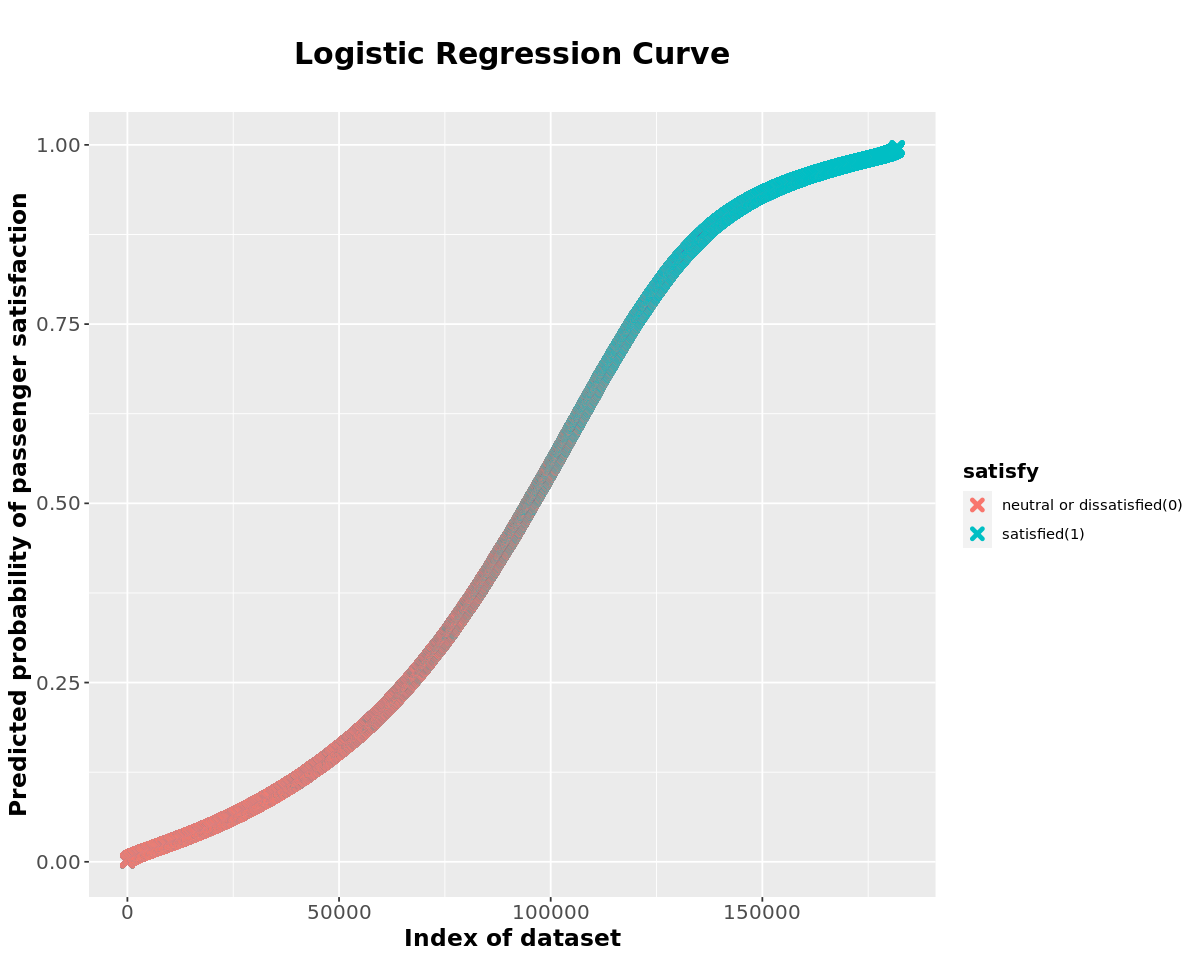

In [57]:
options(repr.plot.width = 10, repr.plot.height = 8)
y_train<-training_data[,OUTPUT_FIELD]
LogisticCurve_plot(Lgm$model,y_train)


In [58]:
df <-unlist(result[-which(names(result) %in%c("pred_labels","gt","proba"))])
#allResults<-
allResults<-data.frame(LogisticRegression=unlist(df))
allResults

LogisticRegression
TP        3.110200e+04      
FN        7.040000e+03      
FP        6.006000e+03      
TN        3.378000e+04      
F1        8.266312e+01      
acc       8.325891e+01      
pgood     8.381481e+01      
pbad      8.275355e+01      
FPR       1.509576e+01      
TPR       8.154266e+01      
TNR       8.490424e+01      
MCC       6.650760e-01      
threshold 5.000000e-01      
AUC       9.039995e-01

### Confusion matrix 

Confusion shows a number of corret prediction ***(True positive for predicting a passenger who is satisfied correctly and True Negative for predict neutral or dissatisfactied correctly)*** and wrong prediction ***( False Positive for predicting passenger that neutral or dissatisfied to be satisfeid and False negative for predicting neutral or dissatisfied as satisfied)***

[1] "ACCURACY :  83.2589056565034 , PRECISION:  83.8148108224642 , RECALL:  81.5426563892822 , AUC :  0.903999540863319 F1 score: 82.663122923588 Loss : 0.390205502321398 Threshold : 0.5"


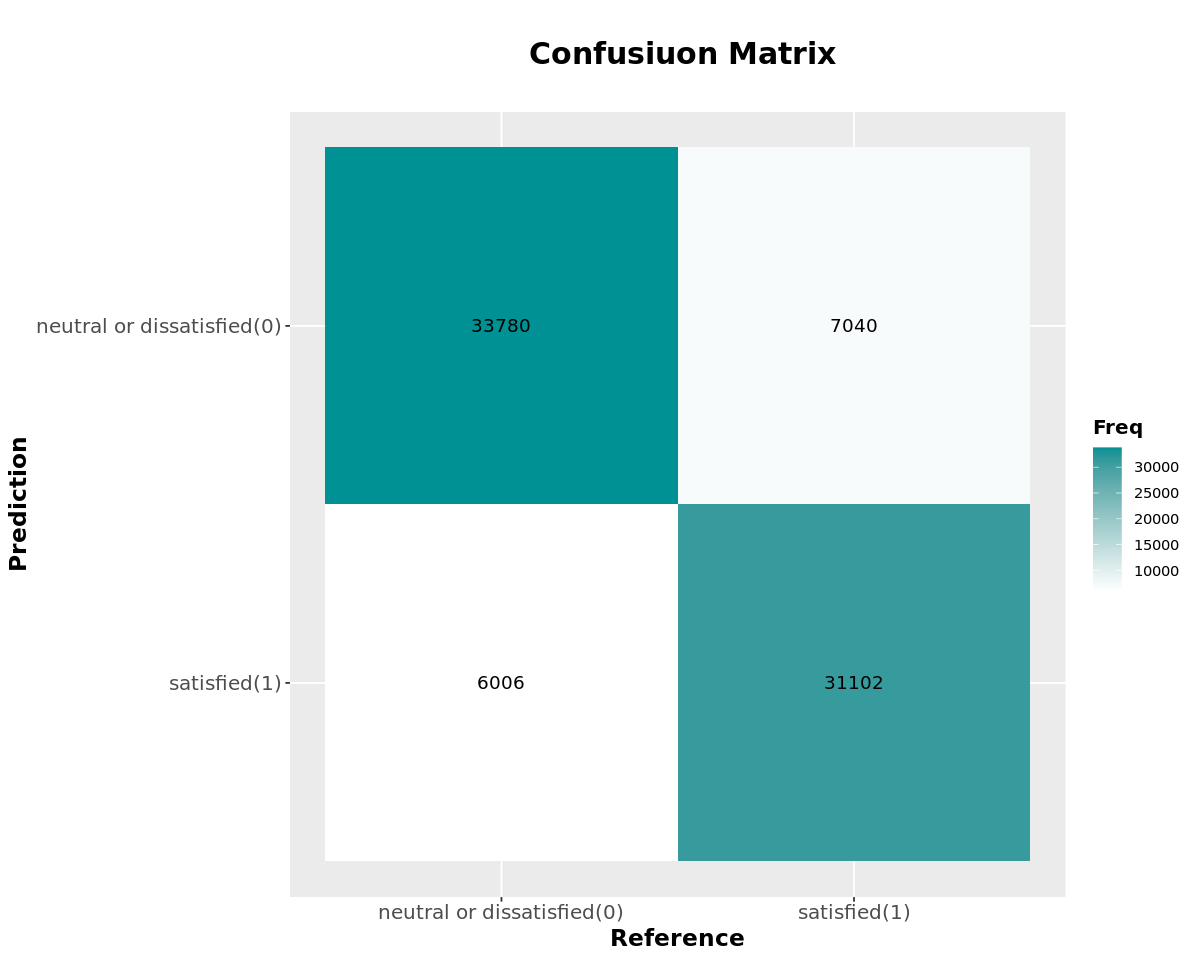

In [59]:
ConfusionMatrix_plot(result$gt,result$pred_labels)
accuracy<-result$acc
precision<-result$pgood
recall<-result$TPR
auc <- result$AUC
f1_score <- F1_score(precision,recall)
loss <- BCE_loss(result$gt,result$proba) 
threshold<- result$threshold
print(paste("ACCURACY : ", accuracy,
            ", PRECISION: ", precision,
            ", RECALL: ", recall, 
            ", AUC : ",auc,
            "F1 score:", f1_score,
            "Loss :", loss,
            "Threshold :", threshold))

The result from Confusion matrix show us that logistic regression show that this model can distinguish between  

### Visualize a coefficient of Logistic Regression

By visualize a value of coefficent or a weight using a bar chart, we can understand which fields of data have an impact on a model for prediciting which passenger is ***satisfied*** and ***neutral or dissatisfied*** 

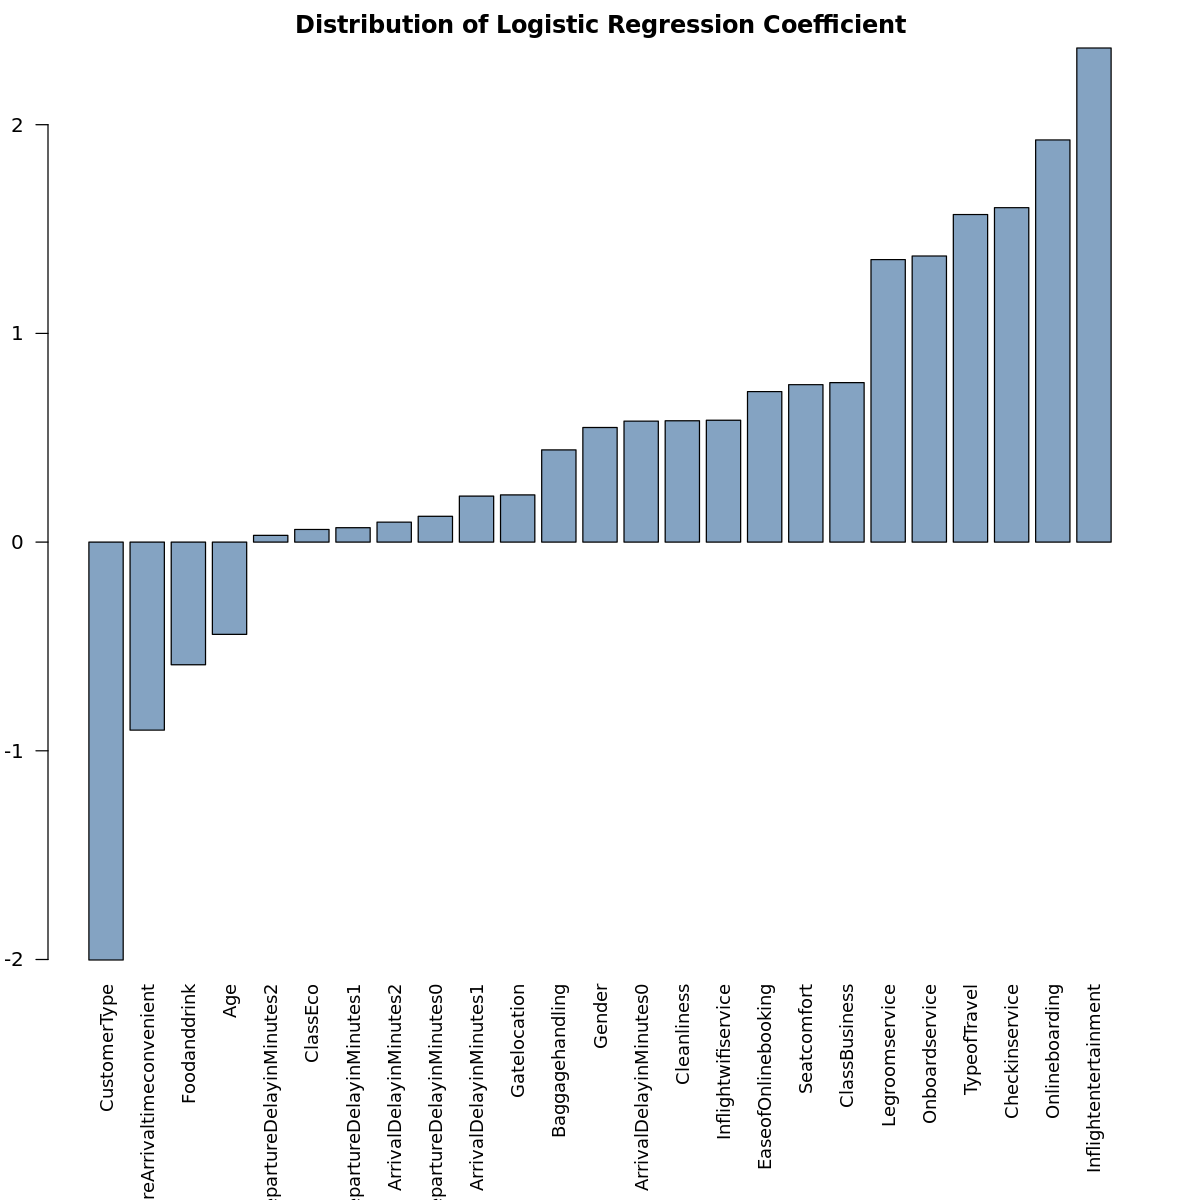

In [60]:
LogisticCoeff_plot(Lgm$model)

The bar chart show that the field with coeffient with neagtive value such as  ***('CustomerType'),('DepatureArrivalTimeconvient'),('Food and Drink') and ('Age')*** have an impact on a model for predicting a customer who is neural or dissatisfied.


And for a field which have clearly an impact on predicting a satisfied passnger are ***('Inflightentertainment'),('Onlineboarding'),('Checkinservice'),('TypeofTravel'),('Onboardservice') and ('legroomservice')*** which have a high value of positive coefficeint. For other fields that have positive value of coefficents such as ("Gatelocation"),("Baggagehandling") and ("Gender") have a very less impact on a model prediction which can be remove to reduce the complexity of a data feeding to a model which is called Dimisionality reduciton.


### K-FOLD Cross validation on Logistic regression

To prevent an overfitting during a training, a team decide to experiment a model training wiht K-fold cross validation to ensure the generalization of a model.

In [61]:
# K-FOLD
KFOLDS          <- 10  # Number of folded experiments
dataset<-stratifiedDataset(processed_data)
measures<-runExperiment(dataset = dataset,FUN = LogisticRegressionModel)

[1] "FOLD : , 1"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 2"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 3"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 4"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 5"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 6"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 7"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 8"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 9"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 10"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


In [62]:
# Display a result of a model using K-fold crossvalidation
print("Result of each Fold")
data.frame(fold=(t(measures$allresults)))
print("Average result of each Fold")
t(measures$means)

[1] "Result of each Fold"


fold.1       fold.2       fold.3       fold.4       fold.5      
TP        1.028300e+04 1.030400e+04 1.024400e+04 1.038200e+04 1.041000e+04
FN        2.469000e+03 2.448000e+03 2.508000e+03 2.370000e+03 2.342000e+03
FP        1.800000e+03 1.866000e+03 1.819000e+03 2.006000e+03 2.012000e+03
TN        1.142500e+04 1.135900e+04 1.140600e+04 1.121900e+04 1.121300e+04
F1        8.281055e+01 8.268999e+01 8.256297e+01 8.259348e+01 8.270438e+01
acc       8.356623e+01 8.339300e+01 8.334296e+01 8.315433e+01 8.323902e+01
pgood     8.510304e+01 8.466721e+01 8.492083e+01 8.380691e+01 8.380293e+01
pbad      8.222974e+01 8.226986e+01 8.197499e+01 8.255942e+01 8.272224e+01
FPR       1.361059e+01 1.410964e+01 1.375425e+01 1.516824e+01 1.521361e+01
TPR       8.063833e+01 8.080301e+01 8.033250e+01 8.141468e+01 8.163425e+01
TNR       8.638941e+01 8.589036e+01 8.624575e+01 8.483176e+01 8.478639e+01
MCC       6.718009e-01 6.681511e-01 6.673684e-01 6.630636e-01 6.647289e-01
threshold 5.200000e-01 5.100000e-01 5.200000e-01 5.000000e-01 5.000000e-01
AUC       9.046121e-01 9.015070e-01 9.035017e-01 9.018259e-01 9.043820e-01
          fold.6       fold.7       fold.8       fold.9       fold.10     
TP        1.047400e+04 1.024100e+04 1.037700e+04 1.042800e+04 1.015900e+04
FN        2.277000e+03 2.510000e+03 2.374000e+03 2.323000e+03 2.592000e+03
FP        2.087000e+03 1.837000e+03 1.925000e+03 2.070000e+03 1.686000e+03
TN        1.113700e+04 1.138700e+04 1.129900e+04 1.115400e+04 1.153800e+04
F1        8.275917e+01 8.249225e+01 8.284038e+01 8.260129e+01 8.260693e+01
acc       8.319923e+01 8.326468e+01 8.344947e+01 8.308758e+01 8.353032e+01
pgood     8.338508e+01 8.479053e+01 8.435214e+01 8.343735e+01 8.576615e+01
pbad      8.302520e+01 8.193855e+01 8.263731e+01 8.276323e+01 8.165605e+01
FPR       1.578191e+01 1.389141e+01 1.455687e+01 1.565336e+01 1.274955e+01
TPR       8.214258e+01 8.031527e+01 8.138185e+01 8.178182e+01 7.967218e+01
TNR       8.421809e+01 8.610859e+01 8.544313e+01 8.434664e+01 8.725045e+01
MCC       6.638547e-01 6.657629e-01 6.690717e-01 6.616451e-01 6.717195e-01
threshold 4.900000e-01 5.200000e-01 5.000000e-01 4.900000e-01 5.400000e-01
AUC       9.041997e-01 9.021031e-01 9.044408e-01 9.031438e-01 9.032673e-01

[1] "Average result of each Fold"


TP    FN   FP   TN    F1    acc   pgood pbad  FPR   TPR   TNR   MCC 
[1,] 10330 2421 1910 11313 82.67 83.32 84.4  82.38 14.45 81.01 85.55 0.67
     threshold AUC
[1,] 0.51      0.9

After the training is done, we can visualize at the result of each fold during training. We can see that after applying ***K-fold cross validation***, The number of ***True positive, False positive, True negative and False Negative*** is small than a number in a result of model without ***K-fold cross validation**. This is because when the K-Fold is apply, it divide a dataset smaller number of group depending on the value of K. Hence the number of testing set use for evaluating a result get split into a smaller number of dataset.

But for other metrics such as ***F1 score, Accuracy and Area Under the curve(AUC)*** is very close to the result from model without ***K-Fold***. As a conclusion applying ***K-fold cross-validation*** to logistic regression on passenger statisfaction dataset doesn not result in huge different but it does ensure that the model that trained does generalized well.


In [63]:
# Create a data frame to compare results from different experiments
allResults<-cbind(allResults,data.frame(Logistic_with_Kfold=unlist(measures$means)))
allResults

LogisticRegression Logistic_with_Kfold
TP        3.110200e+04       10330.00           
FN        7.040000e+03        2421.00           
FP        6.006000e+03        1910.00           
TN        3.378000e+04       11313.00           
F1        8.266312e+01          82.67           
acc       8.325891e+01          83.32           
pgood     8.381481e+01          84.40           
pbad      8.275355e+01          82.38           
FPR       1.509576e+01          14.45           
TPR       8.154266e+01          81.01           
TNR       8.490424e+01          85.55           
MCC       6.650760e-01           0.67           
threshold 5.000000e-01           0.51           
AUC       9.039995e-01           0.90

### Decision Tree

Decsion Tree is a tree based algorithms which doesn't need dataset to be linear seperable. It can handle a data with a missing values and outlier. It can be used in both classification and regression.

It can work well with both linear seperable and non seperable it is suitable for classifying a satifation of customer. Since, passenger dataset contains complex relationshi between each fields such as fields containg rating scale of cutomer in each categories.

In [64]:

# Select field for Decsion Tree
OUTPUT_FIELD = "satisfactionv2"

select_field<-c('satisfactionv2',
               'Gender',
                'CustomerType',
                'TypeofTravel',
                'ClassBusiness',
                'ClassEco',
                'ClassEco.Plus',
#                 'DepartureDelayinMinutes0',
#                 'DepartureDelayinMinutes1',
#                 'DepartureDelayinMinutes2',
#                 'DepartureDelayinMinutes3',
#                 'ArrivalDelayinMinutes0',
#                 'ArrivalDelayinMinutes1',
#                 'ArrivalDelayinMinutes2',
#                 'ArrivalDelayinMinutes3',
                'Age',
                'Seatcomfort',
                'DepartureArrivaltimeconvenient',
                'Foodanddrink',
                'Gatelocation',
                'Inflightwifiservice',
                'Inflightentertainment',
               'EaseofOnlinebooking',
                 'Onboardservice',
                 'Legroomservice',
                 'Baggagehandling',
                 'Checkinservice',
                 'Cleanliness',
               'Onlineboarding'
               )

print("Select Fields")
 print((select_field))


selected_data<-processed_data[,select_field]

selected_data<-selected_data[sample(nrow(selected_data)),]
training_records<-round(nrow(selected_data)*(70/100))
training_data <- selected_data[1:training_records,]
testing_data <- selected_data[-(1:training_records),]

print(paste("Number of Training",nrow(training_data)))
print(paste("Number of Testing",nrow(testing_data)))

DecisionTree<-function(training_data, testing_data,plot=TRUE,output_field="satisfactionv2"){

# Training data
x_train<-training_data[,names(training_data [-which(names(training_data)%in% output_field)])]
y_train<-training_data[,output_field]
# Testing data
x_test<-testing_data[,names(training_data [-which(names(testing_data)%in% output_field)])]
y_test<-testing_data[,output_field]



DTmodel<-C50::C5.0(x=x_train,
                  y=factor(y_train),
                  ,
                  trials=1)
    
#y_pred<-predict()
    
    
class_proba<-predict(DTmodel, newdata=x_test, type="prob")

# Get the column index with the class label
classIndex<-which(as.numeric(colnames(class_proba))==1)

# Get the probabilities for classifying the satisfaction
y_proba<-class_proba[,classIndex]


title<-'Decision Tree'
results<-NdetermineThreshold(test_expected=y_test,
                                test_predicted=y_proba,
                                plot=plot,
                                title=title)


    
return(list("model" = DTmodel, "result" = results))
}

[1] "Select Fields"
 [1] "satisfactionv2"                 "Gender"                        
 [3] "CustomerType"                   "TypeofTravel"                  
 [5] "ClassBusiness"                  "ClassEco"                      
 [7] "ClassEco.Plus"                  "Age"                           
 [9] "Seatcomfort"                    "DepartureArrivaltimeconvenient"
[11] "Foodanddrink"                   "Gatelocation"                  
[13] "Inflightwifiservice"            "Inflightentertainment"         
[15] "EaseofOnlinebooking"            "Onboardservice"                
[17] "Legroomservice"                 "Baggagehandling"               
[19] "Checkinservice"                 "Cleanliness"                   
[21] "Onlineboarding"                
[1] "Number of Training 181832"
[1] "Number of Testing 77928"


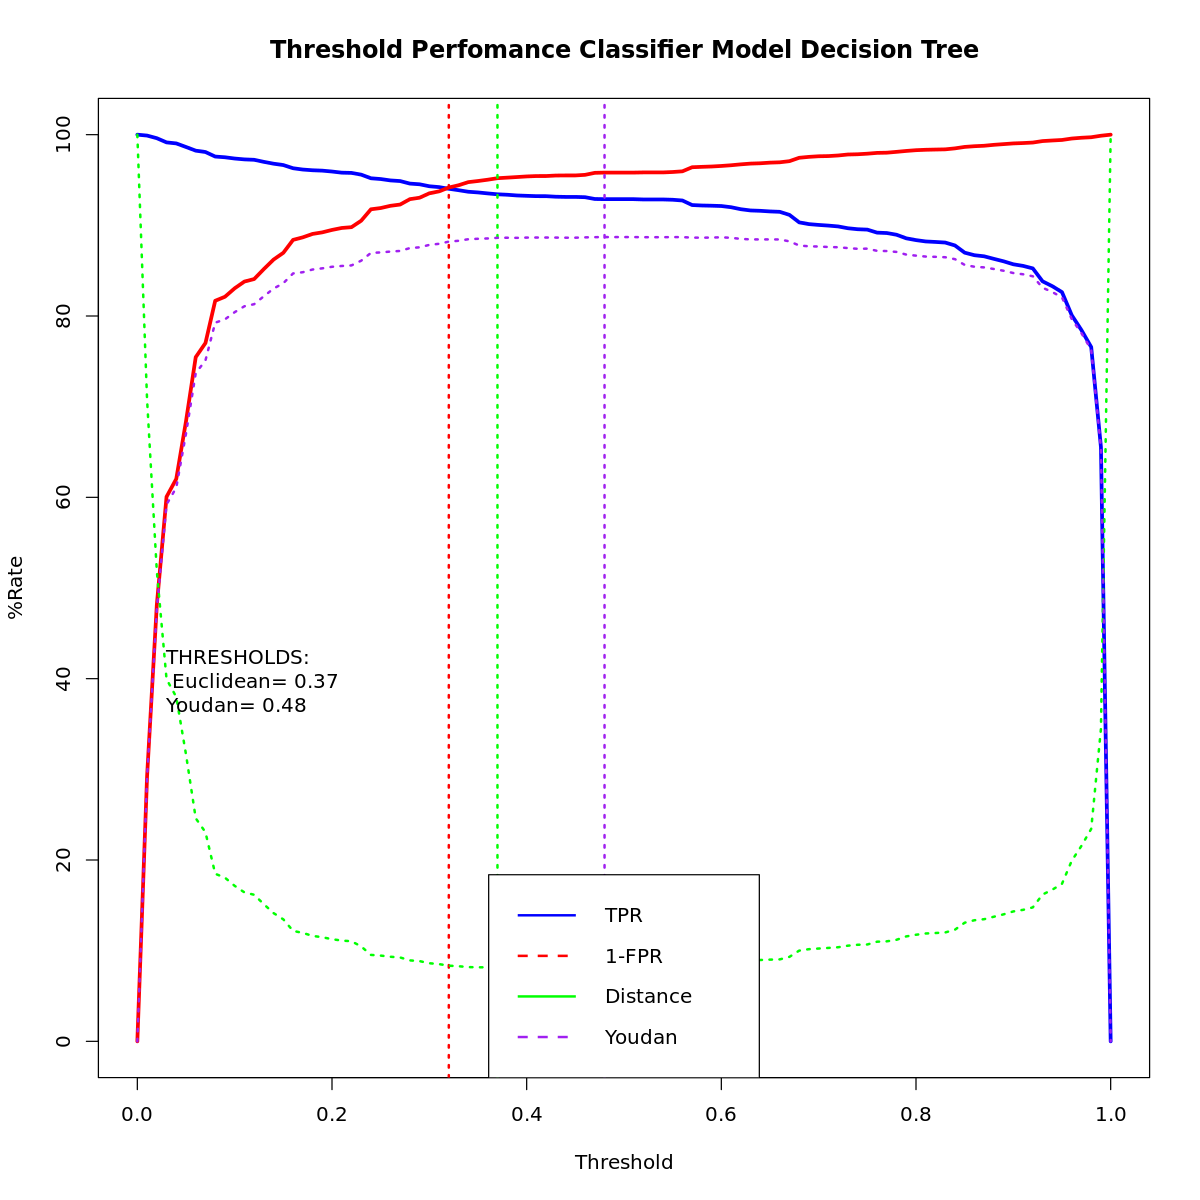

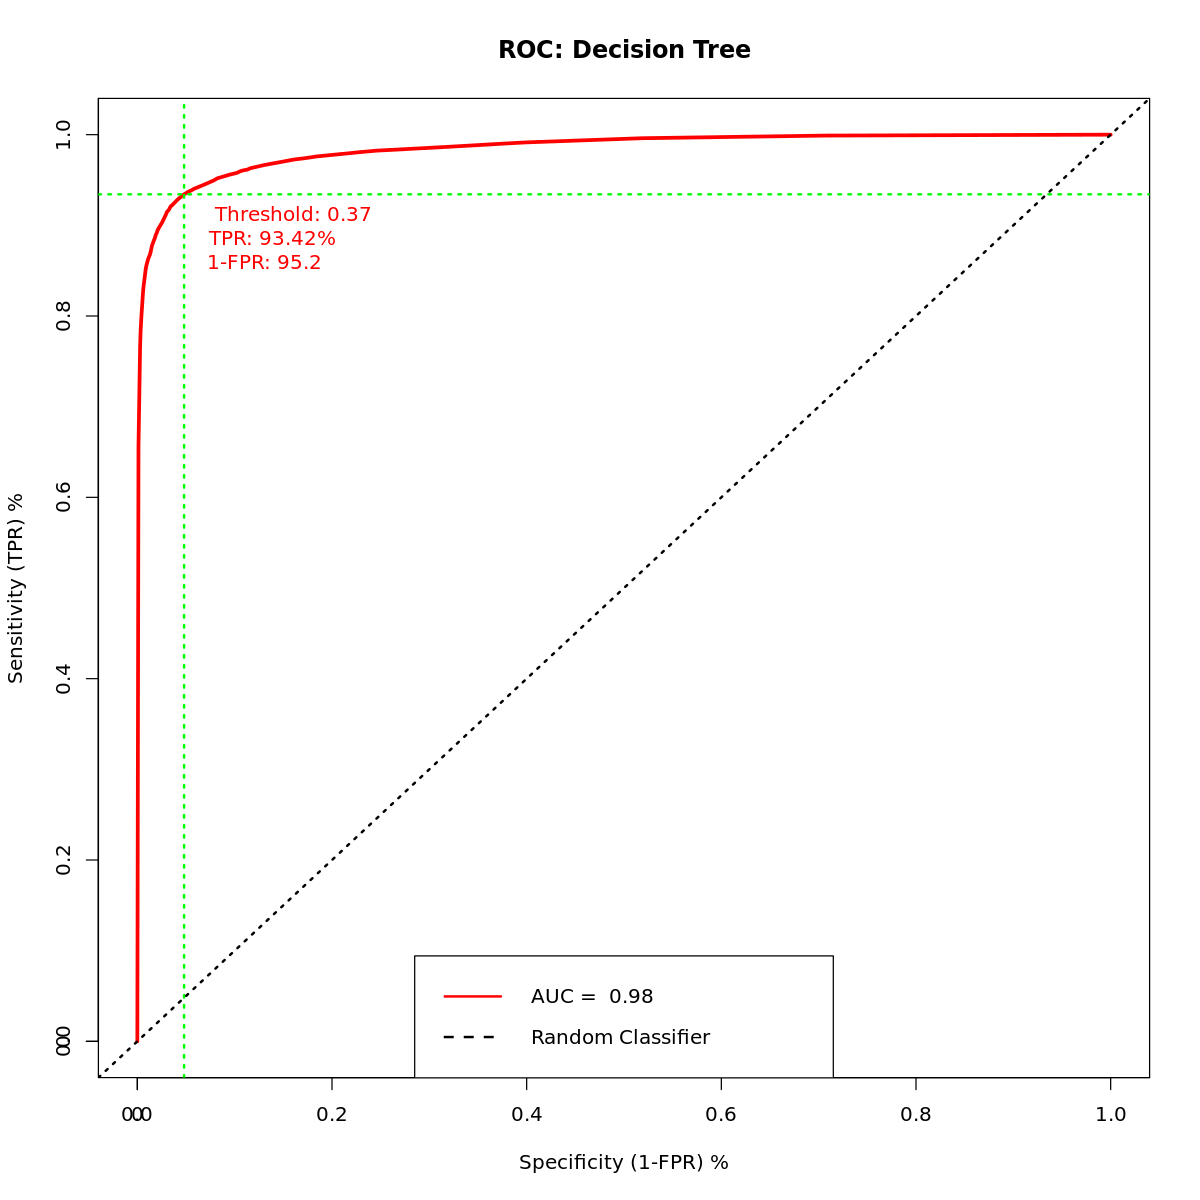

In [65]:
DT<-DecisionTree(training_data,testing_data,plot=TRUE,OUTPUT_FIELD)
result<-DT$result


### Visualize Threshold performance plot and ROC curve

#### Threshold performance plot
The best threshold for a model is detemined from a performance plot to get the maximum of correct prediction after converting a probablitlies to a labels of classes at threshold value of 0.43

#### ROC curve
The Roc curve show a performance of a classifer with a area under a curve of value 0.98 on a test dataset which is much higer compare to the area under curve of logistic regression. Also values of specificty is lower and sensitivity is higher than logistic regression


[1] "ACCURACY :  94.3319474386613 , PRECISION:  94.8831619708906 , RECALL:  93.4236129371549 , AUC :  0.984237242847252 F1 score: 94.1477310367672 Loss : 0.151939280244584 Threshold : 0.37"


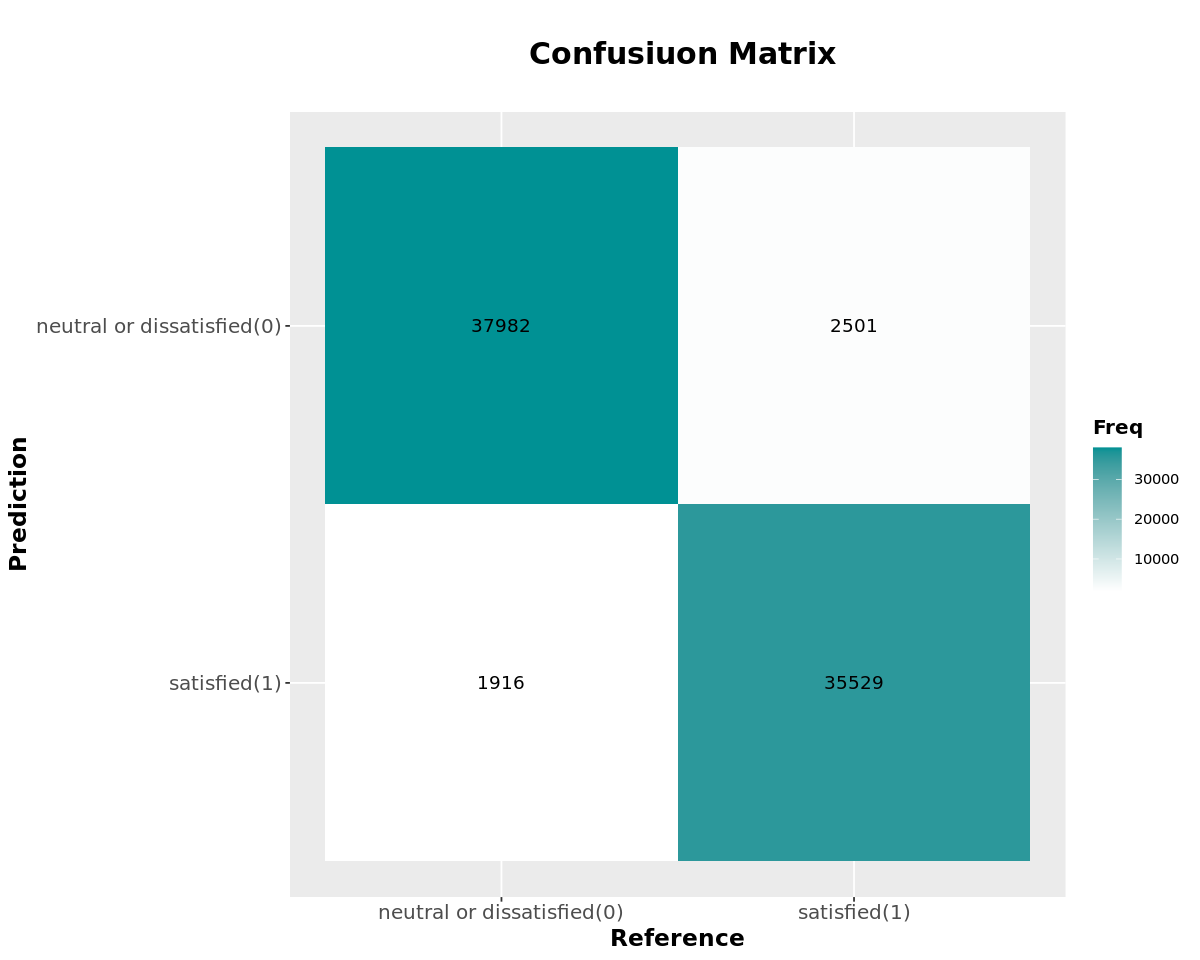

In [66]:
options(repr.plot.width = 10, repr.plot.height = 8)
ConfusionMatrix_plot(result$gt,result$pred_labels)

accuracy<-result$acc
precision<-result$pgood
recall<-result$TPR
auc <- result$AUC
f1_score <- F1_score(precision,recall)
loss <- BCE_loss(result$gt,result$proba)
threshold<- result$threshold
print(paste("ACCURACY : ", accuracy,
            ", PRECISION: ", precision,
            ", RECALL: ", recall, 
            ", AUC : ",auc,
            "F1 score:", f1_score,
            "Loss :", loss,
             "Threshold :", threshold))

The confusion matrix of Decision Tree clearly shown a different of number in of correct and incorrect prediction simialr to logistice regression but with huge different in number of False Negative. 

The Final accuracy for Decison Tree model is 94 % which is very high compare to logistice regression. These proves that passenger dataset contains a complex relationship between each field, the information in dataset tends to non-linear seperable which is the reason why tree based model outperform liner classifier like logistic regression

#### Importance Variable (Fields) in Decison Tree

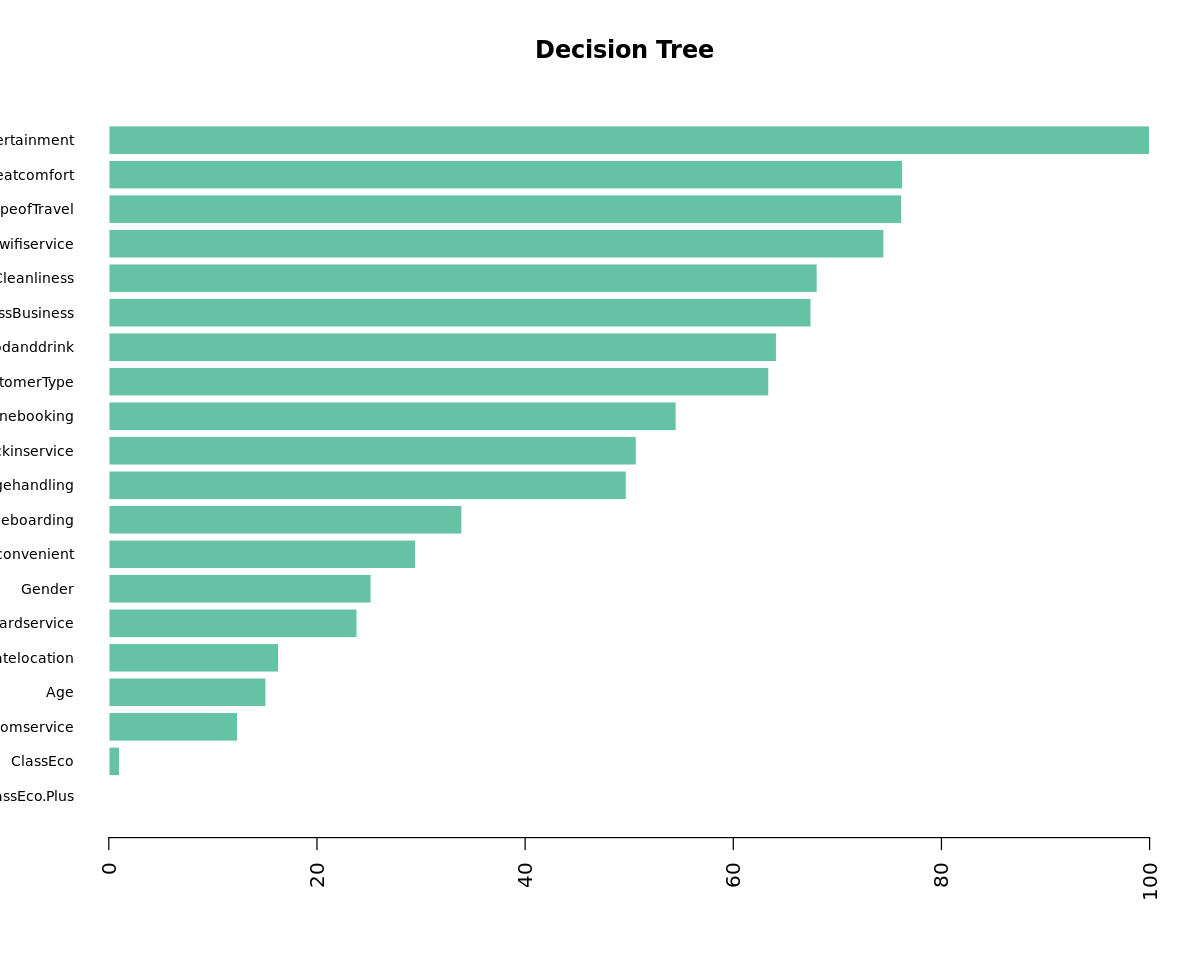

In [67]:
TreeCoeff_plot(DT$model)

In [68]:
df <-unlist(result[-which(names(result) %in%c("pred_labels","gt","proba"))])
#allResults<-
allResults<-cbind(allResults,data.frame(DecisionTree=unlist(df)))
allResults

LogisticRegression Logistic_with_Kfold DecisionTree
TP        3.110200e+04       10330.00            3.552900e+04
FN        7.040000e+03        2421.00            2.501000e+03
FP        6.006000e+03        1910.00            1.916000e+03
TN        3.378000e+04       11313.00            3.798200e+04
F1        8.266312e+01          82.67            9.414773e+01
acc       8.325891e+01          83.32            9.433195e+01
pgood     8.381481e+01          84.40            9.488316e+01
pbad      8.275355e+01          82.38            9.382210e+01
FPR       1.509576e+01          14.45            4.802246e+00
TPR       8.154266e+01          81.01            9.342361e+01
TNR       8.490424e+01          85.55            9.519775e+01
MCC       6.650760e-01           0.67            8.866330e-01
threshold 5.000000e-01           0.51            3.700000e-01
AUC       9.039995e-01           0.90            9.842372e-01

### Decision Tree with K-Fold Cross Validation

In [69]:
KFOLDS <- 10  # Number of folded experiments
dataset<-stratifiedDataset(processed_data)
measures<-runExperiment(dataset = dataset,FUN = DecisionTree)

[1] "FOLD : , 1"
[1] "FOLD : , 2"
[1] "FOLD : , 3"
[1] "FOLD : , 4"
[1] "FOLD : , 5"
[1] "FOLD : , 6"
[1] "FOLD : , 7"
[1] "FOLD : , 8"
[1] "FOLD : , 9"
[1] "FOLD : , 10"


In [70]:
data.frame(t(measures$allresults))

data.frame(measures$means)

X1           X2           X3           X4           X5          
TP        1.196800e+04 1.195000e+04 1.191700e+04 1.191100e+04 1.186300e+04
FN        7.840000e+02 8.020000e+02 8.350000e+02 8.410000e+02 8.890000e+02
FP        6.400000e+02 6.340000e+02 6.010000e+02 6.570000e+02 5.450000e+02
TN        1.258500e+04 1.259100e+04 1.262400e+04 1.256800e+04 1.268000e+04
F1        9.438486e+01 9.433218e+01 9.431737e+01 9.408373e+01 9.430048e+01
acc       9.451823e+01 9.447203e+01 9.447203e+01 9.423336e+01 9.447973e+01
pgood     9.492386e+01 9.496186e+01 9.519891e+01 9.477244e+01 9.560767e+01
pbad      9.413569e+01 9.401180e+01 9.379597e+01 9.372809e+01 9.344830e+01
FPR       4.839319e+00 4.793951e+00 4.544423e+00 4.967864e+00 4.120983e+00
TPR       9.385194e+01 9.371079e+01 9.345201e+01 9.340496e+01 9.302854e+01
TNR       9.516068e+01 9.520605e+01 9.545558e+01 9.503214e+01 9.587902e+01
MCC       8.903608e-01 8.894524e-01 8.895122e-01 8.846881e-01 8.898174e-01
threshold 3.600000e-01 4.000000e-01 3.800000e-01 3.800000e-01 4.500000e-01
AUC       9.851958e-01 9.857133e-01 9.844129e-01 9.842385e-01 9.845296e-01
          X6           X7           X8           X9           X10         
TP        1.191900e+04 1.193300e+04 1.192200e+04 1.195900e+04 1.192500e+04
FN        8.320000e+02 8.180000e+02 8.290000e+02 7.920000e+02 8.260000e+02
FP        6.420000e+02 5.990000e+02 5.870000e+02 6.540000e+02 5.850000e+02
TN        1.258200e+04 1.262500e+04 1.263700e+04 1.257000e+04 1.263900e+04
F1        9.417668e+01 9.439544e+01 9.439430e+01 9.429901e+01 9.441431e+01
acc       9.432531e+01 9.454475e+01 9.454860e+01 9.443311e+01 9.456785e+01
pgood     9.488894e+01 9.522024e+01 9.530738e+01 9.481487e+01 9.532374e+01
pbad      9.379752e+01 9.391505e+01 9.384375e+01 9.407274e+01 9.386558e+01
FPR       4.854809e+00 4.529643e+00 4.438899e+00 4.945554e+00 4.423775e+00
TPR       9.347502e+01 9.358482e+01 9.349855e+01 9.378872e+01 9.352208e+01
TNR       9.514519e+01 9.547036e+01 9.556110e+01 9.505445e+01 9.557623e+01
MCC       8.865333e-01 8.909522e-01 8.910538e-01 8.886539e-01 8.914380e-01
threshold 3.500000e-01 4.000000e-01 4.000000e-01 3.400000e-01 4.000000e-01
AUC       9.833012e-01 9.851973e-01 9.855829e-01 9.848783e-01 9.852107e-01

TP    FN  FP  TN    F1    acc   pgood pbad  FPR  TPR   TNR   MCC  threshold
1 11926 824 614 12610 94.31 94.46 95.1  93.86 4.65 93.53 95.35 0.89 0.39     
  AUC 
1 0.98

In [71]:
# Create a data frame to compare results from different experiments
allResults<-cbind(allResults,data.frame(DecisionTree_with_Kfold=unlist(measures$means)))
allResults


LogisticRegression Logistic_with_Kfold DecisionTree
TP        3.110200e+04       10330.00            3.552900e+04
FN        7.040000e+03        2421.00            2.501000e+03
FP        6.006000e+03        1910.00            1.916000e+03
TN        3.378000e+04       11313.00            3.798200e+04
F1        8.266312e+01          82.67            9.414773e+01
acc       8.325891e+01          83.32            9.433195e+01
pgood     8.381481e+01          84.40            9.488316e+01
pbad      8.275355e+01          82.38            9.382210e+01
FPR       1.509576e+01          14.45            4.802246e+00
TPR       8.154266e+01          81.01            9.342361e+01
TNR       8.490424e+01          85.55            9.519775e+01
MCC       6.650760e-01           0.67            8.866330e-01
threshold 5.000000e-01           0.51            3.700000e-01
AUC       9.039995e-01           0.90            9.842372e-01
          DecisionTree_with_Kfold
TP        11926.00               
FN          824.00               
FP          614.00               
TN        12610.00               
F1           94.31               
acc          94.46               
pgood        95.10               
pbad         93.86               
FPR           4.65               
TPR          93.53               
TNR          95.35               
MCC           0.89               
threshold     0.39               
AUC           0.98

In [72]:
#Clear cache prevent kernel kill
ls()
rm(list=setdiff(ls(),c("processed_data","DecisionTree","allResults","training_data","testing_data","OUTPUT_FIELD","combined")))
source('utils.R')
ls()

[1] "accuracy"                "allocateFoldID"         
 [3] "allResults"              "auc"                    
 [5] "auroc"                   "BCE_loss"               
 [7] "combined"                "ConfusionMatrix_plot"   
 [9] "dataset"                 "DecisionTree"           
[11] "df"                      "DT"                     
[13] "eval_model"              "f1_score"               
[15] "F1_score"                "ForestCoeff_plot"       
[17] "KFOLDS"                  "Lgm"                    
[19] "LogisticCoeff_plot"      "LogisticCurve_plot"     
[21] "LogisticRegressionModel" "loss"                   
[23] "measures"                "myModelFormula"         
[25] "NConvertClass"           "NdetermineThreshold"    
[27] "OUTPUT_FIELD"            "precision"              
[29] "processed_data"          "recall"                 
[31] "result"                  "roc_plot"               
[33] "runExperiment"           "select_field"           
[35] "selected_data"           "stratifiedDataset"      
[37] "stratifiedSplit"         "testing_data"           
[39] "threshold"               "training_data"          
[41] "training_records"        "TreeCoeff_plot"         
[43] "y_train"

[1] "allocateFoldID"       "allResults"           "auroc"               
 [4] "BCE_loss"             "combined"             "ConfusionMatrix_plot"
 [7] "DecisionTree"         "eval_model"           "F1_score"            
[10] "ForestCoeff_plot"     "LogisticCoeff_plot"   "LogisticCurve_plot"  
[13] "NConvertClass"        "NdetermineThreshold"  "OUTPUT_FIELD"        
[16] "processed_data"       "roc_plot"             "runExperiment"       
[19] "stratifiedDataset"    "stratifiedSplit"      "testing_data"        
[22] "training_data"        "TreeCoeff_plot"

## Decision Tree on unclean dataset

In [73]:
OUTPUT_FIELD = "satisfactionv2"
source('utils.R')
selected_data<-NConvertClass(combined,OUTPUT_FIELD)

selected_data<-selected_data[sample(nrow(selected_data)),]
training_records<-round(nrow(selected_data)*(70/100))
training_data <- selected_data[1:training_records,]
testing_data <- selected_data[-(1:training_records),]

print(paste("Number of Training",nrow(training_data)))
print(paste("Number of Testing",nrow(testing_data)))
head(training_data)

[1] "Number of Training 181832"
[1] "Number of Testing 77928"


satisfactionv2 Gender CustomerType      Age TypeofTravel    Class   
187206 0              Male   disloyal Customer 21  Business travel Business
249546 0              Male   Loyal Customer    36  Business travel Eco     
246021 0              Female Loyal Customer    48  Business travel Business
37100  0              Male   Loyal Customer    46  Personal Travel Eco     
96208  0              Female Loyal Customer    31  Business travel Eco     
190134 1              Female disloyal Customer 50  Business travel Eco     
       FlightDistance Seatcomfort DepartureArrivaltimeconvenient Foodanddrink ⋯
187206  255           4           0                              4            ⋯
249546  399           5           5                              5            ⋯
246021 1569           5           4                              2            ⋯
37100  1915           4           5                              4            ⋯
96208  2291           4           4                              4            ⋯
190134  993           4           4                              4            ⋯
       EaseofOnlinebooking Onboardservice Legroomservice Baggagehandling
187206 4                   5              4              4              
249546 5                   2              4              1              
246021 3                   5              5              5              
37100  5                   4              4              4              
96208  4                   5              5              4              
190134 4                   3              4              3              
       Checkinservice Cleanliness Onlineboarding DepartureDelayinMinutes
187206 4              4           4               5                     
249546 3              5           5               0                     
246021 4              3           4               0                     
37100  4              4           5              39                     
96208  2              5           4              99                     
190134 2              4           4               0                     
       ArrivalDelayinMinutes Inflightservice
187206  1                     4             
249546  0                     5             
246021  0                     5             
37100  35                    NA             
96208  99                    NA             
190134 21                     3

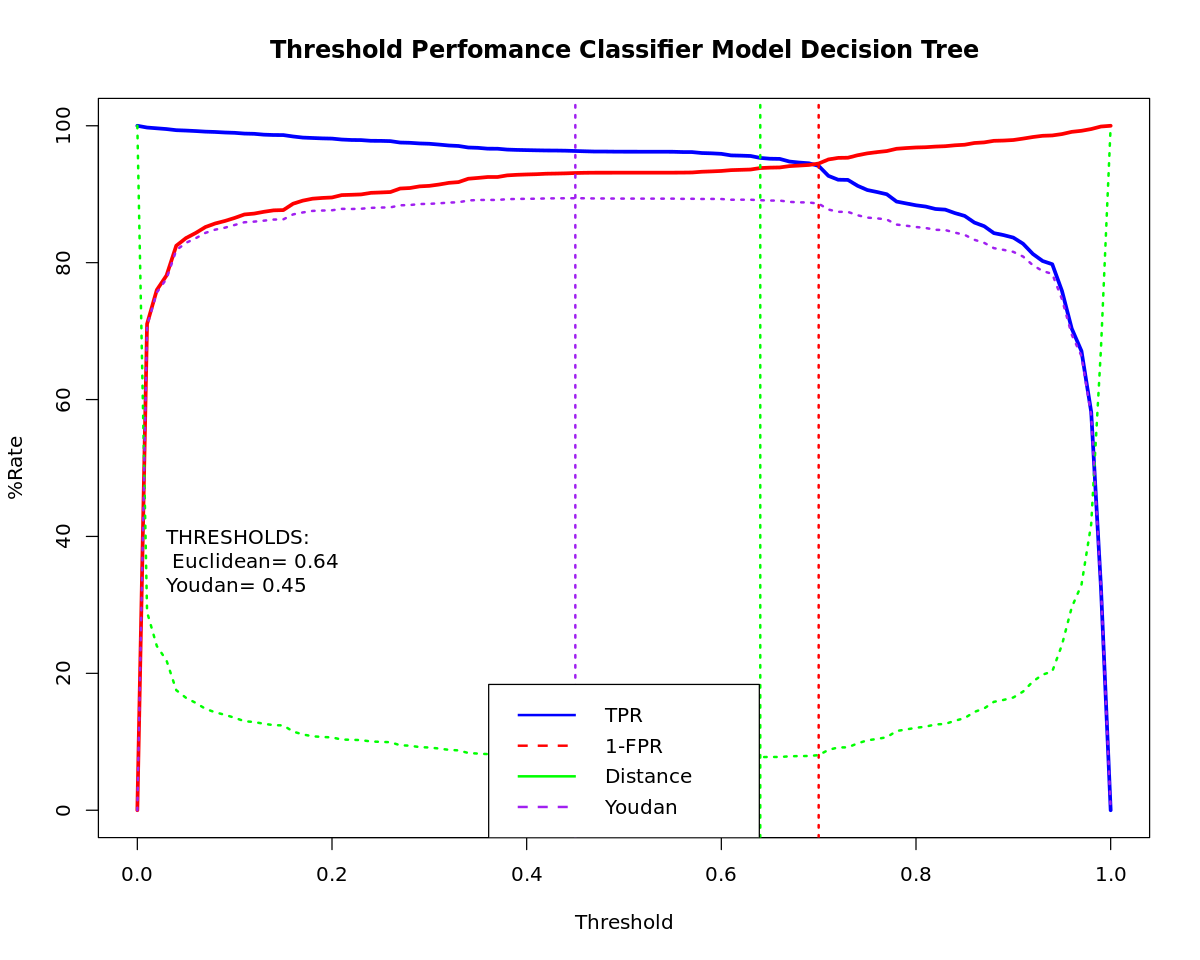

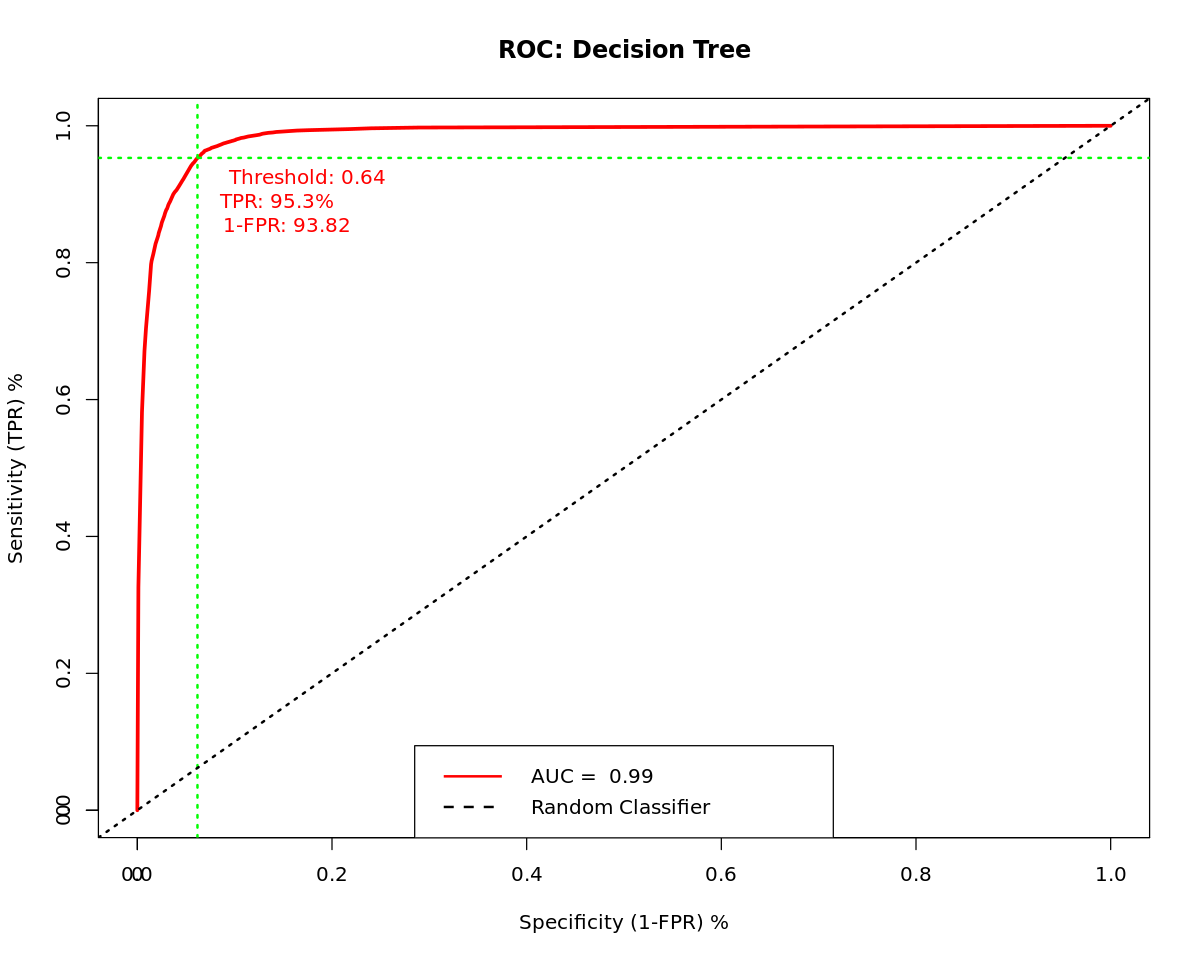

In [74]:
uncleanDT<-DecisionTree(training_data,testing_data,plot=TRUE,OUTPUT_FIELD)

In [75]:
result<-uncleanDT$result


[1] "ACCURACY :  94.5757622420696 , PRECISION:  94.1001994017946 , RECALL:  95.3045717315023 , AUC :  0.986445477178179 F1 score: 94.6985564320921 Loss : 0.143661755352254 Threshold : 0.64"


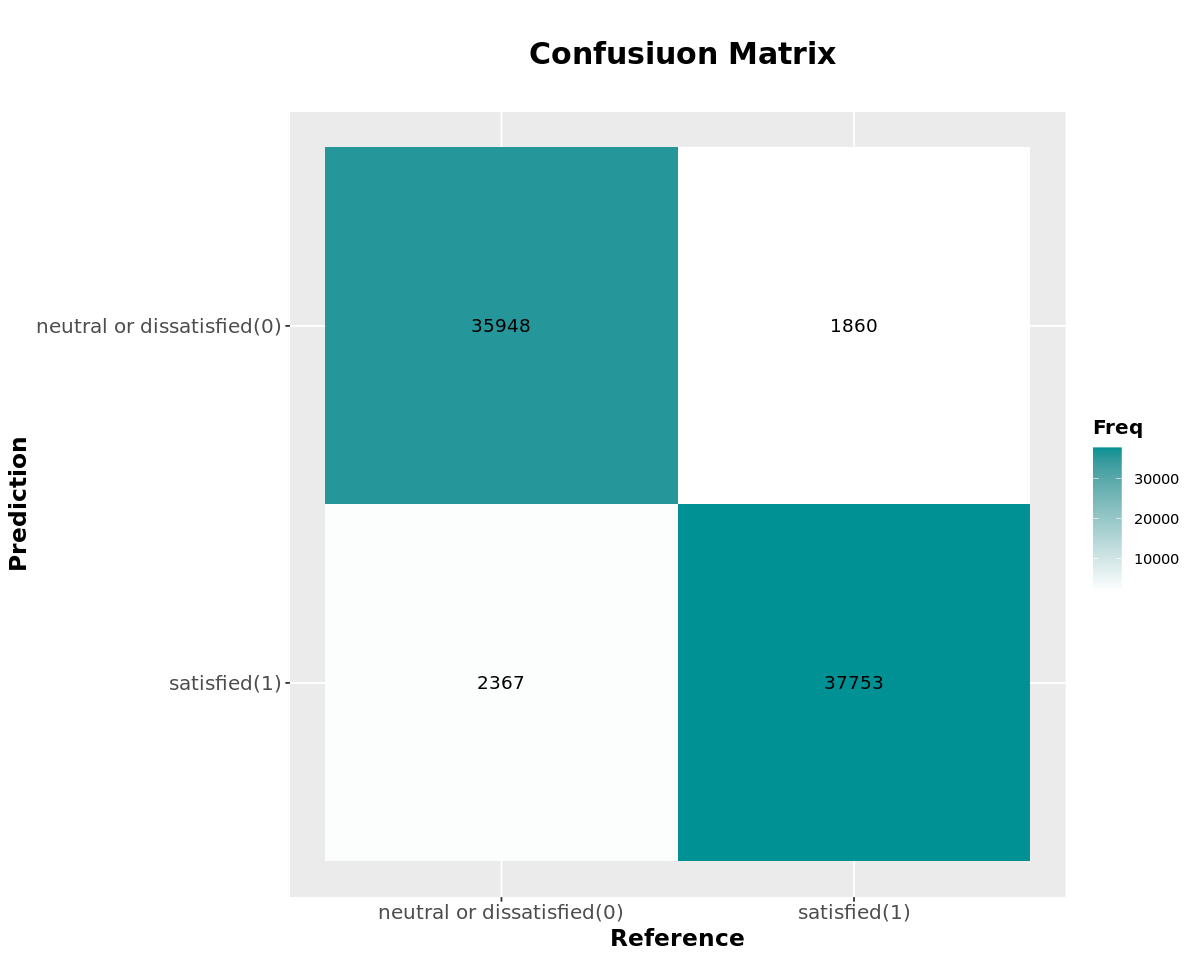

In [76]:
options(repr.plot.width = 10, repr.plot.height = 8)
ConfusionMatrix_plot(result$gt,result$pred_labels)

accuracy<-result$acc
precision<-result$pgood
recall<-result$TPR
auc <- result$AUC
f1_score <- F1_score(precision,recall)
loss <- BCE_loss(as.numeric(result$gt),as.numeric(result$proba))
threshold<- result$threshold
print(paste("ACCURACY : ", accuracy,
            ", PRECISION: ", precision,
            ", RECALL: ", recall, 
            ", AUC : ",auc,
            "F1 score:", f1_score,
            "Loss :", loss,
             "Threshold :", threshold))

In [77]:
df <-unlist(result[-which(names(result) %in%c("pred_labels","gt","proba"))])
#allResults<-
allResults<-cbind(allResults,data.frame(DecisionTree_unclean=unlist(df)))
allResults

LogisticRegression Logistic_with_Kfold DecisionTree
TP        3.110200e+04       10330.00            3.552900e+04
FN        7.040000e+03        2421.00            2.501000e+03
FP        6.006000e+03        1910.00            1.916000e+03
TN        3.378000e+04       11313.00            3.798200e+04
F1        8.266312e+01          82.67            9.414773e+01
acc       8.325891e+01          83.32            9.433195e+01
pgood     8.381481e+01          84.40            9.488316e+01
pbad      8.275355e+01          82.38            9.382210e+01
FPR       1.509576e+01          14.45            4.802246e+00
TPR       8.154266e+01          81.01            9.342361e+01
TNR       8.490424e+01          85.55            9.519775e+01
MCC       6.650760e-01           0.67            8.866330e-01
threshold 5.000000e-01           0.51            3.700000e-01
AUC       9.039995e-01           0.90            9.842372e-01
          DecisionTree_with_Kfold DecisionTree_unclean
TP        11926.00                3.775300e+04        
FN          824.00                1.860000e+03        
FP          614.00                2.367000e+03        
TN        12610.00                3.594800e+04        
F1           94.31                9.469856e+01        
acc          94.46                9.457576e+01        
pgood        95.10                9.410020e+01        
pbad         93.86                9.508041e+01        
FPR           4.65                6.177737e+00        
TPR          93.53                9.530457e+01        
TNR          95.35                9.382226e+01        
MCC           0.89                8.915372e-01        
threshold     0.39                6.400000e-01        
AUC           0.98                9.864455e-01

## K-fold decision tree with Unclean data


In [78]:
KFOLDS <- 10  # Number of folded experiments
dataset<-stratifiedDataset(selected_data)
measures<-runExperiment(dataset = dataset,FUN = DecisionTree)

[1] "FOLD : , 1"
[1] "FOLD : , 2"
[1] "FOLD : , 3"
[1] "FOLD : , 4"
[1] "FOLD : , 5"
[1] "FOLD : , 6"
[1] "FOLD : , 7"
[1] "FOLD : , 8"
[1] "FOLD : , 9"
[1] "FOLD : , 10"


In [79]:
data.frame(t(measures$allresults))

data.frame(measures$means)

X1           X2           X3           X4           X5          
TP        1.268500e+04 1.274000e+04 1.263900e+04 1.269800e+04 1.263600e+04
FN        5.400000e+02 4.850000e+02 5.860000e+02 5.270000e+02 5.890000e+02
FP        7.480000e+02 7.740000e+02 7.620000e+02 7.650000e+02 7.900000e+02
TN        1.200400e+04 1.197800e+04 1.199000e+04 1.198700e+04 1.196200e+04
F1        9.516843e+01 9.529152e+01 9.493728e+01 9.515887e+01 9.482571e+01
acc       9.504177e+01 9.515340e+01 9.481079e+01 9.502637e+01 9.469146e+01
pgood     9.443162e+01 9.427261e+01 9.431386e+01 9.431776e+01 9.411589e+01
pbad      9.569515e+01 9.610848e+01 9.534033e+01 9.578872e+01 9.530715e+01
FPR       5.865747e+00 6.069636e+00 5.975533e+00 5.999059e+00 6.195107e+00
TPR       9.591682e+01 9.633270e+01 9.556900e+01 9.601512e+01 9.554631e+01
TNR       9.413425e+01 9.393036e+01 9.402447e+01 9.400094e+01 9.380489e+01
MCC       9.008892e-01 9.032206e-01 8.962382e-01 9.006126e-01 8.938712e-01
threshold 6.100000e-01 6.100000e-01 6.400000e-01 6.200000e-01 6.500000e-01
AUC       9.882280e-01 9.875270e-01 9.878136e-01 9.877482e-01 9.868507e-01
          X6           X7           X8           X9           X10         
TP        1.271000e+04 1.271000e+04 1.268200e+04 1.268400e+04 1.267100e+04
FN        5.140000e+02 5.140000e+02 5.420000e+02 5.400000e+02 5.530000e+02
FP        7.540000e+02 8.250000e+02 8.250000e+02 8.420000e+02 8.020000e+02
TN        1.199700e+04 1.192600e+04 1.192600e+04 1.190900e+04 1.194900e+04
F1        9.524880e+01 9.499608e+01 9.488609e+01 9.483364e+01 9.492452e+01
acc       9.511838e+01 9.484504e+01 9.473725e+01 9.467950e+01 9.478345e+01
pgood     9.439988e+01 9.390469e+01 9.389206e+01 9.377495e+01 9.404735e+01
pbad      9.589162e+01 9.586817e+01 9.565287e+01 9.566230e+01 9.557671e+01
FPR       5.913262e+00 6.470081e+00 6.470081e+00 6.603404e+00 6.289703e+00
TPR       9.611313e+01 9.611313e+01 9.590139e+01 9.591652e+01 9.581821e+01
TNR       9.408674e+01 9.352992e+01 9.352992e+01 9.339660e+01 9.371030e+01
MCC       9.024567e-01 8.970793e-01 8.948810e-01 8.937516e-01 8.957627e-01
threshold 6.000000e-01 6.300000e-01 6.400000e-01 6.200000e-01 6.200000e-01
AUC       9.879435e-01 9.876654e-01 9.867674e-01 9.869281e-01 9.865091e-01

TP    FN  FP  TN    F1    acc   pgood pbad  FPR  TPR   TNR   MCC threshold
1 12685 539 788 11962 95.03 94.89 94.15 95.69 6.19 95.92 93.81 0.9 0.62     
  AUC 
1 0.99

In [80]:
# Create a data frame to compare results from different experiments
allResults<-cbind(allResults,data.frame(DecisionTree_Kfold_Unclean=unlist(measures$means)))
allResults


LogisticRegression Logistic_with_Kfold DecisionTree
TP        3.110200e+04       10330.00            3.552900e+04
FN        7.040000e+03        2421.00            2.501000e+03
FP        6.006000e+03        1910.00            1.916000e+03
TN        3.378000e+04       11313.00            3.798200e+04
F1        8.266312e+01          82.67            9.414773e+01
acc       8.325891e+01          83.32            9.433195e+01
pgood     8.381481e+01          84.40            9.488316e+01
pbad      8.275355e+01          82.38            9.382210e+01
FPR       1.509576e+01          14.45            4.802246e+00
TPR       8.154266e+01          81.01            9.342361e+01
TNR       8.490424e+01          85.55            9.519775e+01
MCC       6.650760e-01           0.67            8.866330e-01
threshold 5.000000e-01           0.51            3.700000e-01
AUC       9.039995e-01           0.90            9.842372e-01
          DecisionTree_with_Kfold DecisionTree_unclean
TP        11926.00                3.775300e+04        
FN          824.00                1.860000e+03        
FP          614.00                2.367000e+03        
TN        12610.00                3.594800e+04        
F1           94.31                9.469856e+01        
acc          94.46                9.457576e+01        
pgood        95.10                9.410020e+01        
pbad         93.86                9.508041e+01        
FPR           4.65                6.177737e+00        
TPR          93.53                9.530457e+01        
TNR          95.35                9.382226e+01        
MCC           0.89                8.915372e-01        
threshold     0.39                6.400000e-01        
AUC           0.98                9.864455e-01        
          DecisionTree_Kfold_Unclean
TP        12685.00                  
FN          539.00                  
FP          788.00                  
TN        11962.00                  
F1           95.03                  
acc          94.89                  
pgood        94.15                  
pbad         95.69                  
FPR           6.19                  
TPR          95.92                  
TNR          93.81                  
MCC           0.90                  
threshold     0.62                  
AUC           0.99

### Random Forest Classification

Random Forest is an ensemble learning model in machine learning, It can be use in both regression or classification. It consist of mulitple number of decision tree inside which each tree spit out a prediction of a class and prediction of a class with the most occur or vote from trees become a final result of a model.

Using this model may improve the result from traditional Decision tree but it has longer training time since there are mulitple tree.

#### Random Forest on Clean dataset

In [81]:
# Select field for Decsion Tree
OUTPUT_FIELD = "satisfactionv2"

select_field<-c('satisfactionv2',
               'Gender',
                'CustomerType',
                'TypeofTravel',
                'ClassBusiness',
                'ClassEco',
                'ClassEco.Plus',
#                 'DepartureDelayinMinutes0',
#                 'DepartureDelayinMinutes1',
#                 'DepartureDelayinMinutes2',
#                 'DepartureDelayinMinutes3',
#                 'ArrivalDelayinMinutes0',
#                 'ArrivalDelayinMinutes1',
#                 'ArrivalDelayinMinutes2',
#                 'ArrivalDelayinMinutes3',
                'Age',
                'Seatcomfort',
                'DepartureArrivaltimeconvenient',
                'Foodanddrink',
                'Gatelocation',
                'Inflightwifiservice',
                'Inflightentertainment',
               'EaseofOnlinebooking',
                 'Onboardservice',
                 'Legroomservice',
                 'Baggagehandling',
                 'Checkinservice',
                 'Cleanliness',
               'Onlineboarding'
               )

print("Select Fields")
print((select_field))


selected_data<-processed_data[,select_field]

selected_data<-selected_data[sample(nrow(selected_data)),]
training_records<-round(nrow(selected_data)*(70/100))
training_data <- selected_data[1:training_records,]
testing_data <- selected_data[-(1:training_records),]

print(paste("Number of Training",nrow(training_data)))
print(paste("Number of Testing",nrow(testing_data)))
head(training_data)

[1] "Select Fields"
 [1] "satisfactionv2"                 "Gender"                        
 [3] "CustomerType"                   "TypeofTravel"                  
 [5] "ClassBusiness"                  "ClassEco"                      
 [7] "ClassEco.Plus"                  "Age"                           
 [9] "Seatcomfort"                    "DepartureArrivaltimeconvenient"
[11] "Foodanddrink"                   "Gatelocation"                  
[13] "Inflightwifiservice"            "Inflightentertainment"         
[15] "EaseofOnlinebooking"            "Onboardservice"                
[17] "Legroomservice"                 "Baggagehandling"               
[19] "Checkinservice"                 "Cleanliness"                   
[21] "Onlineboarding"                
[1] "Number of Training 181832"
[1] "Number of Testing 77928"


satisfactionv2 Gender CustomerType TypeofTravel ClassBusiness ClassEco
126486 1              0      0            1            1             0       
243316 1              0      0            1            1             0       
188360 0              0      1            1            0             1       
153600 0              1      0            0            0             1       
129416 1              1      0            1            1             0       
178463 0              1      1            1            1             0       
       ClassEco.Plus Age       Seatcomfort DepartureArrivaltimeconvenient ⋯
126486 0             0.7260274 0.2         0.2                            ⋯
243316 0             0.5753425 1.0         0.6                            ⋯
188360 0             0.2465753 0.6         0.6                            ⋯
153600 0             0.6849315 0.6         0.6                            ⋯
129416 0             0.6986301 0.2         0.2                            ⋯
178463 0             0.4246575 0.2         0.4                            ⋯
       Gatelocation Inflightwifiservice Inflightentertainment
126486 0.2          0.4                 0.8                  
243316 0.6          0.6                 1.0                  
188360 0.8          0.8                 1.0                  
153600 0.8          0.6                 0.8                  
129416 0.2          0.6                 1.0                  
178463 0.8          0.4                 0.2                  
       EaseofOnlinebooking Onboardservice Legroomservice Baggagehandling
126486 1.0                 1.0            1.0            1.0            
243316 0.6                 1.0            1.0            0.8            
188360 0.8                 0.8            0.2            0.6            
153600 0.6                 0.8            0.6            0.8            
129416 1.0                 1.0            1.0            1.0            
178463 0.4                 0.8            0.6            0.8            
       Checkinservice Cleanliness Onlineboarding
126486 0.6            1.0         0.6           
243316 0.8            0.8         0.8           
188360 0.4            1.0         0.8           
153600 0.6            0.4         0.2           
129416 1.0            1.0         1.0           
178463 1.0            0.2         0.4

In [82]:
RandomForestClassifier<-function(training_data, testing_data, plot=TRUE, output_field="satisfactionv2"){
    
    
# Training data
x_train<-training_data[,names(training_data [-which(names(training_data)%in% output_field)])]
y_train<-training_data[,output_field]
# Testing data
x_test<-testing_data[,names(training_data [-which(names(testing_data)%in% output_field)])]
y_test<-testing_data[,output_field]



RandForestModel<-randomForest::randomForest(x_train,
                               factor(y_train),
                               ntree=50 ,
                               importance=TRUE,
                               mtry=sqrt(ncol(x_train)),
                               na.action=randomForest::na.roughfix)
    
#y_pred<-predict()
    
    
class_proba<-predict(RandForestModel, newdata=x_test, type="prob")

# Get the column index with the class label
classIndex<-which(as.numeric(colnames(class_proba))==1)

# Get the probabilities for classifying the good loans
y_proba<-class_proba[,classIndex]


title<-'Random Forest'
results<-NdetermineThreshold(test_expected=y_test,
                                test_predicted=y_proba,
                                plot=plot,
                                title=title)

accuracy<-results$acc
precision<-results$pgood
recall<-results$TPR
auc<-results$AUC

    
return(list("model"=RandForestModel,"result"=results))
}



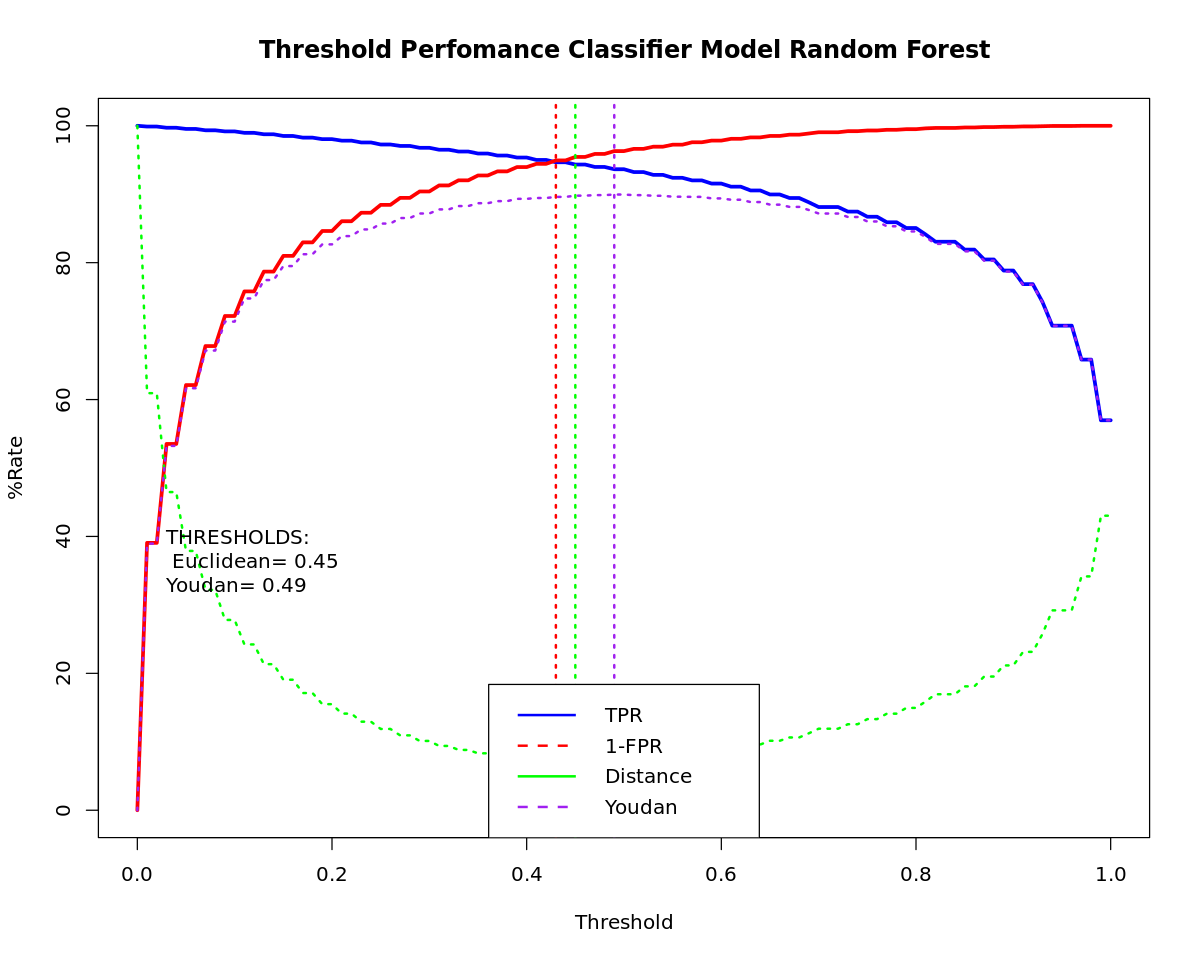

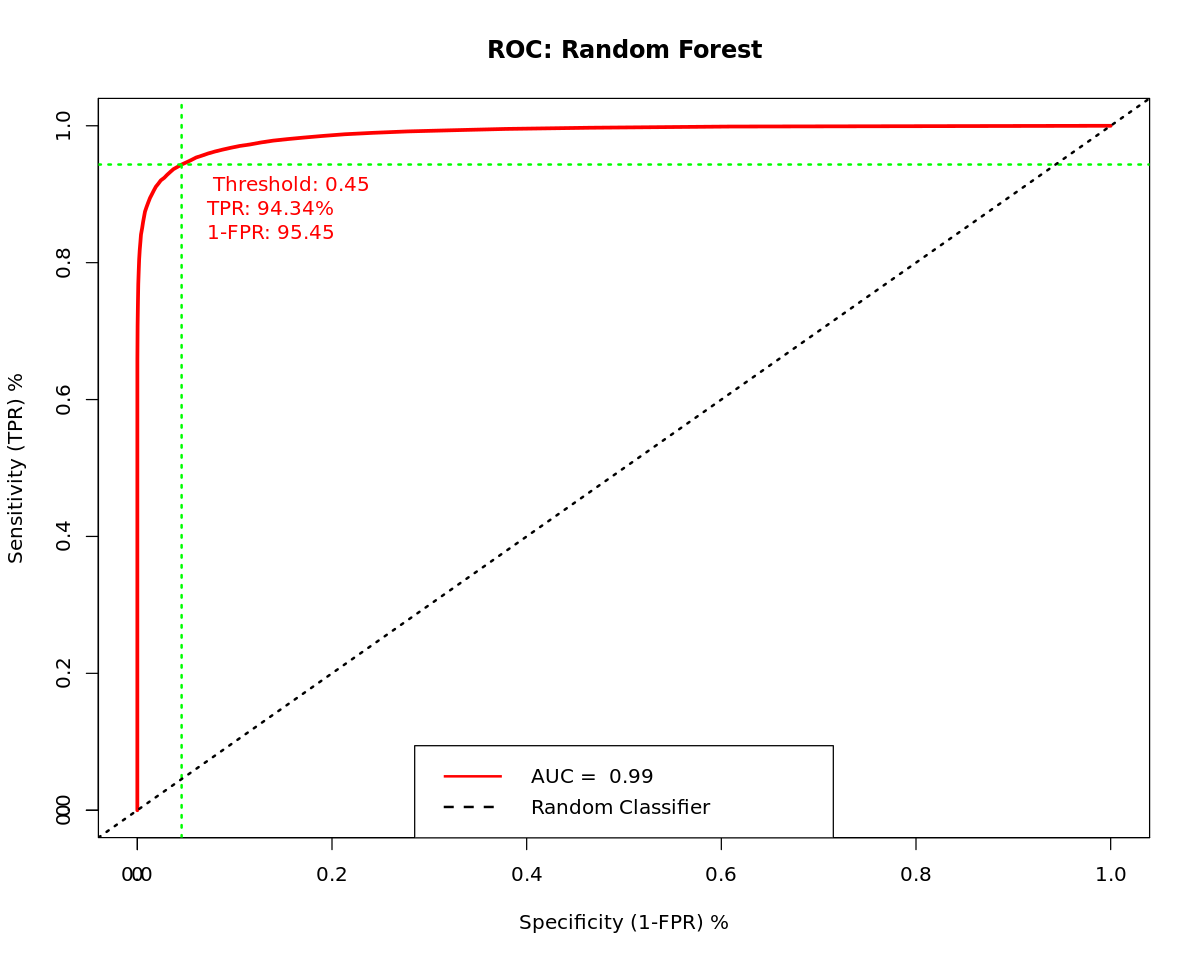

In [83]:
RFmodel<-RandomForestClassifier(training_data,testing_data,plot=TRUE,OUTPUT_FIELD)
result<-RFmodel$result

#### Confusion Matrix

[1] "ACCURACY :  94.9055538445745 , PRECISION:  95.226900523007 , RECALL:  94.3397707646412 , AUC :  0.988896218998445 F1 score: 94.7812598590809 Loss : 0.141214721287054 Threshold : 0.45"


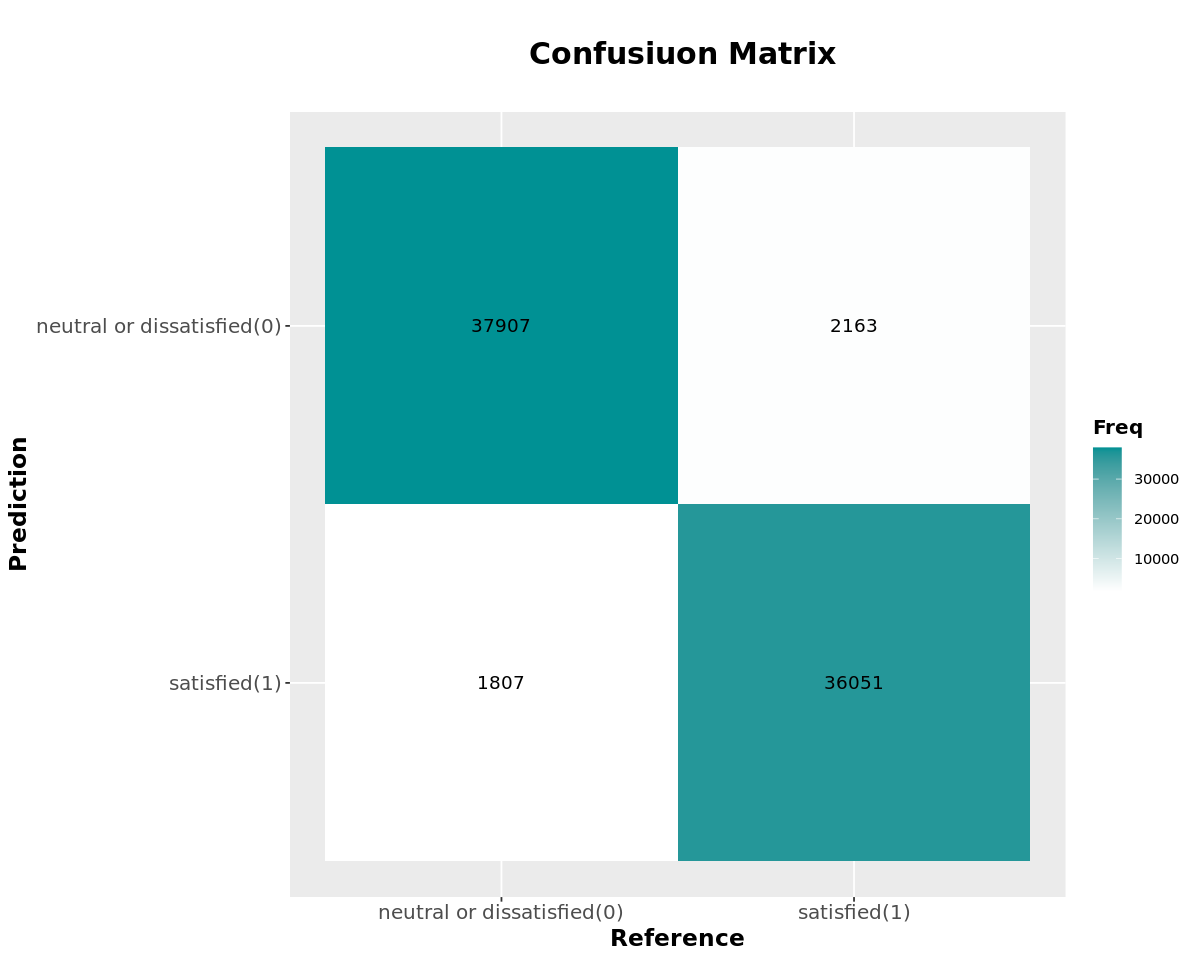

In [84]:
options(repr.plot.width = 10, repr.plot.height =8)
ConfusionMatrix_plot(result$gt,result$pred_labels)

accuracy<-result$acc
precision<-result$pgood
recall<-result$TPR
auc <- result$AUC
f1_score <- F1_score(precision,recall)
loss <- BCE_loss(result$gt,result$proba)
threshold<- result$threshold
print(paste("ACCURACY : ", accuracy,
            ", PRECISION: ", precision,
            ", RECALL: ", recall, 
            ", AUC : ",auc,
            "F1 score:", f1_score,
            "Loss :", loss,
            "Threshold :", threshold))

#### Impotance Variable(fields) on Random Forest Classifer

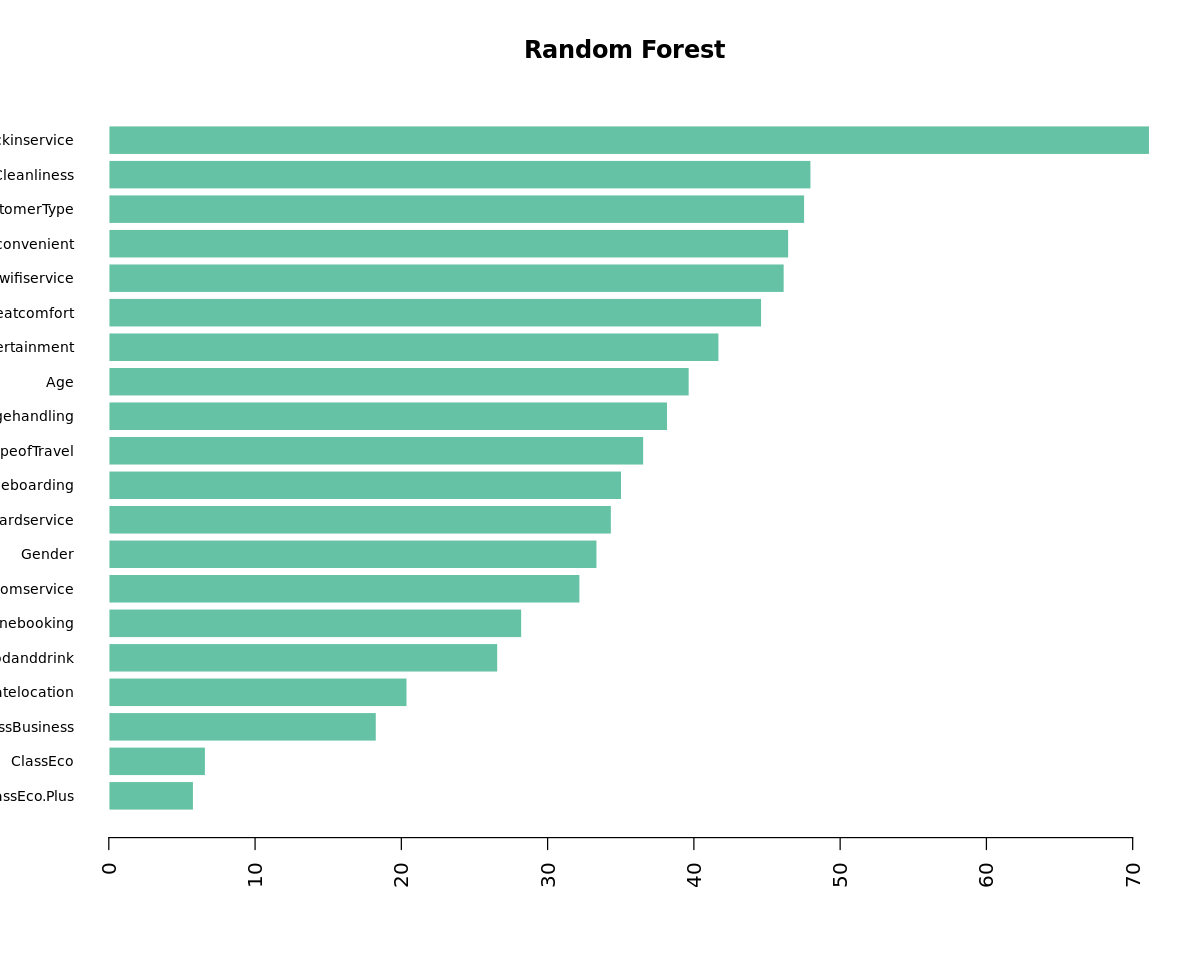

In [85]:
ForestCoeff_plot(RFmodel$model)

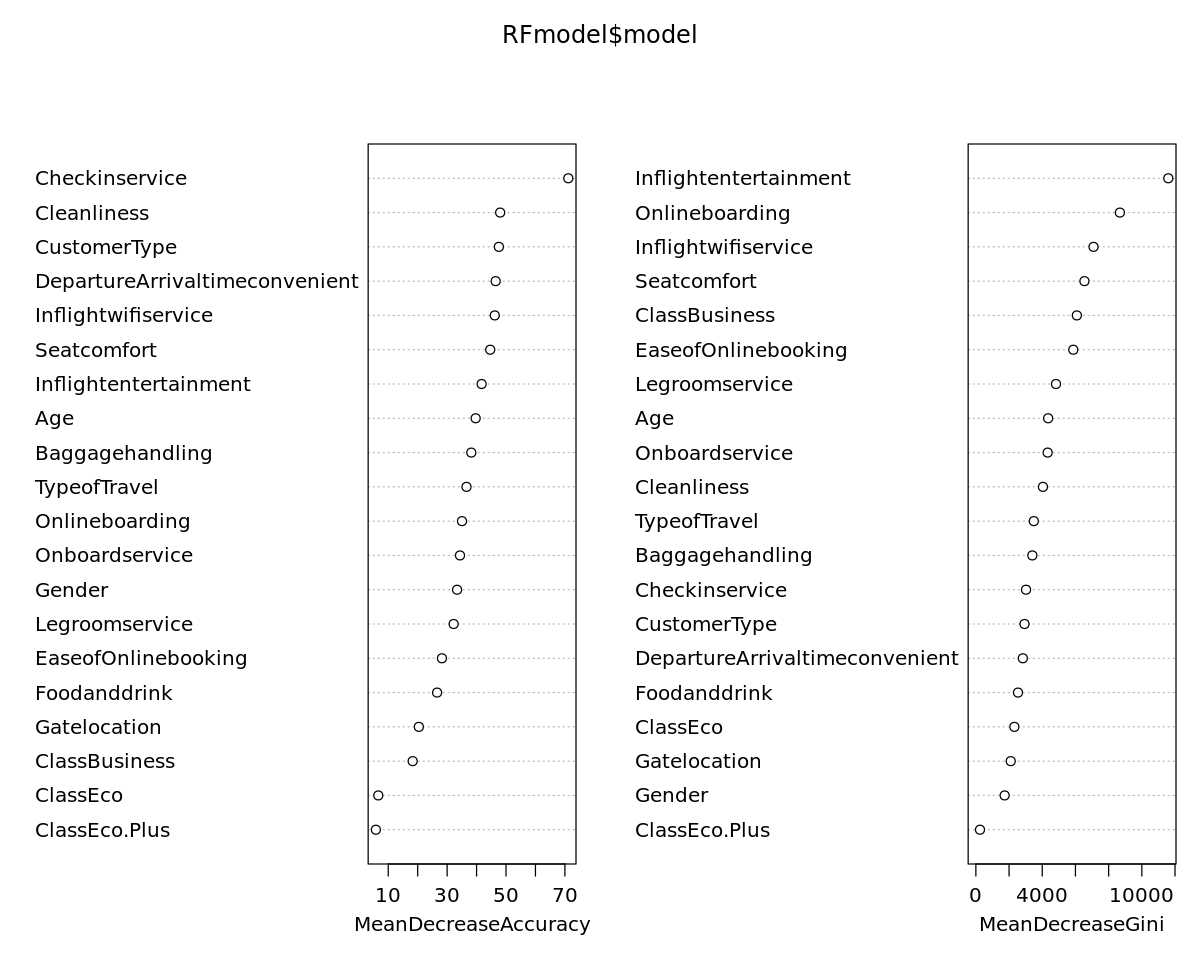

In [86]:
options(repr.plot.width = 10, repr.plot.height = 8)
# Variable importance plot
randomForest::varImpPlot(RFmodel$model)


In [87]:
df <-unlist(result[-which(names(result) %in%c("pred_labels","gt","proba"))])
#allResults<-
allResults<-cbind(allResults,data.frame(RandomForest=unlist(df)))
allResults

LogisticRegression Logistic_with_Kfold DecisionTree
TP        3.110200e+04       10330.00            3.552900e+04
FN        7.040000e+03        2421.00            2.501000e+03
FP        6.006000e+03        1910.00            1.916000e+03
TN        3.378000e+04       11313.00            3.798200e+04
F1        8.266312e+01          82.67            9.414773e+01
acc       8.325891e+01          83.32            9.433195e+01
pgood     8.381481e+01          84.40            9.488316e+01
pbad      8.275355e+01          82.38            9.382210e+01
FPR       1.509576e+01          14.45            4.802246e+00
TPR       8.154266e+01          81.01            9.342361e+01
TNR       8.490424e+01          85.55            9.519775e+01
MCC       6.650760e-01           0.67            8.866330e-01
threshold 5.000000e-01           0.51            3.700000e-01
AUC       9.039995e-01           0.90            9.842372e-01
          DecisionTree_with_Kfold DecisionTree_unclean
TP        11926.00                3.775300e+04        
FN          824.00                1.860000e+03        
FP          614.00                2.367000e+03        
TN        12610.00                3.594800e+04        
F1           94.31                9.469856e+01        
acc          94.46                9.457576e+01        
pgood        95.10                9.410020e+01        
pbad         93.86                9.508041e+01        
FPR           4.65                6.177737e+00        
TPR          93.53                9.530457e+01        
TNR          95.35                9.382226e+01        
MCC           0.89                8.915372e-01        
threshold     0.39                6.400000e-01        
AUC           0.98                9.864455e-01        
          DecisionTree_Kfold_Unclean RandomForest
TP        12685.00                   3.605100e+04
FN          539.00                   2.163000e+03
FP          788.00                   1.807000e+03
TN        11962.00                   3.790700e+04
F1           95.03                   9.478126e+01
acc          94.89                   9.490555e+01
pgood        94.15                   9.522690e+01
pbad         95.69                   9.460195e+01
FPR           6.19                   4.550033e+00
TPR          95.92                   9.433977e+01
TNR          93.81                   9.544997e+01
MCC           0.90                   8.980929e-01
threshold     0.62                   4.500000e-01
AUC           0.99                   9.888962e-01

### K-FOLD Cross Validation on Random Forest on clean dataset

In [88]:
KFOLDS          <- 6                 # Number of folded experiments
dataset<-stratifiedDataset(processed_data)
measures<-runExperiment(dataset = dataset,FUN = RandomForestClass

[1] "FOLD : , 1"
[1] "FOLD : , 2"
[1] "FOLD : , 3"
[1] "FOLD : , 4"
[1] "FOLD : , 5"
[1] "FOLD : , 6"


In [89]:
data.frame(measures$allresults)

TP    FN   FP  TN    F1       acc      pgood    pbad     FPR      TPR     
1 20080 1173 902 21139 95.08701 95.20719 95.70108 94.74274 4.092373 94.48078
2 20076 1177 914 21127 95.05007 95.17023 95.64555 94.72292 4.146817 94.46196
3 20150 1103 975 21066 95.09651 95.20026 95.38462 95.02458 4.423574 94.81014
4 20080 1172 931 21110 95.02402 95.14240 95.56899 94.74015 4.223946 94.48522
5 20123 1129 932 21109 95.12847 95.23942 95.57350 94.92310 4.228483 94.68756
6 20084 1168 874 21166 95.16228 95.28319 95.82975 94.77031 3.965517 94.50405
  TNR      MCC       threshold AUC      
1 95.90763 0.9041611 0.45      0.9901756
2 95.85318 0.9034180 0.45      0.9904539
3 95.57643 0.9039788 0.43      0.9904766
4 95.77605 0.9028520 0.45      0.9893467
5 95.77152 0.9047784 0.45      0.9896581
6 96.03448 0.9056929 0.45      0.9900120

In [90]:
# Create a data frame to compare results from different experiments
allResults<-cbind(allResults,data.frame(RandomForestKfold=unlist(measures$means)))
allResults

LogisticRegression Logistic_with_Kfold DecisionTree
TP        3.110200e+04       10330.00            3.552900e+04
FN        7.040000e+03        2421.00            2.501000e+03
FP        6.006000e+03        1910.00            1.916000e+03
TN        3.378000e+04       11313.00            3.798200e+04
F1        8.266312e+01          82.67            9.414773e+01
acc       8.325891e+01          83.32            9.433195e+01
pgood     8.381481e+01          84.40            9.488316e+01
pbad      8.275355e+01          82.38            9.382210e+01
FPR       1.509576e+01          14.45            4.802246e+00
TPR       8.154266e+01          81.01            9.342361e+01
TNR       8.490424e+01          85.55            9.519775e+01
MCC       6.650760e-01           0.67            8.866330e-01
threshold 5.000000e-01           0.51            3.700000e-01
AUC       9.039995e-01           0.90            9.842372e-01
          DecisionTree_with_Kfold DecisionTree_unclean
TP        11926.00                3.775300e+04        
FN          824.00                1.860000e+03        
FP          614.00                2.367000e+03        
TN        12610.00                3.594800e+04        
F1           94.31                9.469856e+01        
acc          94.46                9.457576e+01        
pgood        95.10                9.410020e+01        
pbad         93.86                9.508041e+01        
FPR           4.65                6.177737e+00        
TPR          93.53                9.530457e+01        
TNR          95.35                9.382226e+01        
MCC           0.89                8.915372e-01        
threshold     0.39                6.400000e-01        
AUC           0.98                9.864455e-01        
          DecisionTree_Kfold_Unclean RandomForest RandomForestKfold
TP        12685.00                   3.605100e+04 20098.00         
FN          539.00                   2.163000e+03  1153.00         
FP          788.00                   1.807000e+03   921.00         
TN        11962.00                   3.790700e+04 21119.00         
F1           95.03                   9.478126e+01    95.09         
acc          94.89                   9.490555e+01    95.21         
pgood        94.15                   9.522690e+01    95.62         
pbad         95.69                   9.460195e+01    94.82         
FPR           6.19                   4.550033e+00     4.18         
TPR          95.92                   9.433977e+01    94.57         
TNR          93.81                   9.544997e+01    95.82         
MCC           0.90                   8.980929e-01     0.90         
threshold     0.62                   4.500000e-01     0.45         
AUC           0.99                   9.888962e-01     0.99

### Random Forest on Unclean dataset

In [91]:
OUTPUT_FIELD = "satisfactionv2"
source('utils.R')
selected_data<-NConvertClass(combined,OUTPUT_FIELD)

# Fill up missing values (Immputation)
missing_field<-c('Inflightservice','Onlinesupport','ArrivalDelayinMinutes')
selected_data[,missing_field]<-(randomForest::na.roughfix(selected_data[,missing_field]))

selected_data<-selected_data[sample(nrow(selected_data)),]
training_records<-round(nrow(selected_data)*(70/100))
training_data <- selected_data[1:training_records,]
testing_data <- selected_data[-(1:training_records),]

print(paste("Number of Training",nrow(training_data)))
print(paste("Number of Testing",nrow(testing_data)))
head(training_data)

[1] "Number of Training 181832"
[1] "Number of Testing 77928"


satisfactionv2 Gender CustomerType   Age TypeofTravel    Class   
168841 0              Female Loyal Customer 27  Personal Travel Eco     
83107  1              Female Loyal Customer 41  Business travel Eco     
30873  1              Female Loyal Customer 65  Personal Travel Eco     
84785  1              Female Loyal Customer 17  Business travel Business
255928 0              Female Loyal Customer 48  Business travel Business
136622 1              Male   Loyal Customer 70  Personal Travel Eco     
       FlightDistance Seatcomfort DepartureArrivaltimeconvenient Foodanddrink ⋯
168841 2342           3           3                              5            ⋯
83107  3142           3           2                              2            ⋯
30873  1923           3           5                              3            ⋯
84785  4192           3           2                              2            ⋯
255928 2136           5           2                              3            ⋯
136622  563           1           5                              1            ⋯
       EaseofOnlinebooking Onboardservice Legroomservice Baggagehandling
168841 5                   5              3              2              
83107  3                   2              3              4              
30873  5                   5              3              5              
84785  3                   1              4              3              
255928 2                   5              5              5              
136622 1                   5              3              5              
       Checkinservice Cleanliness Onlineboarding DepartureDelayinMinutes
168841 3              3           3               0                     
83107  1              3           3               0                     
30873  4              5           1               1                     
84785  2              3           3              16                     
255928 4              4           5               0                     
136622 3              1           1               0                     
       ArrivalDelayinMinutes Inflightservice
168841  0                    4              
83107   0                    4              
30873  30                    4              
84785   8                    4              
255928  0                    5              
136622  0                    4

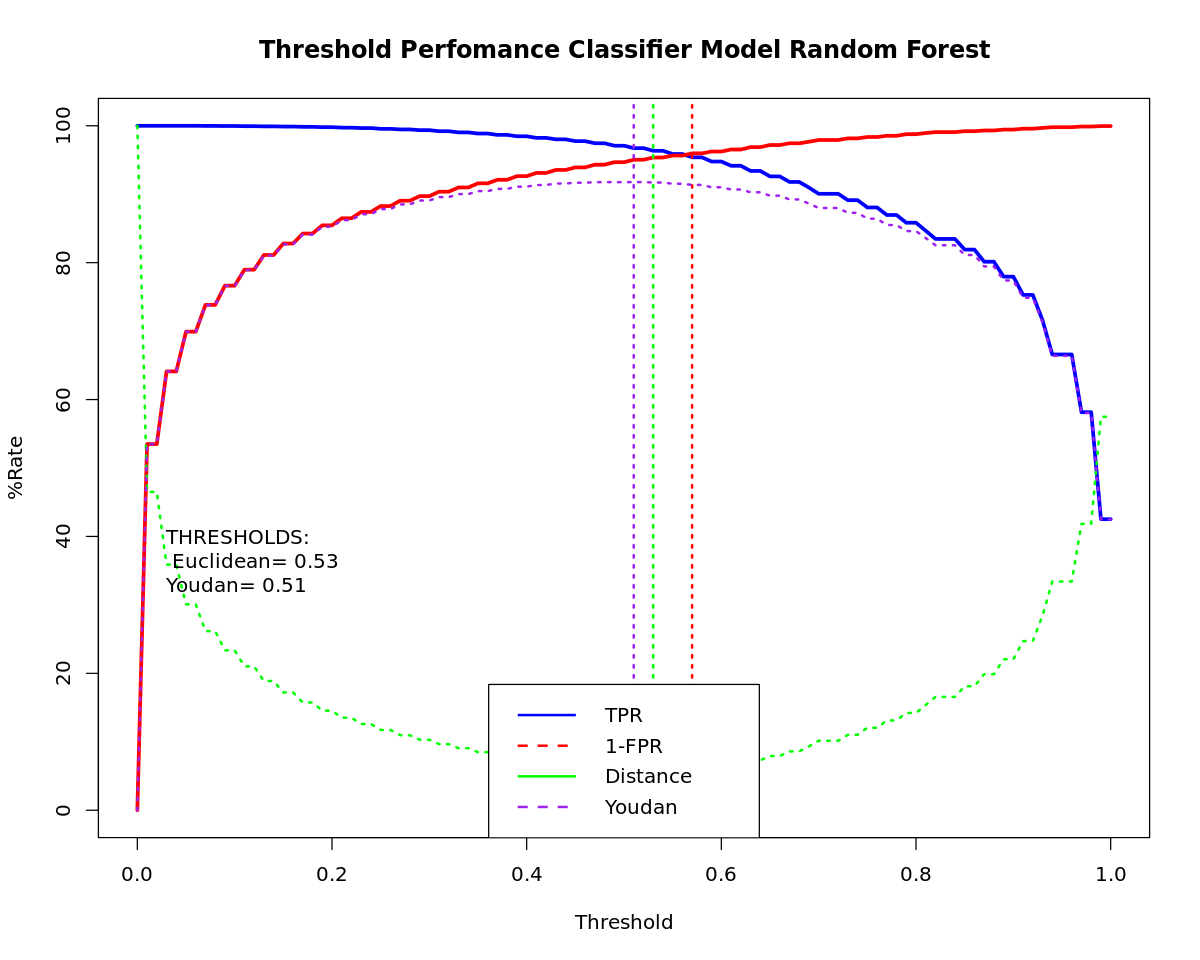

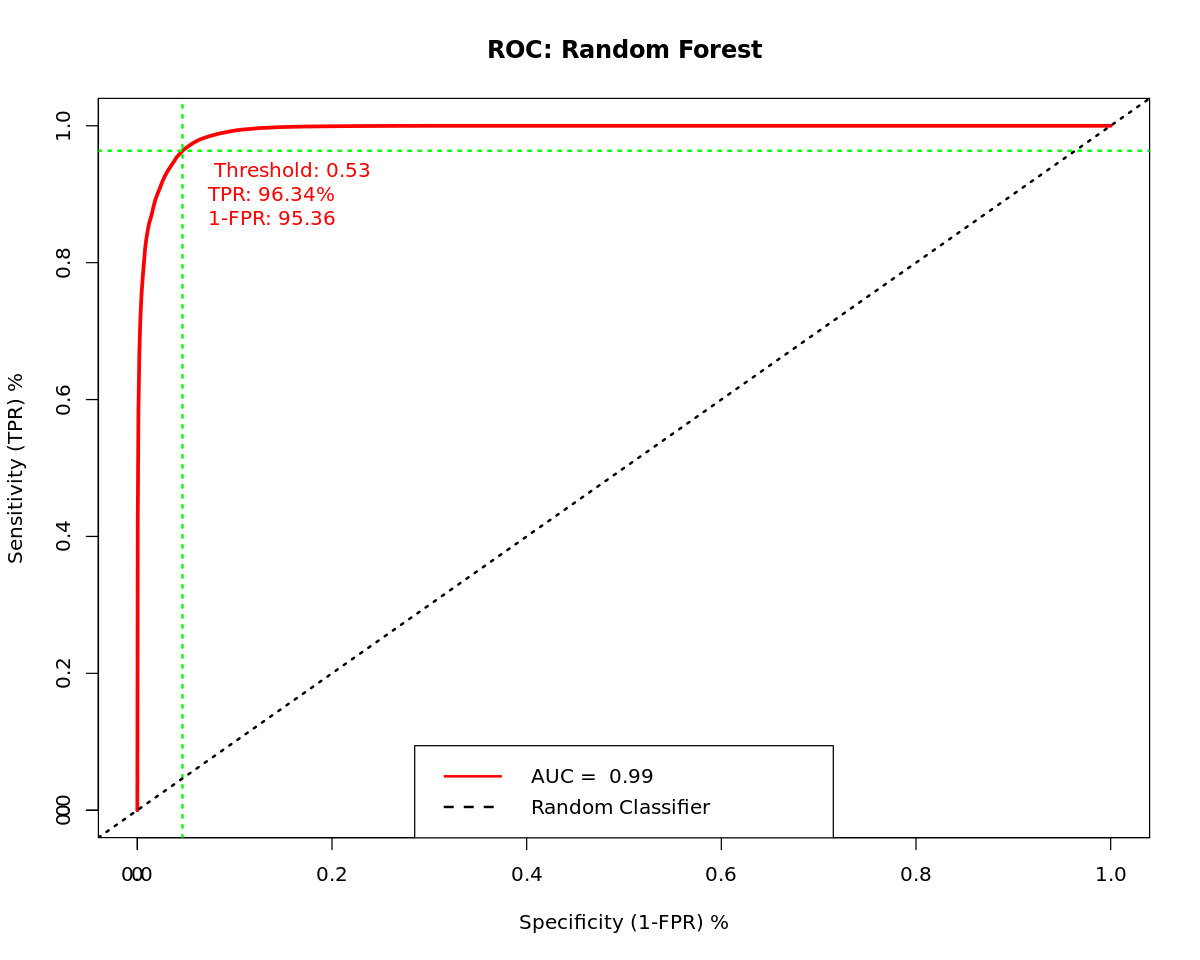

In [92]:
RFmodel_unclean<-RandomForestClassifier(training_data,testing_data,plot=TRUE,OUTPUT_FIELD)
result<-RFmodel_unclean$result

[1] "ACCURACY :  95.860281285289 , PRECISION:  95.5318615153036 , RECALL:  96.3439935229228 , AUC :  0.993014446383371 F1 score: 95.9362088078202 Loss : 0.53 Threshold : 0.53"


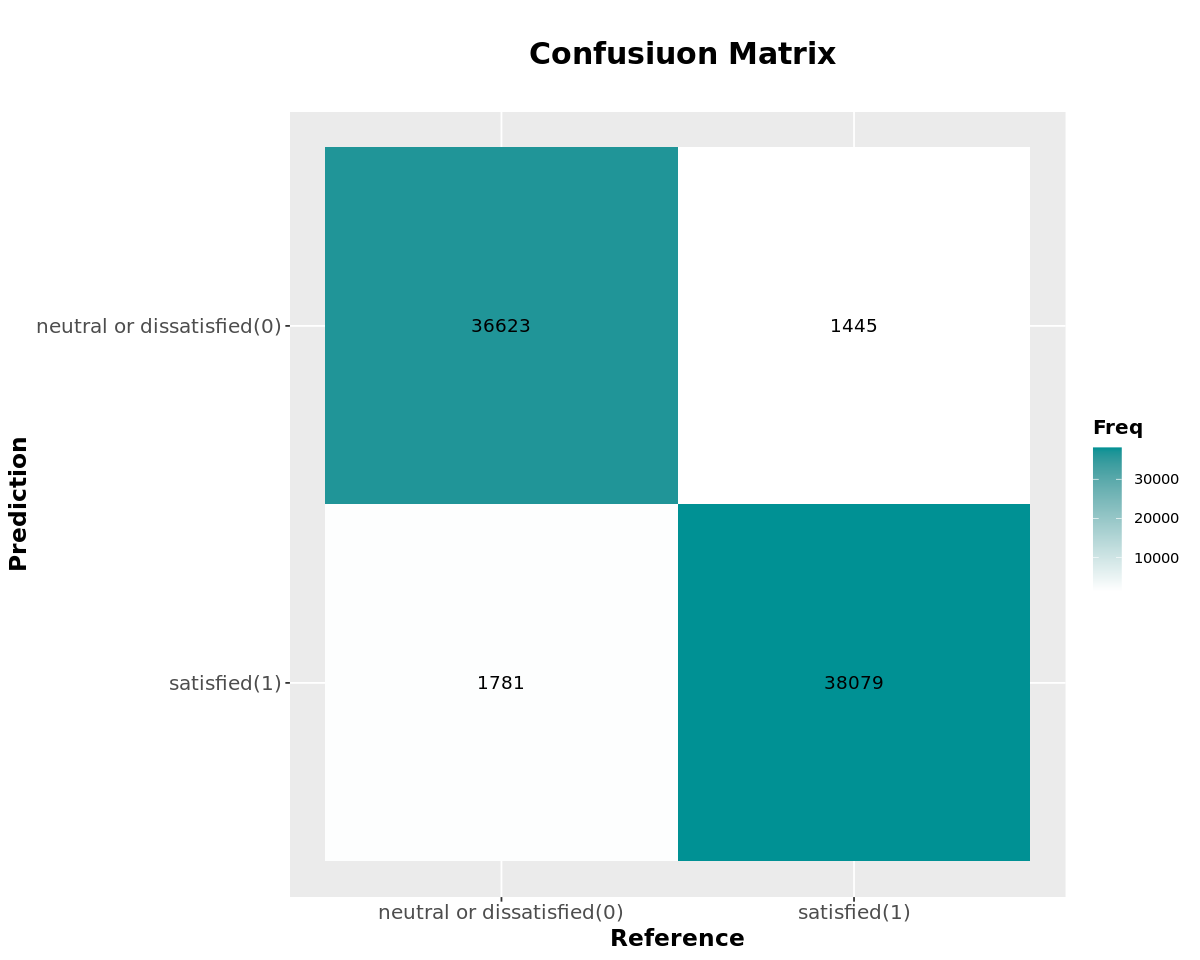

In [93]:
options(repr.plot.width = 10, repr.plot.height =8)
ConfusionMatrix_plot(result$gt,result$pred_labels)
accuracy<-result$acc
precision<-result$pgood
recall<-result$TPR
auc <- result$AUC
f1_score <- F1_score(precision,recall)
loss <- #BCE_loss(result$gt,result$proba)
threshold<- result$threshold
print(paste("ACCURACY : ", accuracy,
            ", PRECISION: ", precision,
            ", RECALL: ", recall, 
            ", AUC : ",auc,
            "F1 score:", f1_score,
            "Loss :", loss,
            "Threshold :", threshold))

In [94]:
df <-unlist(result[-which(names(result) %in%c("pred_labels","gt","proba"))])
#allResults<-
allResults<-cbind(allResults,data.frame(RandomForest_unclean=unlist(df)))
allResults

LogisticRegression Logistic_with_Kfold DecisionTree
TP        3.110200e+04       10330.00            3.552900e+04
FN        7.040000e+03        2421.00            2.501000e+03
FP        6.006000e+03        1910.00            1.916000e+03
TN        3.378000e+04       11313.00            3.798200e+04
F1        8.266312e+01          82.67            9.414773e+01
acc       8.325891e+01          83.32            9.433195e+01
pgood     8.381481e+01          84.40            9.488316e+01
pbad      8.275355e+01          82.38            9.382210e+01
FPR       1.509576e+01          14.45            4.802246e+00
TPR       8.154266e+01          81.01            9.342361e+01
TNR       8.490424e+01          85.55            9.519775e+01
MCC       6.650760e-01           0.67            8.866330e-01
threshold 5.000000e-01           0.51            3.700000e-01
AUC       9.039995e-01           0.90            9.842372e-01
          DecisionTree_with_Kfold DecisionTree_unclean
TP        11926.00                3.775300e+04        
FN          824.00                1.860000e+03        
FP          614.00                2.367000e+03        
TN        12610.00                3.594800e+04        
F1           94.31                9.469856e+01        
acc          94.46                9.457576e+01        
pgood        95.10                9.410020e+01        
pbad         93.86                9.508041e+01        
FPR           4.65                6.177737e+00        
TPR          93.53                9.530457e+01        
TNR          95.35                9.382226e+01        
MCC           0.89                8.915372e-01        
threshold     0.39                6.400000e-01        
AUC           0.98                9.864455e-01        
          DecisionTree_Kfold_Unclean RandomForest RandomForestKfold
TP        12685.00                   3.605100e+04 20098.00         
FN          539.00                   2.163000e+03  1153.00         
FP          788.00                   1.807000e+03   921.00         
TN        11962.00                   3.790700e+04 21119.00         
F1           95.03                   9.478126e+01    95.09         
acc          94.89                   9.490555e+01    95.21         
pgood        94.15                   9.522690e+01    95.62         
pbad         95.69                   9.460195e+01    94.82         
FPR           6.19                   4.550033e+00     4.18         
TPR          95.92                   9.433977e+01    94.57         
TNR          93.81                   9.544997e+01    95.82         
MCC           0.90                   8.980929e-01     0.90         
threshold     0.62                   4.500000e-01     0.45         
AUC           0.99                   9.888962e-01     0.99         
          RandomForest_unclean
TP        3.807900e+04        
FN        1.445000e+03        
FP        1.781000e+03        
TN        3.662300e+04        
F1        9.593621e+01        
acc       9.586028e+01        
pgood     9.553186e+01        
pbad      9.620416e+01        
FPR       4.637538e+00        
TPR       9.634399e+01        
TNR       9.536246e+01        
MCC       9.172124e-01        
threshold 5.300000e-01        
AUC       9.930144e-01

### K-FOLD Cross validation with unclen dataset on Randomforest

In [95]:
KFOLDS          <- 6                 # Number of folded experiments
dataset<-stratifiedDataset(processed_data)
measures<-runExperiment(dataset = dataset,FUN = RandomForestClassifier)

[1] "FOLD : , 1"
[1] "FOLD : , 2"
[1] "FOLD : , 3"
[1] "FOLD : , 4"
[1] "FOLD : , 5"
[1] "FOLD : , 6"


In [123]:

data.frame(measures$allresults)

data.frame(measures$means)




TP    FN   FP   TN    F1       acc      pgood    pbad     FPR      TPR     
1 20074 1179  941 21100 94.98439 95.10325 95.52225 94.70802 4.269316 94.45255
2 20137 1116 1018 21023 94.96793 95.07091 95.18790 94.95912 4.618665 94.74898
3 20146 1107 1030 21011 94.96335 95.06398 95.13600 94.99503 4.673109 94.79132
4 20074 1178  900 21141 95.07886 95.20015 95.70897 94.72199 4.083299 94.45699
5 20047 1205  865 21176 95.09060 95.21863 95.86362 94.61597 3.924504 94.32995
6 20100 1152  869 21171 95.21328 95.33170 95.85579 94.83940 3.942831 94.57933
  TNR      MCC       threshold AUC      
1 95.73068 0.9020675 0.45      0.9897288
2 95.38133 0.9013867 0.43      0.9903678
3 95.32689 0.9012462 0.43      0.9903958
4 95.91670 0.9040232 0.45      0.9895230
5 96.07550 0.9044251 0.47      0.9901767
6 96.05717 0.9066584 0.45      0.9900949

TP    FN   FP  TN    F1    acc   pgood pbad  FPR  TPR   TNR   MCC threshold
1 20096 1156 937 21103 95.05 95.16 95.55 94.81 4.25 94.56 95.75 0.9 0.45     
  AUC 
1 0.99

In [127]:

allResults<-cbind(allResults,data.frame(RandomForest_Kfold_unclean=unlist(measures$means)))
allResults

LogisticRegression Logistic_with_Kfold DecisionTree
TP        3.110200e+04       10330.00            3.552900e+04
FN        7.040000e+03        2421.00            2.501000e+03
FP        6.006000e+03        1910.00            1.916000e+03
TN        3.378000e+04       11313.00            3.798200e+04
F1        8.266312e+01          82.67            9.414773e+01
acc       8.325891e+01          83.32            9.433195e+01
pgood     8.381481e+01          84.40            9.488316e+01
pbad      8.275355e+01          82.38            9.382210e+01
FPR       1.509576e+01          14.45            4.802246e+00
TPR       8.154266e+01          81.01            9.342361e+01
TNR       8.490424e+01          85.55            9.519775e+01
MCC       6.650760e-01           0.67            8.866330e-01
threshold 5.000000e-01           0.51            3.700000e-01
AUC       9.039995e-01           0.90            9.842372e-01
          DecisionTree_with_Kfold DecisionTree_unclean
TP        11926.00                3.775300e+04        
FN          824.00                1.860000e+03        
FP          614.00                2.367000e+03        
TN        12610.00                3.594800e+04        
F1           94.31                9.469856e+01        
acc          94.46                9.457576e+01        
pgood        95.10                9.410020e+01        
pbad         93.86                9.508041e+01        
FPR           4.65                6.177737e+00        
TPR          93.53                9.530457e+01        
TNR          95.35                9.382226e+01        
MCC           0.89                8.915372e-01        
threshold     0.39                6.400000e-01        
AUC           0.98                9.864455e-01        
          DecisionTree_Kfold_Unclean RandomForest RandomForestKfold
TP        12685.00                   3.605100e+04 20098.00         
FN          539.00                   2.163000e+03  1153.00         
FP          788.00                   1.807000e+03   921.00         
TN        11962.00                   3.790700e+04 21119.00         
F1           95.03                   9.478126e+01    95.09         
acc          94.89                   9.490555e+01    95.21         
pgood        94.15                   9.522690e+01    95.62         
pbad         95.69                   9.460195e+01    94.82         
FPR           6.19                   4.550033e+00     4.18         
TPR          95.92                   9.433977e+01    94.57         
TNR          93.81                   9.544997e+01    95.82         
MCC           0.90                   8.980929e-01     0.90         
threshold     0.62                   4.500000e-01     0.45         
AUC           0.99                   9.888962e-01     0.99         
          RandomForest_unclean RandomForest_Kfold_unclean
TP        3.807900e+04         20096.00                  
FN        1.445000e+03          1156.00                  
FP        1.781000e+03           937.00                  
TN        3.662300e+04         21103.00                  
F1        9.593621e+01            95.05                  
acc       9.586028e+01            95.16                  
pgood     9.553186e+01            95.55                  
pbad      9.620416e+01            94.81                  
FPR       4.637538e+00             4.25                  
TPR       9.634399e+01            94.56                  
TNR       9.536246e+01            95.75                  
MCC       9.172124e-01             0.90                  
threshold 5.300000e-01             0.45                  
AUC       9.930144e-01             0.99

In [128]:

t(allResults)

TP    FN   FP   TN    F1       acc      pgood   
LogisticRegression         31102 7040 6006 33780 82.66312 83.25891 83.81481
Logistic_with_Kfold        10330 2421 1910 11313 82.67000 83.32000 84.40000
DecisionTree               35529 2501 1916 37982 94.14773 94.33195 94.88316
DecisionTree_with_Kfold    11926  824  614 12610 94.31000 94.46000 95.10000
DecisionTree_unclean       37753 1860 2367 35948 94.69856 94.57576 94.10020
DecisionTree_Kfold_Unclean 12685  539  788 11962 95.03000 94.89000 94.15000
RandomForest               36051 2163 1807 37907 94.78126 94.90555 95.22690
RandomForestKfold          20098 1153  921 21119 95.09000 95.21000 95.62000
RandomForest_unclean       38079 1445 1781 36623 95.93621 95.86028 95.53186
RandomForest_Kfold_unclean 20096 1156  937 21103 95.05000 95.16000 95.55000
                           pbad     FPR       TPR      TNR      MCC      
LogisticRegression         82.75355 15.095762 81.54266 84.90424 0.6650760
Logistic_with_Kfold        82.38000 14.450000 81.01000 85.55000 0.6700000
DecisionTree               93.82210  4.802246 93.42361 95.19775 0.8866330
DecisionTree_with_Kfold    93.86000  4.650000 93.53000 95.35000 0.8900000
DecisionTree_unclean       95.08041  6.177737 95.30457 93.82226 0.8915372
DecisionTree_Kfold_Unclean 95.69000  6.190000 95.92000 93.81000 0.9000000
RandomForest               94.60195  4.550033 94.33977 95.44997 0.8980929
RandomForestKfold          94.82000  4.180000 94.57000 95.82000 0.9000000
RandomForest_unclean       96.20416  4.637538 96.34399 95.36246 0.9172124
RandomForest_Kfold_unclean 94.81000  4.250000 94.56000 95.75000 0.9000000
                           threshold AUC      
LogisticRegression         0.50      0.9039995
Logistic_with_Kfold        0.51      0.9000000
DecisionTree               0.37      0.9842372
DecisionTree_with_Kfold    0.39      0.9800000
DecisionTree_unclean       0.64      0.9864455
DecisionTree_Kfold_Unclean 0.62      0.9900000
RandomForest               0.45      0.9888962
RandomForestKfold          0.45      0.9900000
RandomForest_unclean       0.53      0.9930144
RandomForest_Kfold_unclean 0.45      0.9900000

### K-nearest Neighbour

In [135]:
# Select field for Decsion Tree
OUTPUT_FIELD = "satisfactionv2"

select_field<-c('satisfactionv2',
               'Gender',
                'CustomerType',
                'TypeofTravel',
                'ClassBusiness',
                'ClassEco',
                'ClassEco.Plus',
#                 'DepartureDelayinMinutes0',
#                 'DepartureDelayinMinutes1',
#                 'DepartureDelayinMinutes2',
#                 'DepartureDelayinMinutes3',
#                 'ArrivalDelayinMinutes0',
#                 'ArrivalDelayinMinutes1',
#                 'ArrivalDelayinMinutes2',
#                 'ArrivalDelayinMinutes3',
                'Age',
                'Seatcomfort',
                'DepartureArrivaltimeconvenient',
                'Foodanddrink',
                'Gatelocation',
                'Inflightwifiservice',
                'Inflightentertainment',
               'EaseofOnlinebooking',
                 'Onboardservice',
                 'Legroomservice',
                 'Baggagehandling',
                 'Checkinservice',
                 'Cleanliness',
               'Onlineboarding'
               )

print("Select Fields")
print((select_field))


selected_data<-processed_data[,select_field]

selected_data<-selected_data[sample(nrow(selected_data)),]
training_records<-round(nrow(selected_data)*(70/100))
training_data <- selected_data[1:training_records,]
testing_data <- selected_data[-(1:training_records),]

print(paste("Number of Training",nrow(training_data)))
print(paste("Number of Testing",nrow(testing_data)))
head(training_data)

[1] "Select Fields"
 [1] "satisfactionv2"                 "Gender"                        
 [3] "CustomerType"                   "TypeofTravel"                  
 [5] "ClassBusiness"                  "ClassEco"                      
 [7] "ClassEco.Plus"                  "Age"                           
 [9] "Seatcomfort"                    "DepartureArrivaltimeconvenient"
[11] "Foodanddrink"                   "Gatelocation"                  
[13] "Inflightwifiservice"            "Inflightentertainment"         
[15] "EaseofOnlinebooking"            "Onboardservice"                
[17] "Legroomservice"                 "Baggagehandling"               
[19] "Checkinservice"                 "Cleanliness"                   
[21] "Onlineboarding"                
[1] "Number of Training 181832"
[1] "Number of Testing 77928"


satisfactionv2 Gender CustomerType TypeofTravel ClassBusiness ClassEco
188310 0              1      1            1            0             1       
22579  1              1      0            0            0             1       
90848  1              1      0            1            1             0       
132992 0              1      0            0            0             1       
106912 1              0      0            1            1             0       
207587 1              0      0            1            1             0       
       ClassEco.Plus Age        Seatcomfort DepartureArrivaltimeconvenient ⋯
188310 0             0.17808219 0.6         0.6                            ⋯
22579  0             0.27397260 0.4         0.4                            ⋯
90848  0             0.36986301 0.2         0.2                            ⋯
132992 0             0.06849315 0.4         0.6                            ⋯
106912 0             0.47945205 0.2         0.2                            ⋯
207587 0             0.71232877 1.0         0.8                            ⋯
       Gatelocation Inflightwifiservice Inflightentertainment
188310 0.6          0.8                 0.6                  
22579  0.4          0.8                 0.8                  
90848  0.2          0.2                 0.2                  
132992 0.8          0.2                 0.4                  
106912 0.2          0.4                 0.2                  
207587 0.8          0.8                 0.4                  
       EaseofOnlinebooking Onboardservice Legroomservice Baggagehandling
188310 0.8                 0.6            0.2            0.8            
22579  1.0                 1.0            1.0            1.0            
90848  0.8                 0.8            0.8            0.8            
132992 0.2                 0.4            1.0            0.6            
106912 0.8                 0.8            0.8            0.8            
207587 0.8                 0.4            0.4            0.4            
       Checkinservice Cleanliness Onlineboarding
188310 0.4            0.6         0.8           
22579  0.6            1.0         1.0           
90848  0.4            0.8         0.2           
132992 0.6            0.4         0.2           
106912 0.6            0.8         0.2           
207587 1.0            0.6         1.0

In [ ]:

KNN_model<-function(training_data,testing_data,plot=TRUE, output_field="satisfactionv2"){
    
    
    x_train <- subset(training_data, select= output_field)
    y_train <- training_data[,output_field]
    
    x_test <- subset(testing_dat, select= output_field)
    y_train <- testing_data[,output_field]
    
    Knn_model<- knn.kodama(x_train, y_train, x_test, k=3)
    
    ConfusionMatrix_plot(y_train,Knn_model$Ypred[,1])
    
    
    
    
    return()
}




## Visualize a performance of each model

The performance metrics use in evaluating between multiple model are

- Accuracy
- Area Under the Curve 
- F1 Score

In [102]:
# select only the required metrics
rplot<-allResults[c("acc","F1","AUC"),]
# normalize accuracy and f1 by 100 (so that they is in same scale as AUC for easier visualization)
rplot[c("acc","F1"),]<-rplot[c("acc","F1"),]/100
rplot

LogisticRegression Logistic_with_Kfold DecisionTree DecisionTree_with_Kfold
acc 0.8325891          0.8332              0.9433195    0.9446                 
F1  0.8266312          0.8267              0.9414773    0.9431                 
AUC 0.9039995          0.9000              0.9842372    0.9800                 
    DecisionTree_unclean DecisionTree_Kfold_Unclean RandomForest
acc 0.9457576            0.9489                     0.9490555   
F1  0.9469856            0.9503                     0.9478126   
AUC 0.9864455            0.9900                     0.9888962   
    RandomForestKfold RandomForest_unclean RandomForest_Kfold_unclean
acc 0.9521            0.9586028            0.9586028                 
F1  0.9509            0.9593621            0.9593621                 
AUC 0.9900            0.9930144            0.9930144

In [103]:
# stack a dataframe and combine with the fields of metrics name for each rows
rplot<-cbind(stack(rplot),data.frame(metrics=row.names(rplot)))
head(rplot)

values    ind                 metrics
1 0.8325891 LogisticRegression  acc    
2 0.8266312 LogisticRegression  F1     
3 0.9039995 LogisticRegression  AUC    
4 0.8332000 Logistic_with_Kfold acc    
5 0.8267000 Logistic_with_Kfold F1     
6 0.9000000 Logistic_with_Kfold AUC

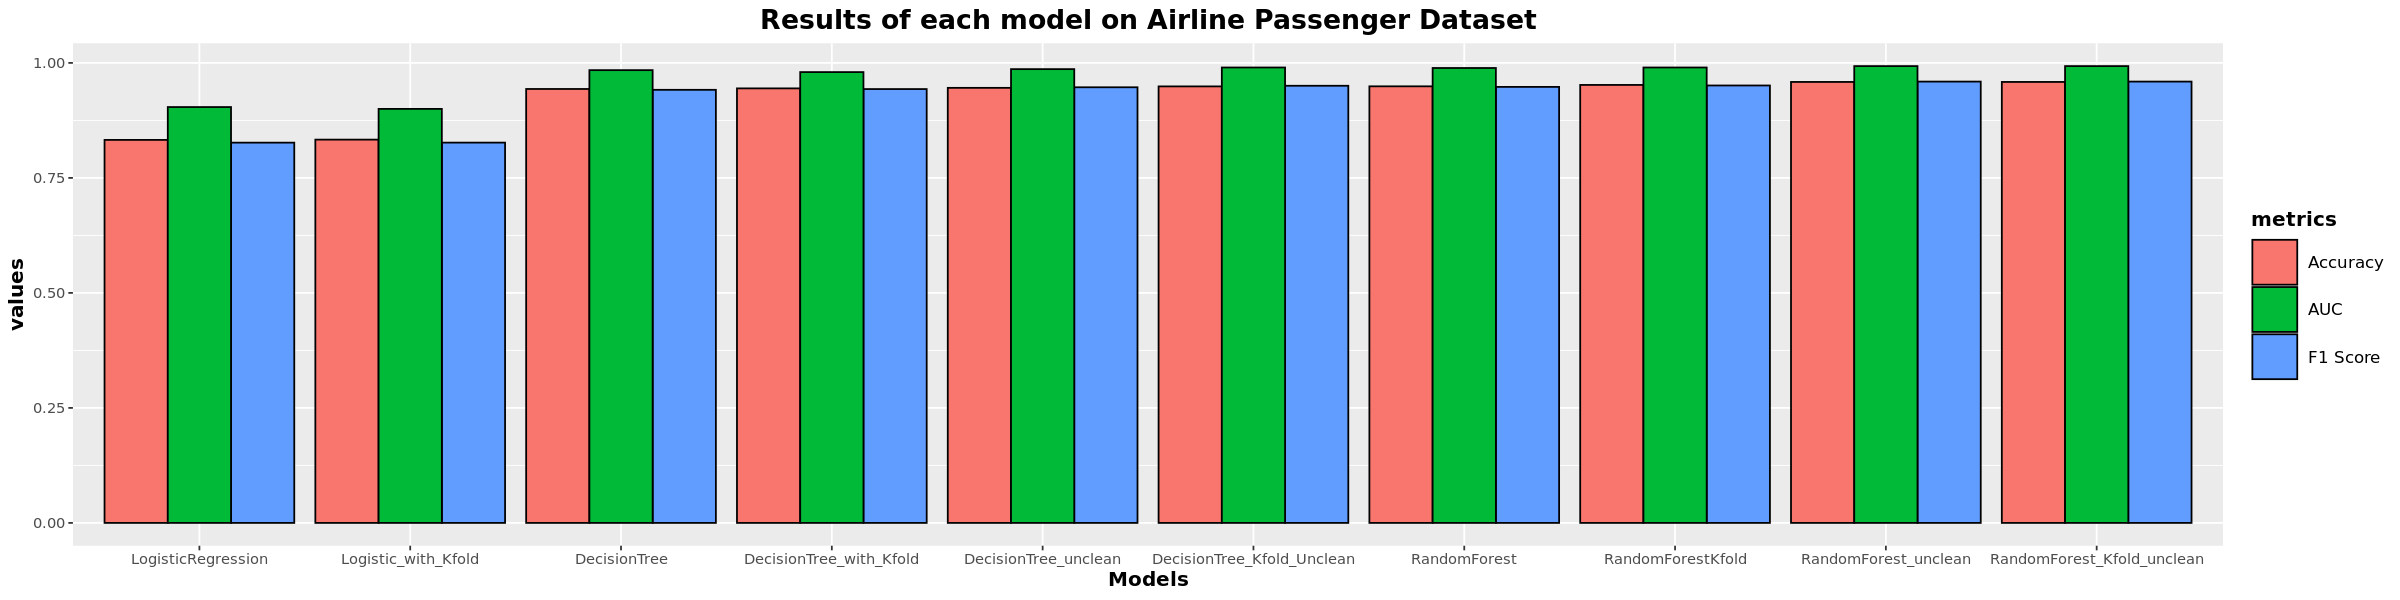

In [134]:
options(repr.plot.width = 20, repr.plot.height =5)
# Grouped
ggplot(rplot, aes(fill=metrics, y=values, x=ind)) + 
geom_bar(position="dodge", stat="identity",colour="black")+
scale_fill_discrete(labels=c("Accuracy","AUC","F1 Score"))+
labs(x= "Models", title="Results of each model on Airline Passenger Dataset")  +
theme(plot.title = element_text(face="bold",hjust=0.5, size =16),
      axis.title.x = element_text(face="bold", color="black", size=12),
      axis.title.y = element_text(face="bold", color="black", size=12),
      legend.title = element_text(face="bold", color="black", size=12),
      legend.text = element_text(size = 10),
      legend.key.size= unit(1.0,"cm"),
      legend.key.width = unit(1,"cm"),
      legend.box.spacing = unit(0.4,"cm")
      )

### Support Vector Machine

In [100]:
# library(e1071)


# SVM_model<-function(training_data,testing_data){
   
#     svm_training = training_data
#     y_svm_test = testing_data[,1]
#     x_svm_test = testing_data[,-1]



 
#     svm_classifier = svm(formula = satisfactionv2 ~ .,
#                      data = svm_training,
#                      type = 'C-classification',
#                      kernel = 'radial')
#     y_pred <- predict(svm_classifier, newdata= x_svm_test, type='response')

# print(table(y_svm_test,y_pred))

    
#  return(list("model"=svm_classifier)) 
# }


# a<-SVM_model(training_data,testing_data)

In [101]:
for(i in names(svm_training[-1])){
    for(j in names(svm_training[-1])){
        if(i==j){
            
        }else{
        print(as.formula(paste(paste(j,'~'),i)))
        plot(classifier,svm_training,as.formula(paste(paste(j,'~'),i)))
        }
    }
    
}
# plot(classifier, dummy, Gender~Age) #Ok
# plot(classifier, dummy, CustomerType~DepartureArrivaltimeconvenient) #Ok

ERROR: Error in eval(expr, envir, enclos): object 'svm_training' not found


### Kmeans Clustering

### Naive Bayes Classifier

In [ ]:
#

In [ ]:
library(naivebayes)
NaiveBayes_Classifier<-function(training_data,testing_data,output_field="satisfactionv2",plot=TRUE){
    formular<-myModelFormula(training_data,output_field)
    print(formular)

    nb_cl<- naive_bayes(formular, data = ,usekernel = T)
    y_proba <- predict(nb_cl, newdata = testing_data, type="response")
    print(y_proba)
    
       

#     title<-'Naive Bayes Classifier'
#     results<-NdetermineThreshold(test_expected=y_test,
#                                     test_predicted=y_proba,
#                                     plot=plot,
#                                     title=title)

#     reuturn(list("model"= nb_cl,
#                  "result"=results))
}



In [ ]:
# NaiveBayes_Classifier(training_data,testing_data)


In [ ]:
# Confusion Matrix
cm <- table(y_test, y_pred)
cm
 
# Model Evaluation
confusionMatrix(cm)

In [ ]:
length(y_pred)

In [ ]:
length(y_test)

In [ ]:
model